In [20]:
import sys
sys.path.append('C:\\Users\\jfarr\\Desktop\\DL Project\\Keras-GAN\\cgan')

In [21]:
%reload_ext autoreload
%autoreload 2
import cgan

In [22]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import basename, isfile, join

In [23]:
metadata = pd.read_csv(join('data', 'metadata.csv'))

In [24]:
from DataGenerator import DataGenerator
datagen = DataGenerator(metadata, 16000)   # locally defined Datagen class specific to Google's QuickDraw

In [25]:
categories = metadata['Class Name']
np.unique(categories)

array(['aircraft carrier', 'alarm clock', 'ambulance', 'animal migration',
       'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack',
       'banana', 'baseball', 'baseball bat', 'basket', 'bat'],
      dtype=object)

In [26]:
new_gan = cgan.CGAN(categories)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)              

In [27]:
X,y = datagen.__getitem__(0)
X = np.squeeze(X)

In [28]:
print(X.shape)
print(y.shape)
print(np.max(X))
print(y.dtype)
print(X.dtype)

(16000, 28, 28)
(16000,)
255.0
int64
float64


In [29]:
uintX = X.astype('uint8')
uinty = y.astype('uint8')

In [30]:
from keras.datasets import mnist
(X_train, y_train), (_, _) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(np.max(X_train))
print(X_train.dtype, y_train.dtype)

(60000, 28, 28)
(60000,)
255
uint8 uint8


In [37]:
# def train(self, epochs, batch_size=128, sample_interval=50, X_train=None, y_train=None):
new_gan.train(20000, 128, 500, X_train=uintX, y_train=uinty)

0 [D loss: 0.383915, acc.: 74.61%] [G loss: 0.779453]
1 [D loss: 0.416192, acc.: 75.00%] [G loss: 0.830957]
2 [D loss: 0.443887, acc.: 70.31%] [G loss: 0.851403]
3 [D loss: 0.413936, acc.: 73.44%] [G loss: 0.819994]
4 [D loss: 0.456945, acc.: 70.70%] [G loss: 0.859987]
5 [D loss: 0.374953, acc.: 76.56%] [G loss: 0.859001]
6 [D loss: 0.403542, acc.: 79.30%] [G loss: 0.834366]
7 [D loss: 0.464282, acc.: 68.75%] [G loss: 0.840561]
8 [D loss: 0.458887, acc.: 69.14%] [G loss: 0.879238]
9 [D loss: 0.415167, acc.: 73.83%] [G loss: 0.868658]
10 [D loss: 0.416875, acc.: 75.00%] [G loss: 0.873021]
11 [D loss: 0.406676, acc.: 75.78%] [G loss: 0.877701]
12 [D loss: 0.402736, acc.: 78.52%] [G loss: 0.901260]
13 [D loss: 0.414532, acc.: 74.61%] [G loss: 0.882952]
14 [D loss: 0.442428, acc.: 71.88%] [G loss: 0.843166]
15 [D loss: 0.398654, acc.: 73.05%] [G loss: 0.811806]
16 [D loss: 0.418420, acc.: 76.17%] [G loss: 0.896241]
17 [D loss: 0.337120, acc.: 81.25%] [G loss: 0.882296]
18 [D loss: 0.411234

150 [D loss: 0.417473, acc.: 69.53%] [G loss: 0.804030]
151 [D loss: 0.431768, acc.: 73.05%] [G loss: 0.825995]
152 [D loss: 0.445042, acc.: 69.92%] [G loss: 0.834123]
153 [D loss: 0.449961, acc.: 69.92%] [G loss: 0.841413]
154 [D loss: 0.359866, acc.: 77.34%] [G loss: 0.877403]
155 [D loss: 0.409292, acc.: 75.78%] [G loss: 0.813882]
156 [D loss: 0.423551, acc.: 73.05%] [G loss: 0.848405]
157 [D loss: 0.442924, acc.: 66.41%] [G loss: 0.801350]
158 [D loss: 0.410781, acc.: 75.78%] [G loss: 0.822956]
159 [D loss: 0.421371, acc.: 73.44%] [G loss: 0.813222]
160 [D loss: 0.362724, acc.: 75.39%] [G loss: 0.825385]
161 [D loss: 0.422519, acc.: 69.14%] [G loss: 0.843934]
162 [D loss: 0.430363, acc.: 71.88%] [G loss: 0.807423]
163 [D loss: 0.455702, acc.: 72.27%] [G loss: 0.863100]
164 [D loss: 0.437255, acc.: 68.75%] [G loss: 0.832612]
165 [D loss: 0.435034, acc.: 71.88%] [G loss: 0.830823]
166 [D loss: 0.400365, acc.: 76.17%] [G loss: 0.808057]
167 [D loss: 0.409295, acc.: 74.22%] [G loss: 0.

297 [D loss: 0.414736, acc.: 75.39%] [G loss: 0.828033]
298 [D loss: 0.423594, acc.: 76.56%] [G loss: 0.854881]
299 [D loss: 0.418786, acc.: 72.66%] [G loss: 0.827852]
300 [D loss: 0.376974, acc.: 76.17%] [G loss: 0.817825]
301 [D loss: 0.436930, acc.: 70.31%] [G loss: 0.829450]
302 [D loss: 0.361057, acc.: 75.78%] [G loss: 0.816246]
303 [D loss: 0.377902, acc.: 76.17%] [G loss: 0.853233]
304 [D loss: 0.414862, acc.: 73.05%] [G loss: 0.854759]
305 [D loss: 0.409802, acc.: 74.22%] [G loss: 0.877212]
306 [D loss: 0.433149, acc.: 71.88%] [G loss: 0.853060]
307 [D loss: 0.435235, acc.: 72.66%] [G loss: 0.879246]
308 [D loss: 0.408063, acc.: 73.83%] [G loss: 0.845779]
309 [D loss: 0.437894, acc.: 72.66%] [G loss: 0.906867]
310 [D loss: 0.439634, acc.: 70.31%] [G loss: 0.895883]
311 [D loss: 0.403976, acc.: 75.78%] [G loss: 0.868159]
312 [D loss: 0.377745, acc.: 77.34%] [G loss: 0.867644]
313 [D loss: 0.373309, acc.: 77.73%] [G loss: 0.801956]
314 [D loss: 0.398489, acc.: 72.66%] [G loss: 0.

446 [D loss: 0.414736, acc.: 75.78%] [G loss: 0.852759]
447 [D loss: 0.407766, acc.: 75.00%] [G loss: 0.853504]
448 [D loss: 0.350693, acc.: 78.12%] [G loss: 0.849198]
449 [D loss: 0.415295, acc.: 77.34%] [G loss: 0.876829]
450 [D loss: 0.382083, acc.: 73.83%] [G loss: 0.913774]
451 [D loss: 0.451844, acc.: 70.31%] [G loss: 0.885213]
452 [D loss: 0.370655, acc.: 77.34%] [G loss: 0.899685]
453 [D loss: 0.405285, acc.: 73.83%] [G loss: 0.871522]
454 [D loss: 0.366642, acc.: 77.73%] [G loss: 0.808333]
455 [D loss: 0.421563, acc.: 72.66%] [G loss: 0.829833]
456 [D loss: 0.462382, acc.: 71.09%] [G loss: 0.822623]
457 [D loss: 0.438639, acc.: 72.66%] [G loss: 0.813969]
458 [D loss: 0.444332, acc.: 69.14%] [G loss: 0.877894]
459 [D loss: 0.403726, acc.: 76.95%] [G loss: 0.843827]
460 [D loss: 0.396846, acc.: 75.78%] [G loss: 0.852959]
461 [D loss: 0.440775, acc.: 71.48%] [G loss: 0.811420]
462 [D loss: 0.379627, acc.: 76.56%] [G loss: 0.826353]
463 [D loss: 0.428303, acc.: 72.66%] [G loss: 0.

595 [D loss: 0.422464, acc.: 71.88%] [G loss: 0.887914]
596 [D loss: 0.373781, acc.: 80.08%] [G loss: 0.879967]
597 [D loss: 0.401203, acc.: 75.39%] [G loss: 0.911850]
598 [D loss: 0.397268, acc.: 74.22%] [G loss: 0.912034]
599 [D loss: 0.431917, acc.: 73.44%] [G loss: 0.861687]
600 [D loss: 0.399223, acc.: 78.52%] [G loss: 0.891211]
601 [D loss: 0.449467, acc.: 73.05%] [G loss: 0.882063]
602 [D loss: 0.387637, acc.: 76.17%] [G loss: 0.915921]
603 [D loss: 0.424337, acc.: 72.66%] [G loss: 0.889619]
604 [D loss: 0.412352, acc.: 77.34%] [G loss: 0.889119]
605 [D loss: 0.395865, acc.: 75.00%] [G loss: 0.891222]
606 [D loss: 0.383673, acc.: 77.34%] [G loss: 0.896826]
607 [D loss: 0.407964, acc.: 78.52%] [G loss: 0.900381]
608 [D loss: 0.412746, acc.: 72.27%] [G loss: 0.872124]
609 [D loss: 0.398730, acc.: 77.73%] [G loss: 0.911785]
610 [D loss: 0.350692, acc.: 78.52%] [G loss: 0.941015]
611 [D loss: 0.436858, acc.: 71.09%] [G loss: 0.913268]
612 [D loss: 0.454952, acc.: 73.44%] [G loss: 0.

742 [D loss: 0.380309, acc.: 75.39%] [G loss: 0.859966]
743 [D loss: 0.437759, acc.: 72.66%] [G loss: 0.882975]
744 [D loss: 0.411759, acc.: 73.44%] [G loss: 0.862286]
745 [D loss: 0.425022, acc.: 71.88%] [G loss: 0.848943]
746 [D loss: 0.380095, acc.: 75.39%] [G loss: 0.848857]
747 [D loss: 0.421440, acc.: 72.66%] [G loss: 0.822625]
748 [D loss: 0.427261, acc.: 70.31%] [G loss: 0.847930]
749 [D loss: 0.400280, acc.: 74.22%] [G loss: 0.872389]
750 [D loss: 0.376571, acc.: 75.39%] [G loss: 0.903673]
751 [D loss: 0.414838, acc.: 71.88%] [G loss: 0.844650]
752 [D loss: 0.396212, acc.: 73.83%] [G loss: 0.843053]
753 [D loss: 0.435642, acc.: 74.22%] [G loss: 0.898551]
754 [D loss: 0.360644, acc.: 76.17%] [G loss: 0.821857]
755 [D loss: 0.423830, acc.: 71.48%] [G loss: 0.849484]
756 [D loss: 0.413001, acc.: 71.88%] [G loss: 0.867907]
757 [D loss: 0.410056, acc.: 71.88%] [G loss: 0.894723]
758 [D loss: 0.391635, acc.: 75.39%] [G loss: 0.861628]
759 [D loss: 0.397427, acc.: 72.27%] [G loss: 0.

889 [D loss: 0.425411, acc.: 73.44%] [G loss: 0.927715]
890 [D loss: 0.380092, acc.: 75.78%] [G loss: 0.840978]
891 [D loss: 0.423507, acc.: 71.48%] [G loss: 0.854983]
892 [D loss: 0.379677, acc.: 73.44%] [G loss: 0.843783]
893 [D loss: 0.435104, acc.: 72.27%] [G loss: 0.832461]
894 [D loss: 0.355008, acc.: 77.73%] [G loss: 0.819578]
895 [D loss: 0.397005, acc.: 74.22%] [G loss: 0.812967]
896 [D loss: 0.395877, acc.: 75.39%] [G loss: 0.851242]
897 [D loss: 0.382996, acc.: 79.69%] [G loss: 0.873656]
898 [D loss: 0.427565, acc.: 72.27%] [G loss: 0.866093]
899 [D loss: 0.434100, acc.: 71.09%] [G loss: 0.807197]
900 [D loss: 0.390555, acc.: 72.66%] [G loss: 0.812519]
901 [D loss: 0.384239, acc.: 76.17%] [G loss: 0.845350]
902 [D loss: 0.371514, acc.: 78.52%] [G loss: 0.864401]
903 [D loss: 0.356877, acc.: 77.73%] [G loss: 0.858015]
904 [D loss: 0.391818, acc.: 75.00%] [G loss: 0.882674]
905 [D loss: 0.424273, acc.: 75.78%] [G loss: 0.856178]
906 [D loss: 0.350719, acc.: 78.91%] [G loss: 0.

1035 [D loss: 0.421540, acc.: 71.88%] [G loss: 0.910283]
1036 [D loss: 0.406949, acc.: 73.44%] [G loss: 0.818971]
1037 [D loss: 0.314304, acc.: 80.47%] [G loss: 0.881034]
1038 [D loss: 0.369850, acc.: 78.91%] [G loss: 0.860139]
1039 [D loss: 0.403708, acc.: 75.39%] [G loss: 0.878586]
1040 [D loss: 0.397545, acc.: 76.17%] [G loss: 0.818060]
1041 [D loss: 0.414468, acc.: 72.66%] [G loss: 0.856303]
1042 [D loss: 0.406001, acc.: 71.48%] [G loss: 0.819116]
1043 [D loss: 0.418229, acc.: 74.61%] [G loss: 0.849422]
1044 [D loss: 0.304217, acc.: 80.86%] [G loss: 0.913061]
1045 [D loss: 0.387998, acc.: 75.00%] [G loss: 0.936011]
1046 [D loss: 0.374693, acc.: 76.56%] [G loss: 0.849692]
1047 [D loss: 0.369550, acc.: 77.73%] [G loss: 0.887736]
1048 [D loss: 0.434927, acc.: 73.83%] [G loss: 0.843632]
1049 [D loss: 0.402067, acc.: 76.17%] [G loss: 0.862511]
1050 [D loss: 0.413047, acc.: 72.66%] [G loss: 0.916216]
1051 [D loss: 0.461347, acc.: 67.97%] [G loss: 0.849745]
1052 [D loss: 0.414974, acc.: 7

1179 [D loss: 0.405188, acc.: 73.05%] [G loss: 0.844443]
1180 [D loss: 0.415785, acc.: 77.73%] [G loss: 0.838477]
1181 [D loss: 0.409340, acc.: 75.39%] [G loss: 0.839976]
1182 [D loss: 0.415759, acc.: 73.44%] [G loss: 0.885367]
1183 [D loss: 0.371890, acc.: 82.03%] [G loss: 0.865907]
1184 [D loss: 0.406421, acc.: 75.00%] [G loss: 0.903701]
1185 [D loss: 0.401311, acc.: 76.56%] [G loss: 0.863392]
1186 [D loss: 0.424609, acc.: 76.17%] [G loss: 0.883072]
1187 [D loss: 0.392219, acc.: 75.78%] [G loss: 0.854109]
1188 [D loss: 0.423197, acc.: 73.83%] [G loss: 0.901419]
1189 [D loss: 0.394879, acc.: 74.61%] [G loss: 0.895532]
1190 [D loss: 0.412743, acc.: 75.78%] [G loss: 0.907756]
1191 [D loss: 0.372910, acc.: 76.17%] [G loss: 0.944746]
1192 [D loss: 0.408322, acc.: 76.95%] [G loss: 0.928168]
1193 [D loss: 0.331530, acc.: 80.86%] [G loss: 0.876034]
1194 [D loss: 0.366094, acc.: 78.91%] [G loss: 0.896943]
1195 [D loss: 0.474777, acc.: 69.92%] [G loss: 0.933602]
1196 [D loss: 0.382938, acc.: 7

1323 [D loss: 0.418772, acc.: 73.44%] [G loss: 0.899829]
1324 [D loss: 0.523432, acc.: 62.50%] [G loss: 0.872086]
1325 [D loss: 0.372677, acc.: 78.52%] [G loss: 0.931000]
1326 [D loss: 0.394304, acc.: 76.56%] [G loss: 0.880452]
1327 [D loss: 0.430271, acc.: 74.22%] [G loss: 0.889800]
1328 [D loss: 0.349951, acc.: 78.91%] [G loss: 0.856163]
1329 [D loss: 0.415943, acc.: 73.83%] [G loss: 0.878449]
1330 [D loss: 0.409445, acc.: 70.70%] [G loss: 0.859193]
1331 [D loss: 0.419641, acc.: 71.88%] [G loss: 0.876571]
1332 [D loss: 0.394867, acc.: 76.56%] [G loss: 0.866570]
1333 [D loss: 0.398690, acc.: 72.27%] [G loss: 0.854150]
1334 [D loss: 0.379888, acc.: 75.39%] [G loss: 0.867303]
1335 [D loss: 0.397924, acc.: 76.95%] [G loss: 0.846388]
1336 [D loss: 0.400252, acc.: 78.91%] [G loss: 0.890859]
1337 [D loss: 0.452534, acc.: 74.22%] [G loss: 0.858569]
1338 [D loss: 0.395871, acc.: 73.44%] [G loss: 0.877682]
1339 [D loss: 0.407622, acc.: 73.44%] [G loss: 0.910497]
1340 [D loss: 0.343174, acc.: 7

1467 [D loss: 0.392034, acc.: 74.61%] [G loss: 0.911613]
1468 [D loss: 0.398762, acc.: 76.17%] [G loss: 0.850200]
1469 [D loss: 0.363339, acc.: 79.30%] [G loss: 0.845912]
1470 [D loss: 0.394395, acc.: 76.95%] [G loss: 0.942784]
1471 [D loss: 0.424092, acc.: 73.44%] [G loss: 0.869651]
1472 [D loss: 0.438080, acc.: 71.88%] [G loss: 0.868862]
1473 [D loss: 0.379408, acc.: 76.95%] [G loss: 0.881579]
1474 [D loss: 0.387762, acc.: 76.56%] [G loss: 0.909922]
1475 [D loss: 0.367369, acc.: 76.56%] [G loss: 0.854676]
1476 [D loss: 0.447008, acc.: 72.66%] [G loss: 0.858863]
1477 [D loss: 0.401401, acc.: 73.05%] [G loss: 0.897690]
1478 [D loss: 0.502042, acc.: 69.92%] [G loss: 0.894883]
1479 [D loss: 0.394551, acc.: 76.17%] [G loss: 0.845135]
1480 [D loss: 0.466597, acc.: 68.36%] [G loss: 0.886055]
1481 [D loss: 0.420456, acc.: 71.48%] [G loss: 0.910634]
1482 [D loss: 0.422492, acc.: 71.88%] [G loss: 0.928271]
1483 [D loss: 0.395571, acc.: 73.83%] [G loss: 0.921582]
1484 [D loss: 0.387090, acc.: 7

1612 [D loss: 0.494982, acc.: 64.45%] [G loss: 0.847091]
1613 [D loss: 0.407064, acc.: 73.05%] [G loss: 0.817417]
1614 [D loss: 0.433449, acc.: 74.22%] [G loss: 0.875433]
1615 [D loss: 0.365304, acc.: 78.91%] [G loss: 0.865639]
1616 [D loss: 0.371816, acc.: 76.95%] [G loss: 0.864120]
1617 [D loss: 0.414366, acc.: 72.66%] [G loss: 0.818055]
1618 [D loss: 0.429495, acc.: 74.61%] [G loss: 0.873577]
1619 [D loss: 0.445711, acc.: 73.83%] [G loss: 0.870227]
1620 [D loss: 0.431096, acc.: 75.00%] [G loss: 0.844499]
1621 [D loss: 0.432717, acc.: 72.66%] [G loss: 0.919861]
1622 [D loss: 0.369557, acc.: 77.34%] [G loss: 0.877184]
1623 [D loss: 0.479640, acc.: 68.36%] [G loss: 0.802196]
1624 [D loss: 0.354338, acc.: 77.34%] [G loss: 0.841818]
1625 [D loss: 0.397606, acc.: 75.39%] [G loss: 0.888267]
1626 [D loss: 0.417031, acc.: 75.39%] [G loss: 0.812766]
1627 [D loss: 0.479567, acc.: 67.97%] [G loss: 0.834075]
1628 [D loss: 0.404546, acc.: 75.39%] [G loss: 0.903006]
1629 [D loss: 0.389924, acc.: 7

1756 [D loss: 0.406718, acc.: 73.83%] [G loss: 0.849049]
1757 [D loss: 0.460174, acc.: 74.22%] [G loss: 0.882593]
1758 [D loss: 0.397084, acc.: 72.66%] [G loss: 0.864022]
1759 [D loss: 0.396406, acc.: 75.78%] [G loss: 0.861495]
1760 [D loss: 0.336309, acc.: 78.52%] [G loss: 0.856074]
1761 [D loss: 0.369826, acc.: 76.95%] [G loss: 0.857531]
1762 [D loss: 0.419114, acc.: 72.66%] [G loss: 0.826689]
1763 [D loss: 0.365463, acc.: 77.73%] [G loss: 0.851516]
1764 [D loss: 0.349107, acc.: 79.30%] [G loss: 0.796165]
1765 [D loss: 0.395221, acc.: 71.09%] [G loss: 0.874788]
1766 [D loss: 0.358622, acc.: 78.91%] [G loss: 0.864227]
1767 [D loss: 0.444922, acc.: 69.92%] [G loss: 0.925618]
1768 [D loss: 0.422803, acc.: 74.22%] [G loss: 0.919650]
1769 [D loss: 0.379501, acc.: 80.86%] [G loss: 0.906015]
1770 [D loss: 0.385396, acc.: 72.66%] [G loss: 0.893090]
1771 [D loss: 0.444823, acc.: 73.44%] [G loss: 0.907242]
1772 [D loss: 0.434280, acc.: 76.17%] [G loss: 0.875714]
1773 [D loss: 0.448936, acc.: 7

1900 [D loss: 0.439525, acc.: 73.83%] [G loss: 0.832960]
1901 [D loss: 0.387338, acc.: 79.69%] [G loss: 0.830181]
1902 [D loss: 0.357462, acc.: 77.73%] [G loss: 0.870894]
1903 [D loss: 0.436762, acc.: 75.00%] [G loss: 0.870949]
1904 [D loss: 0.378343, acc.: 76.56%] [G loss: 0.887488]
1905 [D loss: 0.380768, acc.: 78.12%] [G loss: 0.876938]
1906 [D loss: 0.388246, acc.: 78.12%] [G loss: 0.880562]
1907 [D loss: 0.410400, acc.: 71.09%] [G loss: 0.903766]
1908 [D loss: 0.418655, acc.: 76.56%] [G loss: 0.901529]
1909 [D loss: 0.351969, acc.: 81.25%] [G loss: 0.974690]
1910 [D loss: 0.386016, acc.: 77.73%] [G loss: 0.953617]
1911 [D loss: 0.390008, acc.: 73.44%] [G loss: 0.922955]
1912 [D loss: 0.414593, acc.: 72.66%] [G loss: 0.918953]
1913 [D loss: 0.383484, acc.: 78.91%] [G loss: 1.004631]
1914 [D loss: 0.413980, acc.: 75.00%] [G loss: 0.873531]
1915 [D loss: 0.399067, acc.: 74.22%] [G loss: 0.936622]
1916 [D loss: 0.379811, acc.: 76.95%] [G loss: 0.887909]
1917 [D loss: 0.424176, acc.: 7

2045 [D loss: 0.386954, acc.: 80.08%] [G loss: 0.885929]
2046 [D loss: 0.434185, acc.: 73.83%] [G loss: 0.967813]
2047 [D loss: 0.350163, acc.: 78.12%] [G loss: 0.952768]
2048 [D loss: 0.369823, acc.: 78.52%] [G loss: 0.949830]
2049 [D loss: 0.398372, acc.: 75.78%] [G loss: 0.949148]
2050 [D loss: 0.333020, acc.: 82.81%] [G loss: 0.891469]
2051 [D loss: 0.354572, acc.: 78.12%] [G loss: 0.851904]
2052 [D loss: 0.349081, acc.: 73.05%] [G loss: 0.935374]
2053 [D loss: 0.363761, acc.: 78.12%] [G loss: 0.894495]
2054 [D loss: 0.372476, acc.: 76.17%] [G loss: 0.910764]
2055 [D loss: 0.488828, acc.: 69.92%] [G loss: 0.917185]
2056 [D loss: 0.358688, acc.: 76.95%] [G loss: 0.968055]
2057 [D loss: 0.481795, acc.: 71.09%] [G loss: 0.919792]
2058 [D loss: 0.473985, acc.: 71.09%] [G loss: 0.904528]
2059 [D loss: 0.402392, acc.: 75.00%] [G loss: 0.938893]
2060 [D loss: 0.431879, acc.: 72.27%] [G loss: 0.874190]
2061 [D loss: 0.384346, acc.: 76.56%] [G loss: 0.897748]
2062 [D loss: 0.381021, acc.: 7

2190 [D loss: 0.375489, acc.: 75.39%] [G loss: 0.948598]
2191 [D loss: 0.444665, acc.: 72.27%] [G loss: 0.953838]
2192 [D loss: 0.409267, acc.: 76.56%] [G loss: 0.911575]
2193 [D loss: 0.448697, acc.: 72.66%] [G loss: 0.979229]
2194 [D loss: 0.430954, acc.: 73.44%] [G loss: 0.937260]
2195 [D loss: 0.393167, acc.: 77.34%] [G loss: 0.995398]
2196 [D loss: 0.353397, acc.: 78.91%] [G loss: 0.925429]
2197 [D loss: 0.449003, acc.: 69.53%] [G loss: 0.935322]
2198 [D loss: 0.350751, acc.: 79.30%] [G loss: 0.967096]
2199 [D loss: 0.356408, acc.: 77.73%] [G loss: 0.960954]
2200 [D loss: 0.392553, acc.: 75.78%] [G loss: 0.921463]
2201 [D loss: 0.414598, acc.: 74.22%] [G loss: 0.901165]
2202 [D loss: 0.417663, acc.: 71.88%] [G loss: 0.945030]
2203 [D loss: 0.425455, acc.: 73.83%] [G loss: 0.881617]
2204 [D loss: 0.352433, acc.: 78.91%] [G loss: 0.931343]
2205 [D loss: 0.392330, acc.: 74.61%] [G loss: 0.957588]
2206 [D loss: 0.395872, acc.: 76.17%] [G loss: 0.972498]
2207 [D loss: 0.412455, acc.: 7

2334 [D loss: 0.461935, acc.: 71.88%] [G loss: 0.895297]
2335 [D loss: 0.400239, acc.: 75.39%] [G loss: 0.901401]
2336 [D loss: 0.435630, acc.: 74.22%] [G loss: 0.923928]
2337 [D loss: 0.405092, acc.: 70.70%] [G loss: 0.918569]
2338 [D loss: 0.355138, acc.: 78.91%] [G loss: 0.853106]
2339 [D loss: 0.360204, acc.: 76.95%] [G loss: 0.959965]
2340 [D loss: 0.378637, acc.: 76.56%] [G loss: 0.886398]
2341 [D loss: 0.403216, acc.: 77.34%] [G loss: 0.898580]
2342 [D loss: 0.325469, acc.: 81.25%] [G loss: 0.927137]
2343 [D loss: 0.407698, acc.: 68.36%] [G loss: 0.917605]
2344 [D loss: 0.356234, acc.: 76.95%] [G loss: 0.870411]
2345 [D loss: 0.407917, acc.: 76.56%] [G loss: 0.878123]
2346 [D loss: 0.466765, acc.: 72.66%] [G loss: 0.825369]
2347 [D loss: 0.442733, acc.: 70.31%] [G loss: 0.958393]
2348 [D loss: 0.404170, acc.: 76.56%] [G loss: 0.903512]
2349 [D loss: 0.348632, acc.: 80.86%] [G loss: 0.845982]
2350 [D loss: 0.431651, acc.: 71.48%] [G loss: 0.862255]
2351 [D loss: 0.397386, acc.: 7

2479 [D loss: 0.431957, acc.: 77.34%] [G loss: 0.922174]
2480 [D loss: 0.382156, acc.: 76.95%] [G loss: 0.970198]
2481 [D loss: 0.428872, acc.: 73.83%] [G loss: 0.902661]
2482 [D loss: 0.394967, acc.: 78.52%] [G loss: 0.926309]
2483 [D loss: 0.394706, acc.: 77.73%] [G loss: 0.892296]
2484 [D loss: 0.430714, acc.: 73.83%] [G loss: 0.935486]
2485 [D loss: 0.400169, acc.: 73.83%] [G loss: 0.952173]
2486 [D loss: 0.418864, acc.: 75.78%] [G loss: 0.930289]
2487 [D loss: 0.384167, acc.: 76.95%] [G loss: 0.867549]
2488 [D loss: 0.371421, acc.: 74.61%] [G loss: 0.905336]
2489 [D loss: 0.348972, acc.: 80.08%] [G loss: 0.940965]
2490 [D loss: 0.356910, acc.: 78.91%] [G loss: 0.939992]
2491 [D loss: 0.422473, acc.: 75.00%] [G loss: 0.941851]
2492 [D loss: 0.471407, acc.: 69.92%] [G loss: 0.939167]
2493 [D loss: 0.400006, acc.: 75.39%] [G loss: 0.918696]
2494 [D loss: 0.390183, acc.: 74.22%] [G loss: 0.889917]
2495 [D loss: 0.386722, acc.: 78.12%] [G loss: 0.897833]
2496 [D loss: 0.379636, acc.: 7

2623 [D loss: 0.378587, acc.: 80.08%] [G loss: 0.868086]
2624 [D loss: 0.391129, acc.: 72.66%] [G loss: 0.927742]
2625 [D loss: 0.447406, acc.: 72.27%] [G loss: 0.895771]
2626 [D loss: 0.413380, acc.: 73.44%] [G loss: 0.884983]
2627 [D loss: 0.448905, acc.: 75.78%] [G loss: 0.953881]
2628 [D loss: 0.385491, acc.: 76.95%] [G loss: 0.900014]
2629 [D loss: 0.400055, acc.: 76.56%] [G loss: 0.891554]
2630 [D loss: 0.400561, acc.: 77.73%] [G loss: 0.872873]
2631 [D loss: 0.448886, acc.: 70.70%] [G loss: 0.966108]
2632 [D loss: 0.384573, acc.: 77.73%] [G loss: 0.977048]
2633 [D loss: 0.378519, acc.: 74.61%] [G loss: 0.902476]
2634 [D loss: 0.387333, acc.: 77.73%] [G loss: 0.907780]
2635 [D loss: 0.396923, acc.: 78.12%] [G loss: 0.868386]
2636 [D loss: 0.355055, acc.: 78.91%] [G loss: 0.838655]
2637 [D loss: 0.392319, acc.: 76.56%] [G loss: 0.892975]
2638 [D loss: 0.417548, acc.: 74.22%] [G loss: 0.952608]
2639 [D loss: 0.364265, acc.: 78.52%] [G loss: 0.889436]
2640 [D loss: 0.454174, acc.: 7

2768 [D loss: 0.462750, acc.: 73.44%] [G loss: 0.941727]
2769 [D loss: 0.380658, acc.: 77.34%] [G loss: 0.956176]
2770 [D loss: 0.369652, acc.: 79.30%] [G loss: 0.913628]
2771 [D loss: 0.380919, acc.: 78.91%] [G loss: 0.925047]
2772 [D loss: 0.364509, acc.: 80.86%] [G loss: 0.913242]
2773 [D loss: 0.383106, acc.: 78.52%] [G loss: 0.918324]
2774 [D loss: 0.442792, acc.: 73.05%] [G loss: 0.922516]
2775 [D loss: 0.388599, acc.: 76.56%] [G loss: 0.948608]
2776 [D loss: 0.374915, acc.: 77.73%] [G loss: 0.943921]
2777 [D loss: 0.351250, acc.: 77.34%] [G loss: 0.931573]
2778 [D loss: 0.436336, acc.: 73.44%] [G loss: 0.960356]
2779 [D loss: 0.413590, acc.: 75.00%] [G loss: 0.927151]
2780 [D loss: 0.418386, acc.: 75.39%] [G loss: 0.996782]
2781 [D loss: 0.378585, acc.: 76.95%] [G loss: 0.909641]
2782 [D loss: 0.399379, acc.: 75.39%] [G loss: 0.925297]
2783 [D loss: 0.456377, acc.: 72.66%] [G loss: 0.910301]
2784 [D loss: 0.488141, acc.: 71.48%] [G loss: 0.889222]
2785 [D loss: 0.331246, acc.: 8

2913 [D loss: 0.401412, acc.: 73.44%] [G loss: 0.966952]
2914 [D loss: 0.475746, acc.: 71.48%] [G loss: 0.942125]
2915 [D loss: 0.393690, acc.: 75.00%] [G loss: 0.976068]
2916 [D loss: 0.350212, acc.: 76.17%] [G loss: 0.908424]
2917 [D loss: 0.400377, acc.: 74.22%] [G loss: 0.893142]
2918 [D loss: 0.406333, acc.: 75.39%] [G loss: 0.862080]
2919 [D loss: 0.371736, acc.: 77.73%] [G loss: 0.924417]
2920 [D loss: 0.418311, acc.: 75.78%] [G loss: 0.984283]
2921 [D loss: 0.375344, acc.: 80.08%] [G loss: 0.947743]
2922 [D loss: 0.342868, acc.: 81.25%] [G loss: 0.888183]
2923 [D loss: 0.407058, acc.: 74.22%] [G loss: 0.898333]
2924 [D loss: 0.393479, acc.: 74.22%] [G loss: 0.900034]
2925 [D loss: 0.429857, acc.: 73.05%] [G loss: 0.909621]
2926 [D loss: 0.398112, acc.: 74.22%] [G loss: 0.982515]
2927 [D loss: 0.392942, acc.: 76.56%] [G loss: 0.974007]
2928 [D loss: 0.377016, acc.: 79.69%] [G loss: 0.878013]
2929 [D loss: 0.355620, acc.: 80.86%] [G loss: 0.942209]
2930 [D loss: 0.462470, acc.: 6

3057 [D loss: 0.457443, acc.: 69.53%] [G loss: 0.877516]
3058 [D loss: 0.362539, acc.: 82.81%] [G loss: 0.902102]
3059 [D loss: 0.420489, acc.: 74.61%] [G loss: 0.889119]
3060 [D loss: 0.395155, acc.: 73.44%] [G loss: 0.913406]
3061 [D loss: 0.357674, acc.: 80.47%] [G loss: 0.918821]
3062 [D loss: 0.361078, acc.: 75.39%] [G loss: 0.845937]
3063 [D loss: 0.421106, acc.: 69.53%] [G loss: 0.893366]
3064 [D loss: 0.373225, acc.: 79.30%] [G loss: 0.911108]
3065 [D loss: 0.424912, acc.: 73.05%] [G loss: 0.943568]
3066 [D loss: 0.385139, acc.: 75.39%] [G loss: 0.897582]
3067 [D loss: 0.350427, acc.: 78.91%] [G loss: 0.881316]
3068 [D loss: 0.378000, acc.: 73.05%] [G loss: 0.959599]
3069 [D loss: 0.397107, acc.: 72.27%] [G loss: 0.882117]
3070 [D loss: 0.407514, acc.: 73.05%] [G loss: 0.926588]
3071 [D loss: 0.395468, acc.: 71.88%] [G loss: 0.914794]
3072 [D loss: 0.366104, acc.: 75.78%] [G loss: 0.905527]
3073 [D loss: 0.361339, acc.: 76.56%] [G loss: 0.906639]
3074 [D loss: 0.439227, acc.: 7

3201 [D loss: 0.447419, acc.: 71.09%] [G loss: 0.937608]
3202 [D loss: 0.403710, acc.: 75.00%] [G loss: 0.980187]
3203 [D loss: 0.376615, acc.: 75.39%] [G loss: 0.958619]
3204 [D loss: 0.354257, acc.: 80.47%] [G loss: 0.975222]
3205 [D loss: 0.403103, acc.: 74.61%] [G loss: 0.921092]
3206 [D loss: 0.411230, acc.: 75.39%] [G loss: 0.975334]
3207 [D loss: 0.361741, acc.: 82.42%] [G loss: 0.937695]
3208 [D loss: 0.390183, acc.: 73.05%] [G loss: 0.924139]
3209 [D loss: 0.367217, acc.: 80.08%] [G loss: 0.925628]
3210 [D loss: 0.401714, acc.: 77.34%] [G loss: 0.924577]
3211 [D loss: 0.385881, acc.: 78.52%] [G loss: 0.917066]
3212 [D loss: 0.419082, acc.: 71.48%] [G loss: 0.891276]
3213 [D loss: 0.387517, acc.: 76.56%] [G loss: 0.938928]
3214 [D loss: 0.436257, acc.: 73.05%] [G loss: 0.984577]
3215 [D loss: 0.407182, acc.: 74.22%] [G loss: 0.939983]
3216 [D loss: 0.358979, acc.: 78.52%] [G loss: 1.023754]
3217 [D loss: 0.415154, acc.: 77.34%] [G loss: 1.013688]
3218 [D loss: 0.495619, acc.: 6

3345 [D loss: 0.349395, acc.: 80.47%] [G loss: 0.958421]
3346 [D loss: 0.400571, acc.: 76.17%] [G loss: 0.921158]
3347 [D loss: 0.410415, acc.: 75.78%] [G loss: 0.949828]
3348 [D loss: 0.359565, acc.: 80.47%] [G loss: 0.936284]
3349 [D loss: 0.373846, acc.: 78.52%] [G loss: 1.062948]
3350 [D loss: 0.353592, acc.: 80.86%] [G loss: 0.965791]
3351 [D loss: 0.390664, acc.: 74.61%] [G loss: 0.903710]
3352 [D loss: 0.449439, acc.: 72.27%] [G loss: 0.944448]
3353 [D loss: 0.380843, acc.: 77.73%] [G loss: 0.927673]
3354 [D loss: 0.406590, acc.: 74.22%] [G loss: 0.961398]
3355 [D loss: 0.390168, acc.: 77.73%] [G loss: 0.883503]
3356 [D loss: 0.331744, acc.: 79.69%] [G loss: 1.013587]
3357 [D loss: 0.398202, acc.: 81.25%] [G loss: 0.942171]
3358 [D loss: 0.428410, acc.: 75.39%] [G loss: 0.990338]
3359 [D loss: 0.410645, acc.: 75.00%] [G loss: 0.957579]
3360 [D loss: 0.400727, acc.: 75.00%] [G loss: 0.943742]
3361 [D loss: 0.427234, acc.: 75.00%] [G loss: 0.938839]
3362 [D loss: 0.428887, acc.: 7

3489 [D loss: 0.337645, acc.: 80.47%] [G loss: 0.905146]
3490 [D loss: 0.359893, acc.: 76.17%] [G loss: 0.956615]
3491 [D loss: 0.399627, acc.: 78.12%] [G loss: 0.932281]
3492 [D loss: 0.382321, acc.: 76.17%] [G loss: 0.891086]
3493 [D loss: 0.449817, acc.: 73.44%] [G loss: 0.907415]
3494 [D loss: 0.347044, acc.: 79.69%] [G loss: 0.923318]
3495 [D loss: 0.407726, acc.: 73.83%] [G loss: 0.938192]
3496 [D loss: 0.373670, acc.: 79.30%] [G loss: 1.005657]
3497 [D loss: 0.418193, acc.: 73.83%] [G loss: 0.908873]
3498 [D loss: 0.393527, acc.: 74.61%] [G loss: 0.892916]
3499 [D loss: 0.498978, acc.: 72.27%] [G loss: 0.972251]
3500 [D loss: 0.379210, acc.: 78.91%] [G loss: 1.022524]
3501 [D loss: 0.487170, acc.: 75.78%] [G loss: 0.900536]
3502 [D loss: 0.498692, acc.: 75.39%] [G loss: 1.009526]
3503 [D loss: 0.420118, acc.: 77.34%] [G loss: 0.962399]
3504 [D loss: 0.562368, acc.: 73.44%] [G loss: 0.918331]
3505 [D loss: 0.481150, acc.: 76.56%] [G loss: 0.979855]
3506 [D loss: 0.354273, acc.: 8

3633 [D loss: 0.371141, acc.: 78.91%] [G loss: 0.909338]
3634 [D loss: 0.384700, acc.: 76.17%] [G loss: 1.035851]
3635 [D loss: 0.395376, acc.: 72.66%] [G loss: 0.927939]
3636 [D loss: 0.459755, acc.: 73.44%] [G loss: 0.909988]
3637 [D loss: 0.431892, acc.: 75.39%] [G loss: 0.923205]
3638 [D loss: 0.431593, acc.: 71.88%] [G loss: 0.970316]
3639 [D loss: 0.346029, acc.: 78.52%] [G loss: 0.987929]
3640 [D loss: 0.362539, acc.: 81.25%] [G loss: 0.950129]
3641 [D loss: 0.417463, acc.: 75.00%] [G loss: 0.962416]
3642 [D loss: 0.303373, acc.: 84.38%] [G loss: 0.995627]
3643 [D loss: 0.403029, acc.: 73.83%] [G loss: 0.970872]
3644 [D loss: 0.413104, acc.: 73.44%] [G loss: 0.947293]
3645 [D loss: 0.335304, acc.: 80.47%] [G loss: 0.951761]
3646 [D loss: 0.349978, acc.: 82.81%] [G loss: 0.951442]
3647 [D loss: 0.379471, acc.: 74.61%] [G loss: 0.994571]
3648 [D loss: 0.390139, acc.: 77.34%] [G loss: 1.061270]
3649 [D loss: 0.331890, acc.: 79.69%] [G loss: 1.084041]
3650 [D loss: 0.398354, acc.: 7

3777 [D loss: 0.380080, acc.: 78.52%] [G loss: 0.981144]
3778 [D loss: 0.371809, acc.: 78.12%] [G loss: 0.988027]
3779 [D loss: 0.385948, acc.: 76.95%] [G loss: 1.035575]
3780 [D loss: 0.372206, acc.: 78.52%] [G loss: 1.016426]
3781 [D loss: 0.399166, acc.: 72.66%] [G loss: 0.981769]
3782 [D loss: 0.359996, acc.: 78.12%] [G loss: 0.968002]
3783 [D loss: 0.433464, acc.: 70.31%] [G loss: 1.003195]
3784 [D loss: 0.363843, acc.: 76.95%] [G loss: 1.007527]
3785 [D loss: 0.338473, acc.: 80.86%] [G loss: 1.001217]
3786 [D loss: 0.390463, acc.: 75.39%] [G loss: 0.953300]
3787 [D loss: 0.421844, acc.: 75.00%] [G loss: 1.066183]
3788 [D loss: 0.380080, acc.: 78.12%] [G loss: 0.974392]
3789 [D loss: 0.370778, acc.: 81.64%] [G loss: 0.913689]
3790 [D loss: 0.417649, acc.: 75.78%] [G loss: 0.919794]
3791 [D loss: 0.342489, acc.: 77.73%] [G loss: 0.934919]
3792 [D loss: 0.350513, acc.: 80.47%] [G loss: 0.965494]
3793 [D loss: 0.396499, acc.: 79.30%] [G loss: 1.018393]
3794 [D loss: 0.361811, acc.: 7

3922 [D loss: 0.360331, acc.: 79.30%] [G loss: 0.976232]
3923 [D loss: 0.383160, acc.: 76.95%] [G loss: 1.077601]
3924 [D loss: 0.382551, acc.: 76.56%] [G loss: 0.991237]
3925 [D loss: 0.330194, acc.: 80.86%] [G loss: 1.028328]
3926 [D loss: 0.421533, acc.: 73.05%] [G loss: 1.007196]
3927 [D loss: 0.398489, acc.: 77.34%] [G loss: 1.071283]
3928 [D loss: 0.370552, acc.: 79.30%] [G loss: 1.023046]
3929 [D loss: 0.360178, acc.: 77.34%] [G loss: 1.031390]
3930 [D loss: 0.363395, acc.: 76.17%] [G loss: 0.934607]
3931 [D loss: 0.381165, acc.: 78.12%] [G loss: 0.936633]
3932 [D loss: 0.374147, acc.: 76.95%] [G loss: 0.995052]
3933 [D loss: 0.368726, acc.: 76.95%] [G loss: 0.978509]
3934 [D loss: 0.422738, acc.: 75.00%] [G loss: 0.929444]
3935 [D loss: 0.356754, acc.: 78.52%] [G loss: 1.023258]
3936 [D loss: 0.406874, acc.: 73.44%] [G loss: 0.984863]
3937 [D loss: 0.339604, acc.: 77.73%] [G loss: 0.937603]
3938 [D loss: 0.347303, acc.: 76.56%] [G loss: 0.926425]
3939 [D loss: 0.371239, acc.: 8

4067 [D loss: 0.430114, acc.: 74.61%] [G loss: 1.020452]
4068 [D loss: 0.432956, acc.: 71.48%] [G loss: 1.074419]
4069 [D loss: 0.362757, acc.: 78.12%] [G loss: 1.027709]
4070 [D loss: 0.353601, acc.: 79.69%] [G loss: 1.003526]
4071 [D loss: 0.316176, acc.: 83.59%] [G loss: 1.006082]
4072 [D loss: 0.391372, acc.: 79.69%] [G loss: 0.951483]
4073 [D loss: 0.351630, acc.: 79.30%] [G loss: 1.011650]
4074 [D loss: 0.428065, acc.: 71.48%] [G loss: 1.022603]
4075 [D loss: 0.403584, acc.: 76.56%] [G loss: 1.010179]
4076 [D loss: 0.321407, acc.: 80.47%] [G loss: 1.036042]
4077 [D loss: 0.439952, acc.: 72.66%] [G loss: 0.982198]
4078 [D loss: 0.325722, acc.: 82.81%] [G loss: 1.001577]
4079 [D loss: 0.409299, acc.: 76.56%] [G loss: 1.011928]
4080 [D loss: 0.411814, acc.: 72.66%] [G loss: 1.025695]
4081 [D loss: 0.349636, acc.: 79.69%] [G loss: 1.041456]
4082 [D loss: 0.420805, acc.: 75.78%] [G loss: 0.983033]
4083 [D loss: 0.376962, acc.: 78.91%] [G loss: 0.989531]
4084 [D loss: 0.342836, acc.: 8

4212 [D loss: 0.396582, acc.: 76.95%] [G loss: 0.998810]
4213 [D loss: 0.372277, acc.: 77.34%] [G loss: 0.993765]
4214 [D loss: 0.381963, acc.: 78.52%] [G loss: 1.053488]
4215 [D loss: 0.352166, acc.: 77.34%] [G loss: 1.041599]
4216 [D loss: 0.346102, acc.: 78.91%] [G loss: 0.959736]
4217 [D loss: 0.394628, acc.: 77.34%] [G loss: 0.952743]
4218 [D loss: 0.394777, acc.: 75.39%] [G loss: 0.941366]
4219 [D loss: 0.367073, acc.: 78.12%] [G loss: 1.005116]
4220 [D loss: 0.396067, acc.: 76.56%] [G loss: 1.079393]
4221 [D loss: 0.371441, acc.: 76.56%] [G loss: 0.936953]
4222 [D loss: 0.419245, acc.: 76.56%] [G loss: 1.040935]
4223 [D loss: 0.373957, acc.: 76.95%] [G loss: 0.973186]
4224 [D loss: 0.307024, acc.: 82.03%] [G loss: 0.965532]
4225 [D loss: 0.413934, acc.: 75.00%] [G loss: 1.002791]
4226 [D loss: 0.419508, acc.: 76.17%] [G loss: 1.024185]
4227 [D loss: 0.384624, acc.: 78.12%] [G loss: 1.045300]
4228 [D loss: 0.408400, acc.: 71.88%] [G loss: 1.039234]
4229 [D loss: 0.396246, acc.: 7

4356 [D loss: 0.372564, acc.: 78.91%] [G loss: 0.973648]
4357 [D loss: 0.368106, acc.: 79.69%] [G loss: 0.979198]
4358 [D loss: 0.413607, acc.: 75.78%] [G loss: 0.966970]
4359 [D loss: 0.469647, acc.: 71.88%] [G loss: 0.958078]
4360 [D loss: 0.362491, acc.: 77.34%] [G loss: 0.967777]
4361 [D loss: 0.353605, acc.: 77.73%] [G loss: 0.981622]
4362 [D loss: 0.370486, acc.: 76.95%] [G loss: 0.951852]
4363 [D loss: 0.405002, acc.: 76.17%] [G loss: 1.012543]
4364 [D loss: 0.344599, acc.: 80.47%] [G loss: 0.999759]
4365 [D loss: 0.388149, acc.: 76.95%] [G loss: 1.013818]
4366 [D loss: 0.363828, acc.: 77.73%] [G loss: 0.971620]
4367 [D loss: 0.354873, acc.: 79.69%] [G loss: 0.998244]
4368 [D loss: 0.358332, acc.: 80.47%] [G loss: 0.997868]
4369 [D loss: 0.386705, acc.: 78.91%] [G loss: 0.976690]
4370 [D loss: 0.382365, acc.: 80.08%] [G loss: 1.034186]
4371 [D loss: 0.395050, acc.: 76.17%] [G loss: 0.971365]
4372 [D loss: 0.401340, acc.: 76.56%] [G loss: 1.069086]
4373 [D loss: 0.342230, acc.: 8

4500 [D loss: 0.399852, acc.: 75.78%] [G loss: 1.089123]
4501 [D loss: 0.343716, acc.: 82.81%] [G loss: 0.966906]
4502 [D loss: 0.409135, acc.: 73.44%] [G loss: 0.994149]
4503 [D loss: 0.336394, acc.: 78.52%] [G loss: 1.017426]
4504 [D loss: 0.395685, acc.: 75.78%] [G loss: 0.989207]
4505 [D loss: 0.361239, acc.: 78.12%] [G loss: 1.000348]
4506 [D loss: 0.355927, acc.: 80.47%] [G loss: 1.036358]
4507 [D loss: 0.364046, acc.: 77.34%] [G loss: 0.968738]
4508 [D loss: 0.321887, acc.: 83.59%] [G loss: 0.964621]
4509 [D loss: 0.336150, acc.: 80.47%] [G loss: 0.999866]
4510 [D loss: 0.317466, acc.: 84.77%] [G loss: 0.979945]
4511 [D loss: 0.348124, acc.: 79.30%] [G loss: 0.937432]
4512 [D loss: 0.354815, acc.: 79.69%] [G loss: 0.944248]
4513 [D loss: 0.370300, acc.: 77.34%] [G loss: 0.968008]
4514 [D loss: 0.370774, acc.: 77.73%] [G loss: 0.998372]
4515 [D loss: 0.410978, acc.: 76.95%] [G loss: 0.953432]
4516 [D loss: 0.408173, acc.: 72.66%] [G loss: 1.100088]
4517 [D loss: 0.388789, acc.: 7

4645 [D loss: 0.385758, acc.: 77.34%] [G loss: 0.978422]
4646 [D loss: 0.354092, acc.: 77.34%] [G loss: 0.975213]
4647 [D loss: 0.341907, acc.: 80.08%] [G loss: 0.992444]
4648 [D loss: 0.359121, acc.: 82.03%] [G loss: 0.978555]
4649 [D loss: 0.379669, acc.: 78.12%] [G loss: 1.061322]
4650 [D loss: 0.378016, acc.: 79.69%] [G loss: 1.102590]
4651 [D loss: 0.340020, acc.: 82.81%] [G loss: 1.098306]
4652 [D loss: 0.363874, acc.: 80.08%] [G loss: 1.068621]
4653 [D loss: 0.363090, acc.: 78.52%] [G loss: 1.074207]
4654 [D loss: 0.388257, acc.: 79.69%] [G loss: 1.046185]
4655 [D loss: 0.371120, acc.: 78.91%] [G loss: 1.075819]
4656 [D loss: 0.401204, acc.: 76.17%] [G loss: 1.102959]
4657 [D loss: 0.311051, acc.: 84.38%] [G loss: 1.072152]
4658 [D loss: 0.341537, acc.: 82.42%] [G loss: 1.015319]
4659 [D loss: 0.377112, acc.: 79.30%] [G loss: 0.983462]
4660 [D loss: 0.389064, acc.: 80.08%] [G loss: 1.082004]
4661 [D loss: 0.378707, acc.: 78.91%] [G loss: 1.044108]
4662 [D loss: 0.402951, acc.: 7

4789 [D loss: 0.397464, acc.: 76.95%] [G loss: 1.103463]
4790 [D loss: 0.363461, acc.: 79.69%] [G loss: 1.082216]
4791 [D loss: 0.384549, acc.: 77.73%] [G loss: 0.965082]
4792 [D loss: 0.435185, acc.: 74.61%] [G loss: 1.003416]
4793 [D loss: 0.372570, acc.: 77.34%] [G loss: 1.043949]
4794 [D loss: 0.321265, acc.: 84.38%] [G loss: 1.038891]
4795 [D loss: 0.482356, acc.: 72.66%] [G loss: 1.064701]
4796 [D loss: 0.338633, acc.: 83.98%] [G loss: 0.942194]
4797 [D loss: 0.387704, acc.: 78.12%] [G loss: 0.964347]
4798 [D loss: 0.342234, acc.: 81.25%] [G loss: 0.963366]
4799 [D loss: 0.378557, acc.: 75.78%] [G loss: 1.134854]
4800 [D loss: 0.376534, acc.: 78.52%] [G loss: 0.953694]
4801 [D loss: 0.376585, acc.: 80.08%] [G loss: 0.970581]
4802 [D loss: 0.388447, acc.: 77.34%] [G loss: 0.991563]
4803 [D loss: 0.384946, acc.: 78.91%] [G loss: 1.013825]
4804 [D loss: 0.411160, acc.: 75.00%] [G loss: 1.016053]
4805 [D loss: 0.415984, acc.: 79.69%] [G loss: 1.078755]
4806 [D loss: 0.393273, acc.: 7

4934 [D loss: 0.384133, acc.: 78.52%] [G loss: 0.949802]
4935 [D loss: 0.344987, acc.: 82.81%] [G loss: 0.976333]
4936 [D loss: 0.422582, acc.: 75.00%] [G loss: 1.099243]
4937 [D loss: 0.414378, acc.: 72.66%] [G loss: 1.046613]
4938 [D loss: 0.426750, acc.: 75.39%] [G loss: 1.036549]
4939 [D loss: 0.346596, acc.: 79.69%] [G loss: 1.083672]
4940 [D loss: 0.388531, acc.: 75.78%] [G loss: 1.062097]
4941 [D loss: 0.411782, acc.: 75.00%] [G loss: 1.042128]
4942 [D loss: 0.360452, acc.: 81.64%] [G loss: 0.979458]
4943 [D loss: 0.380083, acc.: 77.73%] [G loss: 0.913793]
4944 [D loss: 0.389640, acc.: 76.56%] [G loss: 0.959696]
4945 [D loss: 0.391562, acc.: 79.69%] [G loss: 0.982052]
4946 [D loss: 0.402727, acc.: 78.52%] [G loss: 1.045596]
4947 [D loss: 0.345483, acc.: 80.08%] [G loss: 1.046579]
4948 [D loss: 0.393549, acc.: 78.12%] [G loss: 1.006740]
4949 [D loss: 0.368574, acc.: 76.95%] [G loss: 0.960829]
4950 [D loss: 0.369294, acc.: 76.95%] [G loss: 0.937253]
4951 [D loss: 0.399344, acc.: 7

5079 [D loss: 0.386754, acc.: 77.34%] [G loss: 0.972220]
5080 [D loss: 0.369148, acc.: 77.34%] [G loss: 0.967708]
5081 [D loss: 0.384459, acc.: 78.52%] [G loss: 0.960704]
5082 [D loss: 0.440561, acc.: 73.44%] [G loss: 1.011860]
5083 [D loss: 0.427328, acc.: 74.22%] [G loss: 0.949395]
5084 [D loss: 0.406171, acc.: 73.44%] [G loss: 1.051892]
5085 [D loss: 0.390887, acc.: 75.39%] [G loss: 0.978963]
5086 [D loss: 0.376572, acc.: 76.95%] [G loss: 0.986157]
5087 [D loss: 0.428237, acc.: 74.61%] [G loss: 1.025477]
5088 [D loss: 0.379276, acc.: 79.69%] [G loss: 0.997735]
5089 [D loss: 0.379666, acc.: 76.56%] [G loss: 0.968087]
5090 [D loss: 0.366650, acc.: 82.03%] [G loss: 1.073005]
5091 [D loss: 0.357363, acc.: 78.12%] [G loss: 0.965010]
5092 [D loss: 0.328799, acc.: 80.86%] [G loss: 1.003066]
5093 [D loss: 0.381406, acc.: 75.78%] [G loss: 0.953100]
5094 [D loss: 0.396110, acc.: 78.91%] [G loss: 0.919751]
5095 [D loss: 0.303110, acc.: 82.81%] [G loss: 1.012958]
5096 [D loss: 0.368885, acc.: 7

5223 [D loss: 0.366433, acc.: 78.91%] [G loss: 0.978887]
5224 [D loss: 0.358825, acc.: 78.52%] [G loss: 0.943918]
5225 [D loss: 0.428495, acc.: 74.61%] [G loss: 1.046925]
5226 [D loss: 0.421603, acc.: 72.27%] [G loss: 1.129031]
5227 [D loss: 0.380928, acc.: 78.91%] [G loss: 0.991595]
5228 [D loss: 0.344404, acc.: 82.42%] [G loss: 1.033654]
5229 [D loss: 0.368453, acc.: 78.91%] [G loss: 0.973184]
5230 [D loss: 0.425678, acc.: 71.88%] [G loss: 1.001203]
5231 [D loss: 0.358376, acc.: 77.73%] [G loss: 0.949687]
5232 [D loss: 0.361265, acc.: 78.91%] [G loss: 1.042666]
5233 [D loss: 0.321236, acc.: 80.47%] [G loss: 0.962724]
5234 [D loss: 0.369673, acc.: 76.95%] [G loss: 1.038695]
5235 [D loss: 0.376312, acc.: 76.95%] [G loss: 0.994026]
5236 [D loss: 0.396497, acc.: 74.61%] [G loss: 0.970990]
5237 [D loss: 0.393361, acc.: 73.83%] [G loss: 1.035122]
5238 [D loss: 0.326577, acc.: 79.69%] [G loss: 1.006393]
5239 [D loss: 0.397984, acc.: 74.61%] [G loss: 0.904107]
5240 [D loss: 0.360031, acc.: 8

5368 [D loss: 0.419899, acc.: 71.09%] [G loss: 1.096569]
5369 [D loss: 0.407924, acc.: 75.39%] [G loss: 1.098352]
5370 [D loss: 0.361769, acc.: 76.95%] [G loss: 1.092927]
5371 [D loss: 0.364574, acc.: 77.34%] [G loss: 1.064333]
5372 [D loss: 0.378400, acc.: 80.08%] [G loss: 1.002020]
5373 [D loss: 0.365332, acc.: 80.47%] [G loss: 1.013144]
5374 [D loss: 0.399976, acc.: 76.95%] [G loss: 1.129924]
5375 [D loss: 0.336420, acc.: 78.91%] [G loss: 1.063116]
5376 [D loss: 0.356585, acc.: 78.91%] [G loss: 0.979344]
5377 [D loss: 0.349766, acc.: 79.30%] [G loss: 0.997366]
5378 [D loss: 0.380797, acc.: 75.39%] [G loss: 1.028848]
5379 [D loss: 0.389161, acc.: 76.95%] [G loss: 1.162412]
5380 [D loss: 0.371208, acc.: 82.03%] [G loss: 1.011066]
5381 [D loss: 0.427473, acc.: 71.09%] [G loss: 1.102704]
5382 [D loss: 0.353703, acc.: 78.52%] [G loss: 1.000599]
5383 [D loss: 0.329923, acc.: 82.42%] [G loss: 1.029307]
5384 [D loss: 0.313612, acc.: 81.64%] [G loss: 0.974640]
5385 [D loss: 0.408124, acc.: 7

5513 [D loss: 0.418648, acc.: 72.66%] [G loss: 1.017506]
5514 [D loss: 0.363483, acc.: 76.95%] [G loss: 0.986620]
5515 [D loss: 0.464920, acc.: 73.05%] [G loss: 0.999249]
5516 [D loss: 0.400436, acc.: 78.52%] [G loss: 1.038018]
5517 [D loss: 0.393937, acc.: 76.17%] [G loss: 1.105752]
5518 [D loss: 0.371099, acc.: 78.52%] [G loss: 0.948488]
5519 [D loss: 0.341763, acc.: 80.47%] [G loss: 0.994349]
5520 [D loss: 0.388542, acc.: 76.17%] [G loss: 0.986906]
5521 [D loss: 0.407707, acc.: 73.05%] [G loss: 1.075774]
5522 [D loss: 0.402403, acc.: 78.12%] [G loss: 0.954594]
5523 [D loss: 0.343844, acc.: 76.56%] [G loss: 0.971549]
5524 [D loss: 0.345306, acc.: 80.86%] [G loss: 1.064488]
5525 [D loss: 0.376151, acc.: 78.52%] [G loss: 1.017551]
5526 [D loss: 0.374071, acc.: 76.56%] [G loss: 0.952980]
5527 [D loss: 0.347210, acc.: 80.47%] [G loss: 1.011369]
5528 [D loss: 0.399082, acc.: 69.92%] [G loss: 1.055197]
5529 [D loss: 0.470429, acc.: 68.36%] [G loss: 0.901430]
5530 [D loss: 0.353213, acc.: 7

5658 [D loss: 0.354226, acc.: 80.47%] [G loss: 1.029596]
5659 [D loss: 0.323779, acc.: 81.25%] [G loss: 1.053241]
5660 [D loss: 0.329105, acc.: 81.64%] [G loss: 1.053538]
5661 [D loss: 0.421087, acc.: 74.61%] [G loss: 1.086117]
5662 [D loss: 0.344868, acc.: 80.47%] [G loss: 0.988373]
5663 [D loss: 0.347329, acc.: 80.47%] [G loss: 1.115955]
5664 [D loss: 0.419279, acc.: 75.39%] [G loss: 1.094544]
5665 [D loss: 0.413521, acc.: 71.09%] [G loss: 1.038057]
5666 [D loss: 0.399987, acc.: 77.73%] [G loss: 1.117544]
5667 [D loss: 0.377342, acc.: 80.47%] [G loss: 1.059687]
5668 [D loss: 0.366975, acc.: 76.95%] [G loss: 1.084244]
5669 [D loss: 0.374491, acc.: 78.52%] [G loss: 1.089359]
5670 [D loss: 0.344651, acc.: 80.08%] [G loss: 1.044391]
5671 [D loss: 0.411914, acc.: 76.95%] [G loss: 1.079130]
5672 [D loss: 0.365894, acc.: 78.12%] [G loss: 1.075825]
5673 [D loss: 0.430158, acc.: 71.88%] [G loss: 1.135210]
5674 [D loss: 0.414575, acc.: 73.05%] [G loss: 1.160053]
5675 [D loss: 0.389237, acc.: 7

5802 [D loss: 0.325698, acc.: 82.42%] [G loss: 0.988469]
5803 [D loss: 0.366552, acc.: 78.91%] [G loss: 0.993402]
5804 [D loss: 0.418546, acc.: 74.22%] [G loss: 1.015505]
5805 [D loss: 0.371256, acc.: 75.78%] [G loss: 0.994373]
5806 [D loss: 0.288782, acc.: 84.77%] [G loss: 0.972941]
5807 [D loss: 0.341264, acc.: 81.25%] [G loss: 1.071689]
5808 [D loss: 0.373887, acc.: 81.64%] [G loss: 1.000045]
5809 [D loss: 0.338395, acc.: 78.12%] [G loss: 1.145423]
5810 [D loss: 0.333047, acc.: 82.42%] [G loss: 1.018461]
5811 [D loss: 0.345035, acc.: 82.42%] [G loss: 1.038465]
5812 [D loss: 0.335761, acc.: 79.30%] [G loss: 1.104932]
5813 [D loss: 0.379659, acc.: 80.47%] [G loss: 1.086600]
5814 [D loss: 0.392712, acc.: 73.83%] [G loss: 1.053895]
5815 [D loss: 0.445476, acc.: 73.44%] [G loss: 1.160000]
5816 [D loss: 0.331331, acc.: 80.86%] [G loss: 1.078675]
5817 [D loss: 0.358365, acc.: 78.91%] [G loss: 1.077616]
5818 [D loss: 0.347508, acc.: 80.47%] [G loss: 1.080040]
5819 [D loss: 0.313825, acc.: 8

5947 [D loss: 0.402461, acc.: 80.08%] [G loss: 1.092056]
5948 [D loss: 0.376628, acc.: 76.17%] [G loss: 1.076713]
5949 [D loss: 0.299798, acc.: 82.42%] [G loss: 1.138470]
5950 [D loss: 0.389226, acc.: 76.95%] [G loss: 1.028496]
5951 [D loss: 0.386433, acc.: 76.95%] [G loss: 1.085584]
5952 [D loss: 0.383476, acc.: 76.56%] [G loss: 1.005010]
5953 [D loss: 0.415890, acc.: 76.56%] [G loss: 1.021145]
5954 [D loss: 0.421537, acc.: 75.39%] [G loss: 1.088158]
5955 [D loss: 0.404789, acc.: 76.95%] [G loss: 1.014706]
5956 [D loss: 0.350320, acc.: 80.86%] [G loss: 1.098610]
5957 [D loss: 0.367038, acc.: 77.34%] [G loss: 1.039010]
5958 [D loss: 0.392802, acc.: 80.08%] [G loss: 1.035715]
5959 [D loss: 0.334442, acc.: 80.86%] [G loss: 1.070758]
5960 [D loss: 0.358011, acc.: 78.52%] [G loss: 1.115649]
5961 [D loss: 0.434518, acc.: 71.88%] [G loss: 1.086915]
5962 [D loss: 0.365986, acc.: 78.12%] [G loss: 1.114689]
5963 [D loss: 0.340296, acc.: 79.69%] [G loss: 1.041198]
5964 [D loss: 0.391228, acc.: 7

6091 [D loss: 0.359503, acc.: 78.91%] [G loss: 1.095050]
6092 [D loss: 0.350019, acc.: 79.30%] [G loss: 1.036448]
6093 [D loss: 0.355836, acc.: 80.47%] [G loss: 0.996981]
6094 [D loss: 0.382809, acc.: 76.95%] [G loss: 1.096797]
6095 [D loss: 0.424324, acc.: 76.17%] [G loss: 0.987642]
6096 [D loss: 0.408709, acc.: 76.95%] [G loss: 1.048473]
6097 [D loss: 0.395090, acc.: 78.52%] [G loss: 1.054093]
6098 [D loss: 0.383391, acc.: 74.61%] [G loss: 0.988791]
6099 [D loss: 0.374530, acc.: 78.52%] [G loss: 1.035584]
6100 [D loss: 0.308866, acc.: 82.42%] [G loss: 1.078955]
6101 [D loss: 0.337075, acc.: 82.42%] [G loss: 1.001383]
6102 [D loss: 0.376180, acc.: 78.12%] [G loss: 1.055771]
6103 [D loss: 0.359973, acc.: 80.08%] [G loss: 1.020064]
6104 [D loss: 0.331699, acc.: 83.59%] [G loss: 1.111361]
6105 [D loss: 0.395984, acc.: 76.95%] [G loss: 1.078320]
6106 [D loss: 0.315587, acc.: 80.08%] [G loss: 1.011179]
6107 [D loss: 0.388596, acc.: 79.69%] [G loss: 1.029822]
6108 [D loss: 0.335027, acc.: 8

6235 [D loss: 0.378634, acc.: 77.73%] [G loss: 1.046505]
6236 [D loss: 0.365968, acc.: 82.03%] [G loss: 1.005087]
6237 [D loss: 0.371110, acc.: 78.52%] [G loss: 0.995102]
6238 [D loss: 0.338930, acc.: 83.59%] [G loss: 1.002759]
6239 [D loss: 0.331492, acc.: 81.25%] [G loss: 1.089477]
6240 [D loss: 0.406408, acc.: 76.56%] [G loss: 0.990118]
6241 [D loss: 0.340372, acc.: 80.08%] [G loss: 1.040136]
6242 [D loss: 0.373375, acc.: 76.95%] [G loss: 1.035549]
6243 [D loss: 0.374211, acc.: 77.34%] [G loss: 1.010283]
6244 [D loss: 0.387219, acc.: 78.91%] [G loss: 1.078504]
6245 [D loss: 0.307695, acc.: 86.72%] [G loss: 1.160631]
6246 [D loss: 0.325271, acc.: 81.64%] [G loss: 1.016263]
6247 [D loss: 0.388701, acc.: 76.95%] [G loss: 1.028109]
6248 [D loss: 0.346090, acc.: 78.52%] [G loss: 1.036848]
6249 [D loss: 0.335943, acc.: 81.25%] [G loss: 1.132082]
6250 [D loss: 0.447898, acc.: 72.27%] [G loss: 1.105888]
6251 [D loss: 0.390705, acc.: 80.86%] [G loss: 1.123130]
6252 [D loss: 0.374667, acc.: 8

6380 [D loss: 0.383693, acc.: 77.34%] [G loss: 1.051286]
6381 [D loss: 0.349896, acc.: 77.73%] [G loss: 1.033960]
6382 [D loss: 0.344109, acc.: 82.03%] [G loss: 1.075060]
6383 [D loss: 0.394680, acc.: 76.95%] [G loss: 1.034230]
6384 [D loss: 0.400804, acc.: 79.30%] [G loss: 0.997868]
6385 [D loss: 0.388736, acc.: 76.56%] [G loss: 0.959993]
6386 [D loss: 0.362326, acc.: 79.30%] [G loss: 0.968231]
6387 [D loss: 0.372380, acc.: 77.73%] [G loss: 0.968943]
6388 [D loss: 0.376759, acc.: 78.12%] [G loss: 0.966498]
6389 [D loss: 0.376150, acc.: 76.95%] [G loss: 0.978632]
6390 [D loss: 0.328970, acc.: 82.03%] [G loss: 1.128531]
6391 [D loss: 0.384440, acc.: 78.91%] [G loss: 1.054079]
6392 [D loss: 0.356661, acc.: 81.25%] [G loss: 0.994553]
6393 [D loss: 0.406352, acc.: 74.61%] [G loss: 1.075097]
6394 [D loss: 0.363550, acc.: 80.86%] [G loss: 1.036798]
6395 [D loss: 0.309380, acc.: 82.03%] [G loss: 1.087889]
6396 [D loss: 0.407370, acc.: 77.34%] [G loss: 1.086386]
6397 [D loss: 0.367427, acc.: 7

6524 [D loss: 0.395488, acc.: 76.17%] [G loss: 1.026180]
6525 [D loss: 0.414419, acc.: 75.78%] [G loss: 1.110794]
6526 [D loss: 0.396559, acc.: 76.17%] [G loss: 1.133762]
6527 [D loss: 0.397682, acc.: 80.47%] [G loss: 1.058266]
6528 [D loss: 0.377787, acc.: 79.69%] [G loss: 1.144710]
6529 [D loss: 0.405396, acc.: 78.52%] [G loss: 0.916572]
6530 [D loss: 0.344361, acc.: 79.30%] [G loss: 1.058590]
6531 [D loss: 0.343832, acc.: 79.30%] [G loss: 1.079742]
6532 [D loss: 0.346394, acc.: 81.25%] [G loss: 1.066750]
6533 [D loss: 0.363078, acc.: 79.30%] [G loss: 1.030055]
6534 [D loss: 0.403141, acc.: 77.34%] [G loss: 1.080266]
6535 [D loss: 0.366802, acc.: 78.91%] [G loss: 1.016351]
6536 [D loss: 0.297508, acc.: 84.38%] [G loss: 1.043334]
6537 [D loss: 0.407337, acc.: 71.88%] [G loss: 1.044618]
6538 [D loss: 0.360269, acc.: 80.86%] [G loss: 1.123198]
6539 [D loss: 0.361736, acc.: 82.42%] [G loss: 1.104102]
6540 [D loss: 0.426248, acc.: 75.78%] [G loss: 1.005735]
6541 [D loss: 0.387404, acc.: 8

6668 [D loss: 0.318702, acc.: 81.64%] [G loss: 1.029488]
6669 [D loss: 0.357163, acc.: 77.34%] [G loss: 1.058615]
6670 [D loss: 0.420820, acc.: 75.00%] [G loss: 1.165470]
6671 [D loss: 0.382221, acc.: 76.56%] [G loss: 1.081066]
6672 [D loss: 0.394155, acc.: 78.52%] [G loss: 1.067363]
6673 [D loss: 0.352754, acc.: 79.30%] [G loss: 1.084506]
6674 [D loss: 0.328777, acc.: 81.64%] [G loss: 1.040085]
6675 [D loss: 0.325557, acc.: 81.64%] [G loss: 1.027842]
6676 [D loss: 0.322893, acc.: 81.64%] [G loss: 1.038613]
6677 [D loss: 0.329204, acc.: 82.81%] [G loss: 1.074122]
6678 [D loss: 0.361436, acc.: 77.73%] [G loss: 1.110523]
6679 [D loss: 0.371075, acc.: 80.08%] [G loss: 1.085293]
6680 [D loss: 0.294390, acc.: 84.77%] [G loss: 1.067585]
6681 [D loss: 0.396945, acc.: 76.95%] [G loss: 1.085673]
6682 [D loss: 0.412849, acc.: 77.34%] [G loss: 1.130034]
6683 [D loss: 0.352324, acc.: 80.86%] [G loss: 1.135006]
6684 [D loss: 0.316506, acc.: 84.38%] [G loss: 1.183578]
6685 [D loss: 0.390223, acc.: 7

6812 [D loss: 0.307546, acc.: 80.86%] [G loss: 1.029119]
6813 [D loss: 0.381415, acc.: 76.95%] [G loss: 1.053693]
6814 [D loss: 0.419744, acc.: 75.39%] [G loss: 1.007052]
6815 [D loss: 0.360709, acc.: 82.03%] [G loss: 1.175720]
6816 [D loss: 0.375778, acc.: 78.91%] [G loss: 1.172971]
6817 [D loss: 0.337731, acc.: 80.47%] [G loss: 1.084259]
6818 [D loss: 0.314481, acc.: 82.03%] [G loss: 1.050307]
6819 [D loss: 0.407775, acc.: 75.00%] [G loss: 1.047005]
6820 [D loss: 0.334327, acc.: 81.64%] [G loss: 1.159199]
6821 [D loss: 0.348559, acc.: 82.42%] [G loss: 1.095010]
6822 [D loss: 0.384142, acc.: 79.30%] [G loss: 1.087821]
6823 [D loss: 0.370102, acc.: 77.73%] [G loss: 1.149596]
6824 [D loss: 0.403642, acc.: 78.12%] [G loss: 0.979732]
6825 [D loss: 0.349054, acc.: 82.42%] [G loss: 1.079192]
6826 [D loss: 0.364390, acc.: 78.52%] [G loss: 1.082957]
6827 [D loss: 0.301749, acc.: 83.98%] [G loss: 1.063897]
6828 [D loss: 0.392393, acc.: 77.73%] [G loss: 1.010378]
6829 [D loss: 0.426428, acc.: 7

6956 [D loss: 0.379366, acc.: 76.17%] [G loss: 1.003402]
6957 [D loss: 0.408023, acc.: 75.39%] [G loss: 1.028694]
6958 [D loss: 0.404006, acc.: 75.39%] [G loss: 1.099738]
6959 [D loss: 0.358976, acc.: 78.91%] [G loss: 1.074738]
6960 [D loss: 0.333342, acc.: 79.69%] [G loss: 1.097821]
6961 [D loss: 0.444632, acc.: 71.09%] [G loss: 1.046685]
6962 [D loss: 0.387772, acc.: 76.56%] [G loss: 1.046167]
6963 [D loss: 0.352161, acc.: 78.52%] [G loss: 1.133285]
6964 [D loss: 0.371025, acc.: 80.08%] [G loss: 1.122153]
6965 [D loss: 0.368006, acc.: 78.52%] [G loss: 0.950778]
6966 [D loss: 0.408132, acc.: 74.22%] [G loss: 1.029456]
6967 [D loss: 0.358285, acc.: 79.30%] [G loss: 1.067419]
6968 [D loss: 0.388581, acc.: 76.17%] [G loss: 1.008298]
6969 [D loss: 0.334509, acc.: 78.91%] [G loss: 1.110096]
6970 [D loss: 0.347995, acc.: 78.91%] [G loss: 1.030523]
6971 [D loss: 0.324385, acc.: 83.98%] [G loss: 1.084260]
6972 [D loss: 0.411813, acc.: 76.95%] [G loss: 1.041436]
6973 [D loss: 0.366105, acc.: 7

7100 [D loss: 0.385381, acc.: 76.95%] [G loss: 1.050380]
7101 [D loss: 0.323622, acc.: 82.42%] [G loss: 1.093324]
7102 [D loss: 0.375098, acc.: 80.86%] [G loss: 1.070752]
7103 [D loss: 0.332627, acc.: 80.47%] [G loss: 1.127584]
7104 [D loss: 0.400313, acc.: 76.95%] [G loss: 1.086335]
7105 [D loss: 0.282040, acc.: 85.55%] [G loss: 1.062573]
7106 [D loss: 0.284673, acc.: 85.55%] [G loss: 1.059196]
7107 [D loss: 0.336834, acc.: 81.64%] [G loss: 1.090326]
7108 [D loss: 0.383334, acc.: 79.30%] [G loss: 1.068962]
7109 [D loss: 0.446147, acc.: 75.39%] [G loss: 0.975649]
7110 [D loss: 0.348229, acc.: 81.64%] [G loss: 1.086683]
7111 [D loss: 0.363675, acc.: 79.69%] [G loss: 1.094421]
7112 [D loss: 0.380295, acc.: 77.34%] [G loss: 1.019019]
7113 [D loss: 0.370286, acc.: 79.30%] [G loss: 0.996305]
7114 [D loss: 0.394627, acc.: 76.95%] [G loss: 1.017239]
7115 [D loss: 0.416996, acc.: 77.73%] [G loss: 1.014934]
7116 [D loss: 0.347031, acc.: 78.12%] [G loss: 0.996406]
7117 [D loss: 0.313452, acc.: 8

7245 [D loss: 0.390871, acc.: 77.73%] [G loss: 1.088497]
7246 [D loss: 0.352723, acc.: 76.17%] [G loss: 1.037292]
7247 [D loss: 0.353638, acc.: 77.34%] [G loss: 1.084493]
7248 [D loss: 0.358188, acc.: 80.08%] [G loss: 1.035128]
7249 [D loss: 0.374996, acc.: 76.95%] [G loss: 1.080510]
7250 [D loss: 0.363284, acc.: 81.25%] [G loss: 1.068972]
7251 [D loss: 0.435192, acc.: 70.70%] [G loss: 1.098303]
7252 [D loss: 0.398152, acc.: 76.56%] [G loss: 1.032670]
7253 [D loss: 0.401466, acc.: 79.69%] [G loss: 0.959113]
7254 [D loss: 0.376758, acc.: 78.91%] [G loss: 1.037055]
7255 [D loss: 0.362188, acc.: 76.17%] [G loss: 1.110738]
7256 [D loss: 0.407781, acc.: 74.61%] [G loss: 1.072774]
7257 [D loss: 0.391999, acc.: 78.91%] [G loss: 1.051205]
7258 [D loss: 0.353066, acc.: 81.25%] [G loss: 0.989642]
7259 [D loss: 0.377529, acc.: 80.47%] [G loss: 1.065217]
7260 [D loss: 0.325189, acc.: 82.42%] [G loss: 1.043947]
7261 [D loss: 0.397007, acc.: 76.56%] [G loss: 1.055532]
7262 [D loss: 0.357414, acc.: 8

7389 [D loss: 0.390547, acc.: 78.52%] [G loss: 1.300380]
7390 [D loss: 0.378939, acc.: 79.30%] [G loss: 0.997787]
7391 [D loss: 0.392418, acc.: 77.73%] [G loss: 1.081409]
7392 [D loss: 0.394126, acc.: 76.95%] [G loss: 1.073471]
7393 [D loss: 0.338182, acc.: 81.25%] [G loss: 1.082883]
7394 [D loss: 0.412479, acc.: 74.61%] [G loss: 1.077839]
7395 [D loss: 0.334704, acc.: 83.98%] [G loss: 1.022130]
7396 [D loss: 0.383270, acc.: 77.34%] [G loss: 1.042293]
7397 [D loss: 0.323704, acc.: 81.25%] [G loss: 1.045408]
7398 [D loss: 0.325826, acc.: 81.64%] [G loss: 1.076596]
7399 [D loss: 0.370411, acc.: 77.34%] [G loss: 1.147328]
7400 [D loss: 0.376921, acc.: 77.34%] [G loss: 1.144378]
7401 [D loss: 0.385028, acc.: 74.61%] [G loss: 1.098792]
7402 [D loss: 0.367062, acc.: 79.30%] [G loss: 1.119263]
7403 [D loss: 0.387834, acc.: 79.69%] [G loss: 1.027012]
7404 [D loss: 0.379234, acc.: 78.12%] [G loss: 1.170775]
7405 [D loss: 0.320636, acc.: 83.98%] [G loss: 1.143211]
7406 [D loss: 0.397988, acc.: 7

7533 [D loss: 0.310193, acc.: 84.38%] [G loss: 1.013106]
7534 [D loss: 0.376635, acc.: 78.12%] [G loss: 1.052125]
7535 [D loss: 0.413726, acc.: 78.91%] [G loss: 1.046786]
7536 [D loss: 0.348236, acc.: 81.25%] [G loss: 1.084321]
7537 [D loss: 0.368781, acc.: 79.30%] [G loss: 1.090976]
7538 [D loss: 0.384938, acc.: 77.34%] [G loss: 1.064110]
7539 [D loss: 0.392827, acc.: 77.73%] [G loss: 1.041171]
7540 [D loss: 0.368729, acc.: 78.12%] [G loss: 1.012869]
7541 [D loss: 0.363488, acc.: 80.86%] [G loss: 1.036796]
7542 [D loss: 0.309528, acc.: 78.91%] [G loss: 1.102814]
7543 [D loss: 0.391470, acc.: 76.56%] [G loss: 1.092362]
7544 [D loss: 0.330921, acc.: 83.20%] [G loss: 1.043985]
7545 [D loss: 0.372969, acc.: 74.22%] [G loss: 1.001976]
7546 [D loss: 0.329972, acc.: 80.86%] [G loss: 1.037997]
7547 [D loss: 0.340230, acc.: 82.42%] [G loss: 1.072885]
7548 [D loss: 0.362947, acc.: 79.30%] [G loss: 1.079548]
7549 [D loss: 0.373799, acc.: 80.47%] [G loss: 1.182029]
7550 [D loss: 0.312454, acc.: 8

7677 [D loss: 0.401367, acc.: 73.05%] [G loss: 1.155260]
7678 [D loss: 0.398784, acc.: 74.61%] [G loss: 1.223072]
7679 [D loss: 0.373425, acc.: 79.69%] [G loss: 1.137763]
7680 [D loss: 0.325890, acc.: 81.64%] [G loss: 1.089973]
7681 [D loss: 0.405883, acc.: 76.56%] [G loss: 1.199457]
7682 [D loss: 0.363905, acc.: 79.30%] [G loss: 1.221571]
7683 [D loss: 0.314574, acc.: 84.77%] [G loss: 1.198774]
7684 [D loss: 0.323735, acc.: 81.64%] [G loss: 1.104342]
7685 [D loss: 0.363970, acc.: 76.17%] [G loss: 1.196575]
7686 [D loss: 0.309481, acc.: 84.77%] [G loss: 1.257673]
7687 [D loss: 0.374245, acc.: 78.91%] [G loss: 1.084522]
7688 [D loss: 0.409776, acc.: 74.61%] [G loss: 1.087993]
7689 [D loss: 0.429984, acc.: 76.95%] [G loss: 1.147013]
7690 [D loss: 0.387514, acc.: 78.12%] [G loss: 1.211456]
7691 [D loss: 0.442994, acc.: 75.00%] [G loss: 1.262650]
7692 [D loss: 0.337893, acc.: 81.25%] [G loss: 1.136263]
7693 [D loss: 0.355919, acc.: 82.03%] [G loss: 1.117260]
7694 [D loss: 0.378550, acc.: 7

7821 [D loss: 0.309363, acc.: 81.64%] [G loss: 1.145492]
7822 [D loss: 0.387747, acc.: 75.78%] [G loss: 1.098167]
7823 [D loss: 0.385811, acc.: 76.56%] [G loss: 1.100042]
7824 [D loss: 0.349293, acc.: 82.03%] [G loss: 1.192931]
7825 [D loss: 0.389356, acc.: 76.56%] [G loss: 1.096526]
7826 [D loss: 0.354086, acc.: 80.08%] [G loss: 1.121954]
7827 [D loss: 0.332514, acc.: 85.55%] [G loss: 1.147496]
7828 [D loss: 0.372268, acc.: 76.95%] [G loss: 1.173387]
7829 [D loss: 0.365816, acc.: 78.91%] [G loss: 1.050302]
7830 [D loss: 0.335624, acc.: 79.30%] [G loss: 1.132081]
7831 [D loss: 0.347272, acc.: 78.12%] [G loss: 1.118327]
7832 [D loss: 0.396841, acc.: 76.95%] [G loss: 1.114050]
7833 [D loss: 0.365942, acc.: 80.08%] [G loss: 1.070458]
7834 [D loss: 0.350649, acc.: 82.03%] [G loss: 1.114591]
7835 [D loss: 0.389157, acc.: 77.73%] [G loss: 1.124642]
7836 [D loss: 0.384046, acc.: 76.56%] [G loss: 1.171081]
7837 [D loss: 0.406775, acc.: 78.91%] [G loss: 1.083394]
7838 [D loss: 0.355163, acc.: 8

7965 [D loss: 0.386921, acc.: 78.52%] [G loss: 1.165191]
7966 [D loss: 0.376414, acc.: 80.86%] [G loss: 1.088911]
7967 [D loss: 0.375182, acc.: 78.12%] [G loss: 1.072004]
7968 [D loss: 0.376208, acc.: 78.91%] [G loss: 1.150889]
7969 [D loss: 0.349774, acc.: 79.69%] [G loss: 1.213131]
7970 [D loss: 0.394287, acc.: 77.73%] [G loss: 1.134982]
7971 [D loss: 0.401077, acc.: 75.78%] [G loss: 1.171542]
7972 [D loss: 0.329722, acc.: 81.64%] [G loss: 1.063621]
7973 [D loss: 0.327762, acc.: 82.81%] [G loss: 1.113916]
7974 [D loss: 0.386559, acc.: 78.12%] [G loss: 1.080683]
7975 [D loss: 0.343619, acc.: 80.86%] [G loss: 1.099611]
7976 [D loss: 0.391674, acc.: 79.69%] [G loss: 1.112242]
7977 [D loss: 0.375496, acc.: 80.08%] [G loss: 1.209960]
7978 [D loss: 0.337194, acc.: 78.12%] [G loss: 1.131071]
7979 [D loss: 0.309291, acc.: 85.16%] [G loss: 1.123378]
7980 [D loss: 0.379743, acc.: 76.17%] [G loss: 1.229946]
7981 [D loss: 0.356049, acc.: 81.64%] [G loss: 1.286590]
7982 [D loss: 0.345250, acc.: 8

8110 [D loss: 0.392227, acc.: 79.69%] [G loss: 1.202671]
8111 [D loss: 0.343428, acc.: 79.30%] [G loss: 1.226980]
8112 [D loss: 0.371445, acc.: 77.73%] [G loss: 1.198826]
8113 [D loss: 0.384097, acc.: 78.91%] [G loss: 1.082635]
8114 [D loss: 0.397137, acc.: 78.52%] [G loss: 1.191242]
8115 [D loss: 0.348453, acc.: 79.69%] [G loss: 1.167635]
8116 [D loss: 0.452748, acc.: 74.61%] [G loss: 1.263482]
8117 [D loss: 0.327667, acc.: 80.47%] [G loss: 1.136969]
8118 [D loss: 0.335959, acc.: 81.25%] [G loss: 1.143836]
8119 [D loss: 0.346559, acc.: 82.42%] [G loss: 1.080773]
8120 [D loss: 0.374623, acc.: 77.73%] [G loss: 1.143429]
8121 [D loss: 0.319610, acc.: 82.81%] [G loss: 1.182236]
8122 [D loss: 0.368327, acc.: 81.25%] [G loss: 1.121675]
8123 [D loss: 0.362173, acc.: 82.03%] [G loss: 1.205061]
8124 [D loss: 0.376869, acc.: 79.69%] [G loss: 1.068731]
8125 [D loss: 0.391521, acc.: 78.52%] [G loss: 1.114743]
8126 [D loss: 0.387688, acc.: 78.52%] [G loss: 1.117632]
8127 [D loss: 0.352313, acc.: 8

8254 [D loss: 0.343872, acc.: 83.59%] [G loss: 1.217398]
8255 [D loss: 0.360771, acc.: 79.69%] [G loss: 1.103399]
8256 [D loss: 0.366589, acc.: 80.08%] [G loss: 1.143191]
8257 [D loss: 0.368437, acc.: 78.91%] [G loss: 1.143606]
8258 [D loss: 0.347342, acc.: 80.08%] [G loss: 1.140507]
8259 [D loss: 0.314783, acc.: 82.42%] [G loss: 1.135117]
8260 [D loss: 0.330773, acc.: 80.86%] [G loss: 1.163965]
8261 [D loss: 0.361499, acc.: 82.03%] [G loss: 1.068019]
8262 [D loss: 0.331592, acc.: 81.64%] [G loss: 1.081747]
8263 [D loss: 0.286646, acc.: 86.33%] [G loss: 1.184240]
8264 [D loss: 0.352329, acc.: 81.25%] [G loss: 1.144181]
8265 [D loss: 0.313928, acc.: 82.81%] [G loss: 1.221124]
8266 [D loss: 0.333301, acc.: 82.81%] [G loss: 1.177387]
8267 [D loss: 0.352415, acc.: 80.47%] [G loss: 1.235203]
8268 [D loss: 0.364257, acc.: 81.25%] [G loss: 1.282633]
8269 [D loss: 0.352615, acc.: 79.30%] [G loss: 1.362037]
8270 [D loss: 0.358700, acc.: 77.73%] [G loss: 1.188280]
8271 [D loss: 0.384235, acc.: 7

8398 [D loss: 0.340217, acc.: 78.91%] [G loss: 1.107243]
8399 [D loss: 0.320390, acc.: 83.98%] [G loss: 1.261156]
8400 [D loss: 0.396096, acc.: 78.52%] [G loss: 1.283682]
8401 [D loss: 0.365011, acc.: 80.08%] [G loss: 1.228487]
8402 [D loss: 0.330711, acc.: 81.64%] [G loss: 1.143362]
8403 [D loss: 0.354657, acc.: 80.08%] [G loss: 1.133367]
8404 [D loss: 0.358455, acc.: 76.95%] [G loss: 1.186556]
8405 [D loss: 0.369719, acc.: 81.25%] [G loss: 1.120092]
8406 [D loss: 0.387328, acc.: 76.56%] [G loss: 1.150385]
8407 [D loss: 0.353075, acc.: 79.69%] [G loss: 1.114685]
8408 [D loss: 0.381345, acc.: 75.39%] [G loss: 1.164206]
8409 [D loss: 0.369851, acc.: 76.56%] [G loss: 1.094018]
8410 [D loss: 0.335763, acc.: 82.03%] [G loss: 1.159507]
8411 [D loss: 0.399697, acc.: 75.39%] [G loss: 1.090477]
8412 [D loss: 0.328473, acc.: 83.59%] [G loss: 1.028213]
8413 [D loss: 0.387606, acc.: 81.25%] [G loss: 1.083438]
8414 [D loss: 0.368394, acc.: 80.08%] [G loss: 1.186017]
8415 [D loss: 0.365922, acc.: 7

8543 [D loss: 0.403485, acc.: 75.00%] [G loss: 1.093523]
8544 [D loss: 0.322305, acc.: 82.03%] [G loss: 1.160821]
8545 [D loss: 0.331219, acc.: 81.64%] [G loss: 1.157126]
8546 [D loss: 0.412012, acc.: 75.39%] [G loss: 1.120485]
8547 [D loss: 0.347557, acc.: 80.47%] [G loss: 1.186182]
8548 [D loss: 0.392244, acc.: 76.56%] [G loss: 1.144756]
8549 [D loss: 0.404905, acc.: 75.78%] [G loss: 1.209808]
8550 [D loss: 0.381061, acc.: 76.95%] [G loss: 1.149060]
8551 [D loss: 0.363508, acc.: 76.17%] [G loss: 1.207655]
8552 [D loss: 0.370227, acc.: 77.73%] [G loss: 1.129996]
8553 [D loss: 0.319065, acc.: 82.81%] [G loss: 1.138802]
8554 [D loss: 0.343927, acc.: 83.20%] [G loss: 1.101142]
8555 [D loss: 0.404233, acc.: 76.17%] [G loss: 1.071875]
8556 [D loss: 0.263678, acc.: 86.33%] [G loss: 1.144992]
8557 [D loss: 0.282934, acc.: 83.59%] [G loss: 1.153429]
8558 [D loss: 0.378475, acc.: 76.17%] [G loss: 1.248554]
8559 [D loss: 0.382140, acc.: 78.52%] [G loss: 1.323180]
8560 [D loss: 0.332793, acc.: 8

8687 [D loss: 0.356703, acc.: 78.52%] [G loss: 1.198098]
8688 [D loss: 0.295578, acc.: 84.38%] [G loss: 1.118117]
8689 [D loss: 0.320607, acc.: 82.42%] [G loss: 1.136369]
8690 [D loss: 0.398861, acc.: 78.52%] [G loss: 1.080828]
8691 [D loss: 0.393635, acc.: 73.83%] [G loss: 1.104728]
8692 [D loss: 0.398750, acc.: 75.78%] [G loss: 1.198434]
8693 [D loss: 0.383326, acc.: 76.17%] [G loss: 1.239671]
8694 [D loss: 0.300570, acc.: 82.81%] [G loss: 1.237921]
8695 [D loss: 0.341246, acc.: 78.91%] [G loss: 1.234108]
8696 [D loss: 0.428916, acc.: 75.00%] [G loss: 1.161031]
8697 [D loss: 0.312214, acc.: 82.42%] [G loss: 1.174732]
8698 [D loss: 0.347168, acc.: 81.25%] [G loss: 1.087876]
8699 [D loss: 0.347802, acc.: 82.42%] [G loss: 1.141957]
8700 [D loss: 0.396825, acc.: 76.17%] [G loss: 1.141919]
8701 [D loss: 0.352704, acc.: 80.86%] [G loss: 1.212752]
8702 [D loss: 0.311682, acc.: 83.20%] [G loss: 1.172075]
8703 [D loss: 0.415278, acc.: 74.61%] [G loss: 1.135978]
8704 [D loss: 0.360297, acc.: 7

8832 [D loss: 0.383674, acc.: 78.52%] [G loss: 1.101243]
8833 [D loss: 0.423286, acc.: 73.44%] [G loss: 1.150712]
8834 [D loss: 0.375084, acc.: 79.69%] [G loss: 1.137555]
8835 [D loss: 0.401315, acc.: 76.17%] [G loss: 1.164795]
8836 [D loss: 0.307070, acc.: 83.59%] [G loss: 1.220501]
8837 [D loss: 0.378855, acc.: 76.56%] [G loss: 1.157441]
8838 [D loss: 0.382532, acc.: 76.17%] [G loss: 1.204347]
8839 [D loss: 0.359293, acc.: 80.86%] [G loss: 1.191175]
8840 [D loss: 0.353198, acc.: 79.69%] [G loss: 1.109499]
8841 [D loss: 0.319912, acc.: 83.20%] [G loss: 1.151444]
8842 [D loss: 0.308047, acc.: 85.94%] [G loss: 1.148329]
8843 [D loss: 0.390035, acc.: 79.30%] [G loss: 1.145882]
8844 [D loss: 0.345740, acc.: 79.30%] [G loss: 1.165080]
8845 [D loss: 0.379159, acc.: 80.86%] [G loss: 1.024205]
8846 [D loss: 0.370164, acc.: 76.56%] [G loss: 1.097186]
8847 [D loss: 0.354235, acc.: 81.25%] [G loss: 1.222121]
8848 [D loss: 0.333047, acc.: 80.47%] [G loss: 1.215754]
8849 [D loss: 0.319915, acc.: 8

8977 [D loss: 0.365590, acc.: 82.81%] [G loss: 1.093442]
8978 [D loss: 0.349662, acc.: 79.69%] [G loss: 1.170328]
8979 [D loss: 0.367837, acc.: 78.91%] [G loss: 1.161032]
8980 [D loss: 0.330109, acc.: 80.47%] [G loss: 1.241408]
8981 [D loss: 0.379525, acc.: 80.08%] [G loss: 1.194987]
8982 [D loss: 0.339601, acc.: 82.42%] [G loss: 1.152828]
8983 [D loss: 0.300678, acc.: 84.77%] [G loss: 1.102265]
8984 [D loss: 0.344018, acc.: 81.64%] [G loss: 1.198035]
8985 [D loss: 0.332015, acc.: 82.42%] [G loss: 1.077268]
8986 [D loss: 0.354586, acc.: 78.52%] [G loss: 1.113756]
8987 [D loss: 0.400922, acc.: 75.39%] [G loss: 1.218574]
8988 [D loss: 0.353831, acc.: 81.25%] [G loss: 1.299807]
8989 [D loss: 0.275804, acc.: 85.94%] [G loss: 1.274645]
8990 [D loss: 0.306811, acc.: 85.16%] [G loss: 1.163125]
8991 [D loss: 0.315906, acc.: 84.77%] [G loss: 1.281713]
8992 [D loss: 0.302382, acc.: 83.98%] [G loss: 1.235909]
8993 [D loss: 0.289441, acc.: 84.38%] [G loss: 1.211582]
8994 [D loss: 0.335302, acc.: 8

9122 [D loss: 0.368909, acc.: 79.69%] [G loss: 1.168382]
9123 [D loss: 0.356369, acc.: 77.34%] [G loss: 1.093524]
9124 [D loss: 0.326681, acc.: 79.69%] [G loss: 1.131734]
9125 [D loss: 0.351241, acc.: 80.08%] [G loss: 1.228248]
9126 [D loss: 0.291805, acc.: 87.89%] [G loss: 1.106187]
9127 [D loss: 0.343563, acc.: 79.30%] [G loss: 1.120765]
9128 [D loss: 0.303311, acc.: 85.55%] [G loss: 1.180785]
9129 [D loss: 0.411591, acc.: 78.52%] [G loss: 1.175767]
9130 [D loss: 0.356380, acc.: 81.64%] [G loss: 1.175885]
9131 [D loss: 0.302242, acc.: 82.42%] [G loss: 1.056577]
9132 [D loss: 0.298023, acc.: 84.77%] [G loss: 1.189915]
9133 [D loss: 0.319282, acc.: 80.86%] [G loss: 1.182897]
9134 [D loss: 0.287917, acc.: 85.16%] [G loss: 1.125132]
9135 [D loss: 0.385464, acc.: 76.56%] [G loss: 1.185947]
9136 [D loss: 0.359236, acc.: 80.08%] [G loss: 1.124363]
9137 [D loss: 0.328192, acc.: 85.16%] [G loss: 1.109901]
9138 [D loss: 0.380724, acc.: 78.91%] [G loss: 1.236336]
9139 [D loss: 0.312077, acc.: 8

9266 [D loss: 0.379338, acc.: 81.25%] [G loss: 1.187476]
9267 [D loss: 0.392316, acc.: 75.00%] [G loss: 1.262690]
9268 [D loss: 0.326981, acc.: 84.38%] [G loss: 1.169867]
9269 [D loss: 0.388716, acc.: 76.17%] [G loss: 1.216598]
9270 [D loss: 0.379620, acc.: 80.47%] [G loss: 1.186125]
9271 [D loss: 0.388194, acc.: 78.91%] [G loss: 1.186676]
9272 [D loss: 0.352504, acc.: 80.47%] [G loss: 1.159096]
9273 [D loss: 0.326021, acc.: 82.03%] [G loss: 1.259748]
9274 [D loss: 0.332141, acc.: 81.25%] [G loss: 1.264415]
9275 [D loss: 0.342789, acc.: 82.42%] [G loss: 1.205999]
9276 [D loss: 0.345000, acc.: 79.69%] [G loss: 1.149762]
9277 [D loss: 0.353677, acc.: 81.64%] [G loss: 1.163321]
9278 [D loss: 0.371345, acc.: 82.42%] [G loss: 1.093289]
9279 [D loss: 0.266903, acc.: 87.89%] [G loss: 1.162849]
9280 [D loss: 0.352392, acc.: 81.64%] [G loss: 1.202567]
9281 [D loss: 0.261988, acc.: 86.72%] [G loss: 1.125960]
9282 [D loss: 0.404674, acc.: 76.17%] [G loss: 1.191396]
9283 [D loss: 0.427377, acc.: 7

9410 [D loss: 0.330580, acc.: 82.42%] [G loss: 1.142262]
9411 [D loss: 0.318268, acc.: 82.81%] [G loss: 1.203524]
9412 [D loss: 0.300069, acc.: 86.33%] [G loss: 1.151146]
9413 [D loss: 0.365924, acc.: 79.30%] [G loss: 1.167470]
9414 [D loss: 0.337417, acc.: 82.81%] [G loss: 1.296190]
9415 [D loss: 0.310356, acc.: 82.81%] [G loss: 1.223050]
9416 [D loss: 0.283588, acc.: 85.55%] [G loss: 1.295077]
9417 [D loss: 0.407742, acc.: 76.95%] [G loss: 1.269520]
9418 [D loss: 0.353052, acc.: 83.59%] [G loss: 1.199672]
9419 [D loss: 0.370479, acc.: 80.08%] [G loss: 1.181550]
9420 [D loss: 0.307415, acc.: 82.03%] [G loss: 1.165472]
9421 [D loss: 0.355460, acc.: 80.47%] [G loss: 1.126635]
9422 [D loss: 0.355602, acc.: 80.08%] [G loss: 1.140520]
9423 [D loss: 0.297803, acc.: 84.38%] [G loss: 1.138846]
9424 [D loss: 0.367382, acc.: 78.12%] [G loss: 1.321521]
9425 [D loss: 0.400890, acc.: 80.08%] [G loss: 1.208432]
9426 [D loss: 0.340242, acc.: 81.25%] [G loss: 1.255752]
9427 [D loss: 0.311243, acc.: 8

9555 [D loss: 0.274433, acc.: 83.98%] [G loss: 1.195850]
9556 [D loss: 0.297599, acc.: 84.38%] [G loss: 1.216388]
9557 [D loss: 0.350297, acc.: 75.39%] [G loss: 1.140637]
9558 [D loss: 0.350361, acc.: 78.91%] [G loss: 1.211523]
9559 [D loss: 0.351040, acc.: 80.08%] [G loss: 1.217518]
9560 [D loss: 0.314474, acc.: 82.81%] [G loss: 1.145652]
9561 [D loss: 0.320362, acc.: 81.25%] [G loss: 1.170802]
9562 [D loss: 0.362597, acc.: 77.34%] [G loss: 1.210335]
9563 [D loss: 0.363420, acc.: 81.25%] [G loss: 1.132083]
9564 [D loss: 0.284434, acc.: 85.55%] [G loss: 1.208219]
9565 [D loss: 0.324128, acc.: 81.64%] [G loss: 1.157392]
9566 [D loss: 0.318895, acc.: 83.98%] [G loss: 1.205512]
9567 [D loss: 0.367395, acc.: 76.95%] [G loss: 1.275484]
9568 [D loss: 0.362831, acc.: 79.69%] [G loss: 1.138783]
9569 [D loss: 0.391535, acc.: 75.78%] [G loss: 1.247809]
9570 [D loss: 0.340683, acc.: 81.25%] [G loss: 1.198720]
9571 [D loss: 0.363577, acc.: 80.47%] [G loss: 1.290868]
9572 [D loss: 0.404114, acc.: 7

9700 [D loss: 0.392921, acc.: 76.17%] [G loss: 1.164444]
9701 [D loss: 0.293137, acc.: 87.11%] [G loss: 1.115709]
9702 [D loss: 0.403856, acc.: 80.08%] [G loss: 1.191545]
9703 [D loss: 0.395415, acc.: 78.52%] [G loss: 1.109072]
9704 [D loss: 0.407335, acc.: 76.95%] [G loss: 1.215994]
9705 [D loss: 0.297309, acc.: 83.20%] [G loss: 1.260412]
9706 [D loss: 0.365051, acc.: 80.47%] [G loss: 1.207674]
9707 [D loss: 0.325362, acc.: 85.16%] [G loss: 1.056575]
9708 [D loss: 0.341694, acc.: 81.64%] [G loss: 1.153293]
9709 [D loss: 0.406065, acc.: 75.00%] [G loss: 1.230159]
9710 [D loss: 0.321761, acc.: 81.25%] [G loss: 1.256752]
9711 [D loss: 0.366570, acc.: 79.30%] [G loss: 1.170504]
9712 [D loss: 0.291509, acc.: 85.16%] [G loss: 1.181264]
9713 [D loss: 0.355745, acc.: 79.69%] [G loss: 1.188411]
9714 [D loss: 0.349191, acc.: 82.81%] [G loss: 1.250653]
9715 [D loss: 0.325681, acc.: 82.42%] [G loss: 1.167942]
9716 [D loss: 0.345128, acc.: 80.86%] [G loss: 1.240843]
9717 [D loss: 0.400581, acc.: 7

9844 [D loss: 0.314540, acc.: 79.69%] [G loss: 1.176236]
9845 [D loss: 0.332703, acc.: 80.86%] [G loss: 1.255644]
9846 [D loss: 0.281987, acc.: 85.55%] [G loss: 1.211571]
9847 [D loss: 0.325655, acc.: 83.59%] [G loss: 1.190856]
9848 [D loss: 0.314141, acc.: 82.42%] [G loss: 1.213217]
9849 [D loss: 0.341062, acc.: 81.25%] [G loss: 1.289674]
9850 [D loss: 0.283584, acc.: 85.55%] [G loss: 1.258061]
9851 [D loss: 0.335229, acc.: 82.81%] [G loss: 1.209590]
9852 [D loss: 0.317569, acc.: 80.08%] [G loss: 1.271902]
9853 [D loss: 0.331004, acc.: 81.64%] [G loss: 1.316219]
9854 [D loss: 0.315696, acc.: 80.86%] [G loss: 1.213035]
9855 [D loss: 0.338366, acc.: 81.64%] [G loss: 1.177902]
9856 [D loss: 0.351897, acc.: 81.64%] [G loss: 1.320767]
9857 [D loss: 0.346091, acc.: 79.69%] [G loss: 1.235914]
9858 [D loss: 0.308461, acc.: 86.72%] [G loss: 1.211507]
9859 [D loss: 0.320822, acc.: 81.64%] [G loss: 1.330212]
9860 [D loss: 0.346459, acc.: 82.03%] [G loss: 1.195118]
9861 [D loss: 0.330470, acc.: 8

9988 [D loss: 0.339154, acc.: 80.86%] [G loss: 1.265849]
9989 [D loss: 0.330869, acc.: 81.25%] [G loss: 1.268237]
9990 [D loss: 0.329589, acc.: 82.42%] [G loss: 1.267619]
9991 [D loss: 0.369264, acc.: 80.08%] [G loss: 1.303147]
9992 [D loss: 0.369961, acc.: 78.52%] [G loss: 1.123650]
9993 [D loss: 0.403113, acc.: 75.39%] [G loss: 1.204874]
9994 [D loss: 0.351432, acc.: 81.25%] [G loss: 1.291321]
9995 [D loss: 0.380074, acc.: 80.47%] [G loss: 1.181739]
9996 [D loss: 0.328254, acc.: 82.42%] [G loss: 1.198033]
9997 [D loss: 0.299317, acc.: 83.98%] [G loss: 1.139661]
9998 [D loss: 0.401546, acc.: 80.08%] [G loss: 1.203692]
9999 [D loss: 0.352574, acc.: 78.91%] [G loss: 1.201285]
10000 [D loss: 0.317272, acc.: 80.08%] [G loss: 1.262405]
10001 [D loss: 0.374591, acc.: 80.47%] [G loss: 1.211875]
10002 [D loss: 0.407966, acc.: 77.73%] [G loss: 1.143942]
10003 [D loss: 0.352137, acc.: 82.81%] [G loss: 1.224355]
10004 [D loss: 0.376585, acc.: 80.08%] [G loss: 1.170179]
10005 [D loss: 0.348623, a

10131 [D loss: 0.322959, acc.: 81.64%] [G loss: 1.204389]
10132 [D loss: 0.347096, acc.: 80.47%] [G loss: 1.248540]
10133 [D loss: 0.340919, acc.: 82.81%] [G loss: 1.221615]
10134 [D loss: 0.340617, acc.: 79.69%] [G loss: 1.223280]
10135 [D loss: 0.315224, acc.: 84.38%] [G loss: 1.113402]
10136 [D loss: 0.330754, acc.: 83.59%] [G loss: 1.161658]
10137 [D loss: 0.362006, acc.: 81.25%] [G loss: 1.362305]
10138 [D loss: 0.351473, acc.: 82.03%] [G loss: 1.232123]
10139 [D loss: 0.359096, acc.: 83.20%] [G loss: 1.219004]
10140 [D loss: 0.309692, acc.: 84.77%] [G loss: 1.319445]
10141 [D loss: 0.309580, acc.: 80.47%] [G loss: 1.243881]
10142 [D loss: 0.378236, acc.: 76.17%] [G loss: 1.272589]
10143 [D loss: 0.360213, acc.: 79.69%] [G loss: 1.190288]
10144 [D loss: 0.366134, acc.: 80.08%] [G loss: 1.231337]
10145 [D loss: 0.401593, acc.: 76.95%] [G loss: 1.186702]
10146 [D loss: 0.327230, acc.: 83.98%] [G loss: 1.108840]
10147 [D loss: 0.353013, acc.: 80.47%] [G loss: 1.123639]
10148 [D loss:

10273 [D loss: 0.363652, acc.: 76.95%] [G loss: 1.243896]
10274 [D loss: 0.348431, acc.: 78.52%] [G loss: 1.263735]
10275 [D loss: 0.368855, acc.: 82.42%] [G loss: 1.315307]
10276 [D loss: 0.368053, acc.: 81.25%] [G loss: 1.236134]
10277 [D loss: 0.325515, acc.: 78.52%] [G loss: 1.211020]
10278 [D loss: 0.351553, acc.: 82.03%] [G loss: 1.274333]
10279 [D loss: 0.327763, acc.: 81.64%] [G loss: 1.166880]
10280 [D loss: 0.334944, acc.: 82.42%] [G loss: 1.204780]
10281 [D loss: 0.304173, acc.: 82.42%] [G loss: 1.221678]
10282 [D loss: 0.411240, acc.: 74.61%] [G loss: 1.206011]
10283 [D loss: 0.410668, acc.: 75.78%] [G loss: 1.229629]
10284 [D loss: 0.303254, acc.: 83.59%] [G loss: 1.288036]
10285 [D loss: 0.382542, acc.: 77.34%] [G loss: 1.175498]
10286 [D loss: 0.398458, acc.: 76.56%] [G loss: 1.253090]
10287 [D loss: 0.355994, acc.: 81.25%] [G loss: 1.180443]
10288 [D loss: 0.355354, acc.: 80.86%] [G loss: 1.197457]
10289 [D loss: 0.346036, acc.: 80.08%] [G loss: 1.168174]
10290 [D loss:

10415 [D loss: 0.320536, acc.: 83.20%] [G loss: 1.289129]
10416 [D loss: 0.372109, acc.: 80.47%] [G loss: 1.249408]
10417 [D loss: 0.352649, acc.: 78.52%] [G loss: 1.201760]
10418 [D loss: 0.370295, acc.: 79.30%] [G loss: 1.192795]
10419 [D loss: 0.376288, acc.: 75.39%] [G loss: 1.200240]
10420 [D loss: 0.332870, acc.: 82.03%] [G loss: 1.237145]
10421 [D loss: 0.322843, acc.: 84.77%] [G loss: 1.203240]
10422 [D loss: 0.318976, acc.: 82.42%] [G loss: 1.240836]
10423 [D loss: 0.361383, acc.: 82.03%] [G loss: 1.271329]
10424 [D loss: 0.331668, acc.: 83.20%] [G loss: 1.199623]
10425 [D loss: 0.296103, acc.: 85.55%] [G loss: 1.346918]
10426 [D loss: 0.364904, acc.: 82.42%] [G loss: 1.330094]
10427 [D loss: 0.375251, acc.: 77.73%] [G loss: 1.238993]
10428 [D loss: 0.296423, acc.: 85.16%] [G loss: 1.330547]
10429 [D loss: 0.313563, acc.: 83.59%] [G loss: 1.267729]
10430 [D loss: 0.393981, acc.: 80.08%] [G loss: 1.305709]
10431 [D loss: 0.409889, acc.: 75.39%] [G loss: 1.230489]
10432 [D loss:

10558 [D loss: 0.409695, acc.: 75.78%] [G loss: 1.105974]
10559 [D loss: 0.347679, acc.: 80.86%] [G loss: 1.243008]
10560 [D loss: 0.320328, acc.: 81.25%] [G loss: 1.218361]
10561 [D loss: 0.311634, acc.: 82.42%] [G loss: 1.133003]
10562 [D loss: 0.325884, acc.: 83.59%] [G loss: 1.216769]
10563 [D loss: 0.336406, acc.: 83.98%] [G loss: 1.202485]
10564 [D loss: 0.320156, acc.: 83.98%] [G loss: 1.195378]
10565 [D loss: 0.341123, acc.: 82.81%] [G loss: 1.250500]
10566 [D loss: 0.333878, acc.: 79.69%] [G loss: 1.218744]
10567 [D loss: 0.361036, acc.: 80.08%] [G loss: 1.186921]
10568 [D loss: 0.349527, acc.: 81.64%] [G loss: 1.342820]
10569 [D loss: 0.329951, acc.: 82.03%] [G loss: 1.195643]
10570 [D loss: 0.358207, acc.: 78.12%] [G loss: 1.285279]
10571 [D loss: 0.373278, acc.: 79.69%] [G loss: 1.195068]
10572 [D loss: 0.331152, acc.: 82.81%] [G loss: 1.176549]
10573 [D loss: 0.339787, acc.: 80.47%] [G loss: 1.224150]
10574 [D loss: 0.310888, acc.: 83.98%] [G loss: 1.253865]
10575 [D loss:

10700 [D loss: 0.335200, acc.: 84.38%] [G loss: 1.294398]
10701 [D loss: 0.279421, acc.: 85.55%] [G loss: 1.209682]
10702 [D loss: 0.332690, acc.: 80.86%] [G loss: 1.392048]
10703 [D loss: 0.291351, acc.: 85.55%] [G loss: 1.474206]
10704 [D loss: 0.326126, acc.: 85.16%] [G loss: 1.387578]
10705 [D loss: 0.309802, acc.: 80.86%] [G loss: 1.375988]
10706 [D loss: 0.341422, acc.: 81.25%] [G loss: 1.322400]
10707 [D loss: 0.291844, acc.: 85.94%] [G loss: 1.333632]
10708 [D loss: 0.337627, acc.: 82.42%] [G loss: 1.300800]
10709 [D loss: 0.274223, acc.: 85.94%] [G loss: 1.244514]
10710 [D loss: 0.373725, acc.: 79.69%] [G loss: 1.364393]
10711 [D loss: 0.298691, acc.: 84.77%] [G loss: 1.398961]
10712 [D loss: 0.314412, acc.: 81.64%] [G loss: 1.292319]
10713 [D loss: 0.448269, acc.: 75.39%] [G loss: 1.320053]
10714 [D loss: 0.322844, acc.: 79.69%] [G loss: 1.303097]
10715 [D loss: 0.357559, acc.: 78.91%] [G loss: 1.253294]
10716 [D loss: 0.334899, acc.: 79.30%] [G loss: 1.270463]
10717 [D loss:

10842 [D loss: 0.314338, acc.: 83.20%] [G loss: 1.428004]
10843 [D loss: 0.342481, acc.: 81.25%] [G loss: 1.207132]
10844 [D loss: 0.377726, acc.: 78.12%] [G loss: 1.372496]
10845 [D loss: 0.343508, acc.: 83.98%] [G loss: 1.220883]
10846 [D loss: 0.335540, acc.: 82.42%] [G loss: 1.187736]
10847 [D loss: 0.335857, acc.: 82.03%] [G loss: 1.227623]
10848 [D loss: 0.312746, acc.: 84.38%] [G loss: 1.177259]
10849 [D loss: 0.302173, acc.: 83.20%] [G loss: 1.339865]
10850 [D loss: 0.294634, acc.: 85.94%] [G loss: 1.237921]
10851 [D loss: 0.324879, acc.: 82.03%] [G loss: 1.217329]
10852 [D loss: 0.350771, acc.: 80.08%] [G loss: 1.232752]
10853 [D loss: 0.360689, acc.: 81.64%] [G loss: 1.327687]
10854 [D loss: 0.300881, acc.: 84.77%] [G loss: 1.337563]
10855 [D loss: 0.335191, acc.: 83.59%] [G loss: 1.258044]
10856 [D loss: 0.349404, acc.: 82.03%] [G loss: 1.206682]
10857 [D loss: 0.349535, acc.: 80.86%] [G loss: 1.244194]
10858 [D loss: 0.309667, acc.: 83.98%] [G loss: 1.264232]
10859 [D loss:

10984 [D loss: 0.334827, acc.: 82.81%] [G loss: 1.195704]
10985 [D loss: 0.356824, acc.: 78.91%] [G loss: 1.293891]
10986 [D loss: 0.311707, acc.: 84.38%] [G loss: 1.400510]
10987 [D loss: 0.347300, acc.: 80.47%] [G loss: 1.289597]
10988 [D loss: 0.322113, acc.: 85.16%] [G loss: 1.351754]
10989 [D loss: 0.309651, acc.: 80.86%] [G loss: 1.251517]
10990 [D loss: 0.385648, acc.: 77.34%] [G loss: 1.249272]
10991 [D loss: 0.389970, acc.: 79.30%] [G loss: 1.414654]
10992 [D loss: 0.331919, acc.: 81.64%] [G loss: 1.296436]
10993 [D loss: 0.341909, acc.: 82.81%] [G loss: 1.281496]
10994 [D loss: 0.312475, acc.: 85.55%] [G loss: 1.346973]
10995 [D loss: 0.292712, acc.: 82.42%] [G loss: 1.280889]
10996 [D loss: 0.388692, acc.: 76.56%] [G loss: 1.328217]
10997 [D loss: 0.339769, acc.: 82.42%] [G loss: 1.250800]
10998 [D loss: 0.410945, acc.: 78.12%] [G loss: 1.244285]
10999 [D loss: 0.331282, acc.: 79.69%] [G loss: 1.272937]
11000 [D loss: 0.285864, acc.: 84.77%] [G loss: 1.127172]
11001 [D loss:

11127 [D loss: 0.333487, acc.: 82.42%] [G loss: 1.267459]
11128 [D loss: 0.322776, acc.: 83.98%] [G loss: 1.261700]
11129 [D loss: 0.410444, acc.: 74.61%] [G loss: 1.361426]
11130 [D loss: 0.318210, acc.: 83.98%] [G loss: 1.247480]
11131 [D loss: 0.325598, acc.: 82.42%] [G loss: 1.324063]
11132 [D loss: 0.297891, acc.: 84.38%] [G loss: 1.316722]
11133 [D loss: 0.311594, acc.: 83.98%] [G loss: 1.276374]
11134 [D loss: 0.282430, acc.: 85.16%] [G loss: 1.339322]
11135 [D loss: 0.282609, acc.: 84.77%] [G loss: 1.403916]
11136 [D loss: 0.344813, acc.: 82.42%] [G loss: 1.295887]
11137 [D loss: 0.321396, acc.: 83.20%] [G loss: 1.325213]
11138 [D loss: 0.318612, acc.: 83.59%] [G loss: 1.370713]
11139 [D loss: 0.255506, acc.: 87.11%] [G loss: 1.364389]
11140 [D loss: 0.370456, acc.: 80.86%] [G loss: 1.306547]
11141 [D loss: 0.254547, acc.: 87.89%] [G loss: 1.217871]
11142 [D loss: 0.381952, acc.: 79.69%] [G loss: 1.287592]
11143 [D loss: 0.291275, acc.: 85.16%] [G loss: 1.405811]
11144 [D loss:

11270 [D loss: 0.323207, acc.: 81.64%] [G loss: 1.243598]
11271 [D loss: 0.342135, acc.: 78.91%] [G loss: 1.254488]
11272 [D loss: 0.291878, acc.: 83.98%] [G loss: 1.276559]
11273 [D loss: 0.271512, acc.: 85.55%] [G loss: 1.305706]
11274 [D loss: 0.334160, acc.: 82.42%] [G loss: 1.161290]
11275 [D loss: 0.315127, acc.: 82.42%] [G loss: 1.245089]
11276 [D loss: 0.287336, acc.: 83.98%] [G loss: 1.177625]
11277 [D loss: 0.433082, acc.: 78.52%] [G loss: 1.191462]
11278 [D loss: 0.324771, acc.: 81.64%] [G loss: 1.342263]
11279 [D loss: 0.304719, acc.: 83.98%] [G loss: 1.151833]
11280 [D loss: 0.333946, acc.: 81.64%] [G loss: 1.193080]
11281 [D loss: 0.313327, acc.: 83.98%] [G loss: 1.283749]
11282 [D loss: 0.310436, acc.: 85.55%] [G loss: 1.194105]
11283 [D loss: 0.320754, acc.: 82.42%] [G loss: 1.277339]
11284 [D loss: 0.300324, acc.: 85.16%] [G loss: 1.161312]
11285 [D loss: 0.326243, acc.: 83.98%] [G loss: 1.324780]
11286 [D loss: 0.316514, acc.: 83.20%] [G loss: 1.280268]
11287 [D loss:

11412 [D loss: 0.313607, acc.: 83.59%] [G loss: 1.254106]
11413 [D loss: 0.320149, acc.: 84.77%] [G loss: 1.268152]
11414 [D loss: 0.305724, acc.: 80.86%] [G loss: 1.484769]
11415 [D loss: 0.376220, acc.: 78.12%] [G loss: 1.326736]
11416 [D loss: 0.381008, acc.: 78.91%] [G loss: 1.339568]
11417 [D loss: 0.360358, acc.: 82.03%] [G loss: 1.345121]
11418 [D loss: 0.331952, acc.: 82.03%] [G loss: 1.376929]
11419 [D loss: 0.311396, acc.: 83.59%] [G loss: 1.354877]
11420 [D loss: 0.370101, acc.: 78.91%] [G loss: 1.271664]
11421 [D loss: 0.321390, acc.: 83.20%] [G loss: 1.228685]
11422 [D loss: 0.304910, acc.: 84.38%] [G loss: 1.362507]
11423 [D loss: 0.330462, acc.: 83.59%] [G loss: 1.236256]
11424 [D loss: 0.303393, acc.: 85.16%] [G loss: 1.256966]
11425 [D loss: 0.354628, acc.: 82.03%] [G loss: 1.236595]
11426 [D loss: 0.385027, acc.: 79.30%] [G loss: 1.307595]
11427 [D loss: 0.323044, acc.: 83.20%] [G loss: 1.420110]
11428 [D loss: 0.289129, acc.: 85.94%] [G loss: 1.440351]
11429 [D loss:

11554 [D loss: 0.352419, acc.: 77.34%] [G loss: 1.370719]
11555 [D loss: 0.267525, acc.: 86.33%] [G loss: 1.280027]
11556 [D loss: 0.302249, acc.: 82.81%] [G loss: 1.356987]
11557 [D loss: 0.400220, acc.: 80.47%] [G loss: 1.245090]
11558 [D loss: 0.357008, acc.: 79.30%] [G loss: 1.277635]
11559 [D loss: 0.270682, acc.: 85.16%] [G loss: 1.214383]
11560 [D loss: 0.350983, acc.: 79.69%] [G loss: 1.177943]
11561 [D loss: 0.328717, acc.: 84.38%] [G loss: 1.306940]
11562 [D loss: 0.277321, acc.: 85.55%] [G loss: 1.305415]
11563 [D loss: 0.364327, acc.: 80.08%] [G loss: 1.457726]
11564 [D loss: 0.403220, acc.: 76.95%] [G loss: 1.191421]
11565 [D loss: 0.295332, acc.: 85.16%] [G loss: 1.255050]
11566 [D loss: 0.343148, acc.: 83.59%] [G loss: 1.276558]
11567 [D loss: 0.354883, acc.: 81.64%] [G loss: 1.356607]
11568 [D loss: 0.323961, acc.: 83.20%] [G loss: 1.271508]
11569 [D loss: 0.379207, acc.: 81.25%] [G loss: 1.220501]
11570 [D loss: 0.303767, acc.: 84.77%] [G loss: 1.302499]
11571 [D loss:

11696 [D loss: 0.282302, acc.: 85.94%] [G loss: 1.342789]
11697 [D loss: 0.357268, acc.: 80.08%] [G loss: 1.274844]
11698 [D loss: 0.325068, acc.: 82.81%] [G loss: 1.369892]
11699 [D loss: 0.328035, acc.: 82.81%] [G loss: 1.356169]
11700 [D loss: 0.307384, acc.: 82.03%] [G loss: 1.299529]
11701 [D loss: 0.305973, acc.: 81.25%] [G loss: 1.306488]
11702 [D loss: 0.315770, acc.: 83.98%] [G loss: 1.223453]
11703 [D loss: 0.347328, acc.: 81.25%] [G loss: 1.264840]
11704 [D loss: 0.336712, acc.: 82.42%] [G loss: 1.441153]
11705 [D loss: 0.383364, acc.: 78.91%] [G loss: 1.399461]
11706 [D loss: 0.321739, acc.: 82.03%] [G loss: 1.373499]
11707 [D loss: 0.281317, acc.: 85.16%] [G loss: 1.287608]
11708 [D loss: 0.375284, acc.: 78.52%] [G loss: 1.383625]
11709 [D loss: 0.331565, acc.: 81.64%] [G loss: 1.391860]
11710 [D loss: 0.286246, acc.: 87.11%] [G loss: 1.216576]
11711 [D loss: 0.345873, acc.: 80.47%] [G loss: 1.270505]
11712 [D loss: 0.362403, acc.: 78.52%] [G loss: 1.237155]
11713 [D loss:

11838 [D loss: 0.302267, acc.: 85.16%] [G loss: 1.313367]
11839 [D loss: 0.313998, acc.: 84.77%] [G loss: 1.348659]
11840 [D loss: 0.354037, acc.: 81.64%] [G loss: 1.306668]
11841 [D loss: 0.314547, acc.: 82.42%] [G loss: 1.308485]
11842 [D loss: 0.329477, acc.: 83.59%] [G loss: 1.333793]
11843 [D loss: 0.309038, acc.: 84.77%] [G loss: 1.248368]
11844 [D loss: 0.324885, acc.: 83.20%] [G loss: 1.251405]
11845 [D loss: 0.310588, acc.: 83.59%] [G loss: 1.411419]
11846 [D loss: 0.291310, acc.: 85.55%] [G loss: 1.364483]
11847 [D loss: 0.322501, acc.: 82.03%] [G loss: 1.252990]
11848 [D loss: 0.323645, acc.: 83.98%] [G loss: 1.330707]
11849 [D loss: 0.382913, acc.: 78.12%] [G loss: 1.358057]
11850 [D loss: 0.366950, acc.: 78.52%] [G loss: 1.305206]
11851 [D loss: 0.391930, acc.: 78.12%] [G loss: 1.379153]
11852 [D loss: 0.369163, acc.: 80.86%] [G loss: 1.273307]
11853 [D loss: 0.317693, acc.: 85.16%] [G loss: 1.329896]
11854 [D loss: 0.380828, acc.: 78.52%] [G loss: 1.274007]
11855 [D loss:

11980 [D loss: 0.349415, acc.: 81.64%] [G loss: 1.320722]
11981 [D loss: 0.327590, acc.: 81.64%] [G loss: 1.439368]
11982 [D loss: 0.295507, acc.: 84.38%] [G loss: 1.331676]
11983 [D loss: 0.338579, acc.: 82.81%] [G loss: 1.163037]
11984 [D loss: 0.336927, acc.: 80.86%] [G loss: 1.288673]
11985 [D loss: 0.281948, acc.: 83.20%] [G loss: 1.403597]
11986 [D loss: 0.357799, acc.: 82.03%] [G loss: 1.276309]
11987 [D loss: 0.311122, acc.: 82.42%] [G loss: 1.330500]
11988 [D loss: 0.321214, acc.: 83.98%] [G loss: 1.241812]
11989 [D loss: 0.309706, acc.: 83.59%] [G loss: 1.317656]
11990 [D loss: 0.335908, acc.: 82.81%] [G loss: 1.268781]
11991 [D loss: 0.364073, acc.: 80.86%] [G loss: 1.313947]
11992 [D loss: 0.326173, acc.: 81.64%] [G loss: 1.330966]
11993 [D loss: 0.331419, acc.: 83.20%] [G loss: 1.248011]
11994 [D loss: 0.360446, acc.: 79.69%] [G loss: 1.241089]
11995 [D loss: 0.339636, acc.: 82.42%] [G loss: 1.255587]
11996 [D loss: 0.269538, acc.: 87.89%] [G loss: 1.309291]
11997 [D loss:

12123 [D loss: 0.327596, acc.: 81.64%] [G loss: 1.250653]
12124 [D loss: 0.307709, acc.: 81.64%] [G loss: 1.271529]
12125 [D loss: 0.332310, acc.: 81.25%] [G loss: 1.337037]
12126 [D loss: 0.317635, acc.: 84.77%] [G loss: 1.329534]
12127 [D loss: 0.346964, acc.: 82.03%] [G loss: 1.327357]
12128 [D loss: 0.320027, acc.: 83.20%] [G loss: 1.370291]
12129 [D loss: 0.333621, acc.: 81.64%] [G loss: 1.232723]
12130 [D loss: 0.314167, acc.: 84.77%] [G loss: 1.296802]
12131 [D loss: 0.354409, acc.: 82.42%] [G loss: 1.444147]
12132 [D loss: 0.308044, acc.: 85.55%] [G loss: 1.260431]
12133 [D loss: 0.287672, acc.: 84.38%] [G loss: 1.432577]
12134 [D loss: 0.357296, acc.: 80.08%] [G loss: 1.339569]
12135 [D loss: 0.343760, acc.: 82.03%] [G loss: 1.338109]
12136 [D loss: 0.355788, acc.: 82.42%] [G loss: 1.250302]
12137 [D loss: 0.326532, acc.: 81.25%] [G loss: 1.231550]
12138 [D loss: 0.323582, acc.: 83.20%] [G loss: 1.355847]
12139 [D loss: 0.329624, acc.: 82.81%] [G loss: 1.304706]
12140 [D loss:

12265 [D loss: 0.319088, acc.: 83.20%] [G loss: 1.331085]
12266 [D loss: 0.352567, acc.: 82.03%] [G loss: 1.233542]
12267 [D loss: 0.319050, acc.: 83.59%] [G loss: 1.319634]
12268 [D loss: 0.317847, acc.: 87.50%] [G loss: 1.414851]
12269 [D loss: 0.307405, acc.: 82.81%] [G loss: 1.428142]
12270 [D loss: 0.361497, acc.: 80.86%] [G loss: 1.495682]
12271 [D loss: 0.333149, acc.: 81.25%] [G loss: 1.247084]
12272 [D loss: 0.354171, acc.: 83.20%] [G loss: 1.248329]
12273 [D loss: 0.327469, acc.: 80.47%] [G loss: 1.345633]
12274 [D loss: 0.305899, acc.: 83.20%] [G loss: 1.376086]
12275 [D loss: 0.304344, acc.: 83.98%] [G loss: 1.368122]
12276 [D loss: 0.321725, acc.: 82.03%] [G loss: 1.404441]
12277 [D loss: 0.370960, acc.: 78.52%] [G loss: 1.339768]
12278 [D loss: 0.332774, acc.: 81.64%] [G loss: 1.355790]
12279 [D loss: 0.264710, acc.: 86.72%] [G loss: 1.325863]
12280 [D loss: 0.302310, acc.: 86.33%] [G loss: 1.452964]
12281 [D loss: 0.306758, acc.: 82.42%] [G loss: 1.367768]
12282 [D loss:

12407 [D loss: 0.344875, acc.: 85.55%] [G loss: 1.330637]
12408 [D loss: 0.308575, acc.: 86.33%] [G loss: 1.436030]
12409 [D loss: 0.294724, acc.: 87.11%] [G loss: 1.309228]
12410 [D loss: 0.314395, acc.: 82.81%] [G loss: 1.352031]
12411 [D loss: 0.282142, acc.: 87.11%] [G loss: 1.423812]
12412 [D loss: 0.315174, acc.: 82.03%] [G loss: 1.502578]
12413 [D loss: 0.400792, acc.: 79.30%] [G loss: 1.370026]
12414 [D loss: 0.369287, acc.: 80.86%] [G loss: 1.395542]
12415 [D loss: 0.352913, acc.: 82.42%] [G loss: 1.556663]
12416 [D loss: 0.277336, acc.: 85.55%] [G loss: 1.601614]
12417 [D loss: 0.259295, acc.: 87.89%] [G loss: 1.575256]
12418 [D loss: 0.259970, acc.: 85.94%] [G loss: 1.531236]
12419 [D loss: 0.341824, acc.: 81.25%] [G loss: 1.404844]
12420 [D loss: 0.330455, acc.: 83.59%] [G loss: 1.316146]
12421 [D loss: 0.345940, acc.: 81.25%] [G loss: 1.309293]
12422 [D loss: 0.291266, acc.: 88.28%] [G loss: 1.359736]
12423 [D loss: 0.260652, acc.: 87.89%] [G loss: 1.390433]
12424 [D loss:

12549 [D loss: 0.327890, acc.: 81.64%] [G loss: 1.357277]
12550 [D loss: 0.309706, acc.: 83.59%] [G loss: 1.353023]
12551 [D loss: 0.290941, acc.: 85.94%] [G loss: 1.399090]
12552 [D loss: 0.343079, acc.: 82.03%] [G loss: 1.312189]
12553 [D loss: 0.321190, acc.: 83.59%] [G loss: 1.161830]
12554 [D loss: 0.308334, acc.: 83.59%] [G loss: 1.206682]
12555 [D loss: 0.313413, acc.: 82.42%] [G loss: 1.353466]
12556 [D loss: 0.407482, acc.: 77.73%] [G loss: 1.406928]
12557 [D loss: 0.370012, acc.: 79.30%] [G loss: 1.439991]
12558 [D loss: 0.378661, acc.: 78.91%] [G loss: 1.377691]
12559 [D loss: 0.358723, acc.: 82.42%] [G loss: 1.348541]
12560 [D loss: 0.329271, acc.: 80.86%] [G loss: 1.280727]
12561 [D loss: 0.414277, acc.: 76.56%] [G loss: 1.269408]
12562 [D loss: 0.286344, acc.: 83.98%] [G loss: 1.285964]
12563 [D loss: 0.292393, acc.: 86.33%] [G loss: 1.479879]
12564 [D loss: 0.356208, acc.: 79.69%] [G loss: 1.492309]
12565 [D loss: 0.340825, acc.: 81.64%] [G loss: 1.274513]
12566 [D loss:

12692 [D loss: 0.284158, acc.: 87.89%] [G loss: 1.405019]
12693 [D loss: 0.336081, acc.: 82.42%] [G loss: 1.266212]
12694 [D loss: 0.320748, acc.: 83.20%] [G loss: 1.489770]
12695 [D loss: 0.317550, acc.: 79.30%] [G loss: 1.486700]
12696 [D loss: 0.302341, acc.: 85.16%] [G loss: 1.357123]
12697 [D loss: 0.293292, acc.: 86.72%] [G loss: 1.349398]
12698 [D loss: 0.270821, acc.: 85.55%] [G loss: 1.322887]
12699 [D loss: 0.310680, acc.: 82.03%] [G loss: 1.348182]
12700 [D loss: 0.354502, acc.: 78.91%] [G loss: 1.474123]
12701 [D loss: 0.299897, acc.: 83.98%] [G loss: 1.510214]
12702 [D loss: 0.386717, acc.: 80.08%] [G loss: 1.237302]
12703 [D loss: 0.309021, acc.: 82.81%] [G loss: 1.418685]
12704 [D loss: 0.373761, acc.: 80.47%] [G loss: 1.385541]
12705 [D loss: 0.280221, acc.: 88.28%] [G loss: 1.404310]
12706 [D loss: 0.369221, acc.: 80.86%] [G loss: 1.429790]
12707 [D loss: 0.303816, acc.: 83.59%] [G loss: 1.534199]
12708 [D loss: 0.394449, acc.: 78.52%] [G loss: 1.365677]
12709 [D loss:

12834 [D loss: 0.314934, acc.: 83.98%] [G loss: 1.384993]
12835 [D loss: 0.289742, acc.: 88.28%] [G loss: 1.318478]
12836 [D loss: 0.328990, acc.: 83.59%] [G loss: 1.334639]
12837 [D loss: 0.325845, acc.: 83.20%] [G loss: 1.436186]
12838 [D loss: 0.296203, acc.: 82.81%] [G loss: 1.395594]
12839 [D loss: 0.305579, acc.: 83.20%] [G loss: 1.493171]
12840 [D loss: 0.280708, acc.: 87.11%] [G loss: 1.449190]
12841 [D loss: 0.359743, acc.: 78.91%] [G loss: 1.432302]
12842 [D loss: 0.292957, acc.: 87.89%] [G loss: 1.245982]
12843 [D loss: 0.331592, acc.: 85.16%] [G loss: 1.355605]
12844 [D loss: 0.339840, acc.: 83.98%] [G loss: 1.260303]
12845 [D loss: 0.281733, acc.: 85.55%] [G loss: 1.374174]
12846 [D loss: 0.318152, acc.: 82.03%] [G loss: 1.356255]
12847 [D loss: 0.326529, acc.: 82.81%] [G loss: 1.294186]
12848 [D loss: 0.350916, acc.: 83.20%] [G loss: 1.324455]
12849 [D loss: 0.293361, acc.: 85.94%] [G loss: 1.400035]
12850 [D loss: 0.289965, acc.: 86.33%] [G loss: 1.282765]
12851 [D loss:

12977 [D loss: 0.310900, acc.: 85.16%] [G loss: 1.403411]
12978 [D loss: 0.324333, acc.: 82.03%] [G loss: 1.297348]
12979 [D loss: 0.285066, acc.: 85.16%] [G loss: 1.308754]
12980 [D loss: 0.231708, acc.: 87.89%] [G loss: 1.454182]
12981 [D loss: 0.336644, acc.: 82.03%] [G loss: 1.435615]
12982 [D loss: 0.308109, acc.: 82.03%] [G loss: 1.457182]
12983 [D loss: 0.279707, acc.: 85.94%] [G loss: 1.347658]
12984 [D loss: 0.344958, acc.: 83.98%] [G loss: 1.200853]
12985 [D loss: 0.334231, acc.: 85.16%] [G loss: 1.379876]
12986 [D loss: 0.417513, acc.: 79.69%] [G loss: 1.389684]
12987 [D loss: 0.337913, acc.: 83.59%] [G loss: 1.446280]
12988 [D loss: 0.295918, acc.: 84.77%] [G loss: 1.371748]
12989 [D loss: 0.306249, acc.: 87.11%] [G loss: 1.390765]
12990 [D loss: 0.345253, acc.: 79.69%] [G loss: 1.314028]
12991 [D loss: 0.345575, acc.: 80.47%] [G loss: 1.434487]
12992 [D loss: 0.285198, acc.: 86.33%] [G loss: 1.448431]
12993 [D loss: 0.272663, acc.: 85.16%] [G loss: 1.300668]
12994 [D loss:

13119 [D loss: 0.354064, acc.: 81.25%] [G loss: 1.311111]
13120 [D loss: 0.310546, acc.: 85.94%] [G loss: 1.514761]
13121 [D loss: 0.293234, acc.: 85.16%] [G loss: 1.423195]
13122 [D loss: 0.353733, acc.: 85.16%] [G loss: 1.377382]
13123 [D loss: 0.316912, acc.: 83.98%] [G loss: 1.293658]
13124 [D loss: 0.280958, acc.: 83.98%] [G loss: 1.238905]
13125 [D loss: 0.347636, acc.: 84.38%] [G loss: 1.232882]
13126 [D loss: 0.318104, acc.: 83.59%] [G loss: 1.385252]
13127 [D loss: 0.298244, acc.: 84.77%] [G loss: 1.382993]
13128 [D loss: 0.314684, acc.: 82.81%] [G loss: 1.273796]
13129 [D loss: 0.297036, acc.: 85.55%] [G loss: 1.369921]
13130 [D loss: 0.338484, acc.: 82.03%] [G loss: 1.256211]
13131 [D loss: 0.296327, acc.: 85.55%] [G loss: 1.286283]
13132 [D loss: 0.262228, acc.: 84.77%] [G loss: 1.337030]
13133 [D loss: 0.295954, acc.: 85.16%] [G loss: 1.392797]
13134 [D loss: 0.338745, acc.: 81.64%] [G loss: 1.346817]
13135 [D loss: 0.256068, acc.: 87.11%] [G loss: 1.447011]
13136 [D loss:

13262 [D loss: 0.319428, acc.: 82.81%] [G loss: 1.460533]
13263 [D loss: 0.321394, acc.: 83.98%] [G loss: 1.422650]
13264 [D loss: 0.313895, acc.: 82.42%] [G loss: 1.417706]
13265 [D loss: 0.321196, acc.: 83.59%] [G loss: 1.405419]
13266 [D loss: 0.304355, acc.: 82.03%] [G loss: 1.475765]
13267 [D loss: 0.355577, acc.: 80.08%] [G loss: 1.442566]
13268 [D loss: 0.313171, acc.: 84.77%] [G loss: 1.452421]
13269 [D loss: 0.308919, acc.: 83.20%] [G loss: 1.377652]
13270 [D loss: 0.294849, acc.: 83.20%] [G loss: 1.479525]
13271 [D loss: 0.351386, acc.: 82.42%] [G loss: 1.399492]
13272 [D loss: 0.321362, acc.: 81.25%] [G loss: 1.456280]
13273 [D loss: 0.360042, acc.: 78.91%] [G loss: 1.423584]
13274 [D loss: 0.264253, acc.: 85.55%] [G loss: 1.328648]
13275 [D loss: 0.325804, acc.: 81.25%] [G loss: 1.525812]
13276 [D loss: 0.323078, acc.: 85.16%] [G loss: 1.361879]
13277 [D loss: 0.350817, acc.: 80.47%] [G loss: 1.285114]
13278 [D loss: 0.317388, acc.: 82.81%] [G loss: 1.270208]
13279 [D loss:

13404 [D loss: 0.359400, acc.: 80.86%] [G loss: 1.392418]
13405 [D loss: 0.389518, acc.: 79.30%] [G loss: 1.223471]
13406 [D loss: 0.332648, acc.: 84.38%] [G loss: 1.389477]
13407 [D loss: 0.265724, acc.: 88.28%] [G loss: 1.250532]
13408 [D loss: 0.392084, acc.: 76.56%] [G loss: 1.420510]
13409 [D loss: 0.349169, acc.: 81.64%] [G loss: 1.312466]
13410 [D loss: 0.266453, acc.: 85.94%] [G loss: 1.327976]
13411 [D loss: 0.338952, acc.: 81.64%] [G loss: 1.331008]
13412 [D loss: 0.352082, acc.: 80.86%] [G loss: 1.333999]
13413 [D loss: 0.328330, acc.: 83.98%] [G loss: 1.326413]
13414 [D loss: 0.382730, acc.: 78.12%] [G loss: 1.209838]
13415 [D loss: 0.280006, acc.: 85.94%] [G loss: 1.239297]
13416 [D loss: 0.287636, acc.: 85.55%] [G loss: 1.294135]
13417 [D loss: 0.281801, acc.: 85.55%] [G loss: 1.441554]
13418 [D loss: 0.325755, acc.: 82.42%] [G loss: 1.256944]
13419 [D loss: 0.398806, acc.: 77.34%] [G loss: 1.375480]
13420 [D loss: 0.359351, acc.: 82.03%] [G loss: 1.414281]
13421 [D loss:

13547 [D loss: 0.336359, acc.: 81.64%] [G loss: 1.315876]
13548 [D loss: 0.349995, acc.: 81.64%] [G loss: 1.299200]
13549 [D loss: 0.319299, acc.: 84.38%] [G loss: 1.332916]
13550 [D loss: 0.328931, acc.: 82.42%] [G loss: 1.462296]
13551 [D loss: 0.275494, acc.: 83.20%] [G loss: 1.449958]
13552 [D loss: 0.308243, acc.: 84.77%] [G loss: 1.346804]
13553 [D loss: 0.341455, acc.: 80.47%] [G loss: 1.394420]
13554 [D loss: 0.305869, acc.: 85.16%] [G loss: 1.499367]
13555 [D loss: 0.338573, acc.: 79.69%] [G loss: 1.370876]
13556 [D loss: 0.289490, acc.: 83.98%] [G loss: 1.313366]
13557 [D loss: 0.304632, acc.: 81.25%] [G loss: 1.346878]
13558 [D loss: 0.302565, acc.: 83.20%] [G loss: 1.426182]
13559 [D loss: 0.302534, acc.: 80.47%] [G loss: 1.399367]
13560 [D loss: 0.316736, acc.: 83.98%] [G loss: 1.277721]
13561 [D loss: 0.341483, acc.: 83.20%] [G loss: 1.369668]
13562 [D loss: 0.321036, acc.: 81.25%] [G loss: 1.418842]
13563 [D loss: 0.326165, acc.: 82.81%] [G loss: 1.342767]
13564 [D loss:

13689 [D loss: 0.305467, acc.: 83.98%] [G loss: 1.397996]
13690 [D loss: 0.339032, acc.: 80.86%] [G loss: 1.327030]
13691 [D loss: 0.349962, acc.: 78.12%] [G loss: 1.501681]
13692 [D loss: 0.315006, acc.: 83.20%] [G loss: 1.482754]
13693 [D loss: 0.300505, acc.: 83.20%] [G loss: 1.455044]
13694 [D loss: 0.318292, acc.: 83.59%] [G loss: 1.483774]
13695 [D loss: 0.284621, acc.: 86.72%] [G loss: 1.426576]
13696 [D loss: 0.270245, acc.: 85.16%] [G loss: 1.422412]
13697 [D loss: 0.260225, acc.: 84.77%] [G loss: 1.288368]
13698 [D loss: 0.355296, acc.: 81.25%] [G loss: 1.363900]
13699 [D loss: 0.282016, acc.: 87.50%] [G loss: 1.413902]
13700 [D loss: 0.353641, acc.: 79.69%] [G loss: 1.354111]
13701 [D loss: 0.282996, acc.: 85.55%] [G loss: 1.420424]
13702 [D loss: 0.295874, acc.: 83.98%] [G loss: 1.356525]
13703 [D loss: 0.343521, acc.: 83.59%] [G loss: 1.271152]
13704 [D loss: 0.293486, acc.: 83.59%] [G loss: 1.467361]
13705 [D loss: 0.336882, acc.: 80.86%] [G loss: 1.428943]
13706 [D loss:

13831 [D loss: 0.456769, acc.: 75.39%] [G loss: 1.481572]
13832 [D loss: 0.348631, acc.: 82.42%] [G loss: 1.393678]
13833 [D loss: 0.371403, acc.: 80.86%] [G loss: 1.401741]
13834 [D loss: 0.266635, acc.: 86.72%] [G loss: 1.328343]
13835 [D loss: 0.301534, acc.: 85.55%] [G loss: 1.304093]
13836 [D loss: 0.274683, acc.: 88.67%] [G loss: 1.342539]
13837 [D loss: 0.377456, acc.: 79.30%] [G loss: 1.269041]
13838 [D loss: 0.342139, acc.: 82.42%] [G loss: 1.275340]
13839 [D loss: 0.309537, acc.: 85.94%] [G loss: 1.345603]
13840 [D loss: 0.322683, acc.: 83.59%] [G loss: 1.217263]
13841 [D loss: 0.354898, acc.: 80.47%] [G loss: 1.260921]
13842 [D loss: 0.283562, acc.: 85.94%] [G loss: 1.244691]
13843 [D loss: 0.295566, acc.: 85.16%] [G loss: 1.244850]
13844 [D loss: 0.303689, acc.: 82.42%] [G loss: 1.285841]
13845 [D loss: 0.273547, acc.: 87.89%] [G loss: 1.249654]
13846 [D loss: 0.278355, acc.: 86.33%] [G loss: 1.398803]
13847 [D loss: 0.310176, acc.: 83.98%] [G loss: 1.387424]
13848 [D loss:

13973 [D loss: 0.332143, acc.: 82.81%] [G loss: 1.424949]
13974 [D loss: 0.295242, acc.: 84.77%] [G loss: 1.420165]
13975 [D loss: 0.297891, acc.: 85.94%] [G loss: 1.323146]
13976 [D loss: 0.305232, acc.: 82.81%] [G loss: 1.277545]
13977 [D loss: 0.340580, acc.: 83.59%] [G loss: 1.274017]
13978 [D loss: 0.359049, acc.: 80.47%] [G loss: 1.295080]
13979 [D loss: 0.289884, acc.: 83.98%] [G loss: 1.473098]
13980 [D loss: 0.362268, acc.: 79.69%] [G loss: 1.363812]
13981 [D loss: 0.335780, acc.: 84.38%] [G loss: 1.374909]
13982 [D loss: 0.365636, acc.: 78.52%] [G loss: 1.462170]
13983 [D loss: 0.280650, acc.: 86.33%] [G loss: 1.448881]
13984 [D loss: 0.290855, acc.: 83.98%] [G loss: 1.405228]
13985 [D loss: 0.330373, acc.: 80.86%] [G loss: 1.383941]
13986 [D loss: 0.320743, acc.: 81.25%] [G loss: 1.587210]
13987 [D loss: 0.346719, acc.: 83.59%] [G loss: 1.349507]
13988 [D loss: 0.280215, acc.: 86.72%] [G loss: 1.387421]
13989 [D loss: 0.290737, acc.: 86.72%] [G loss: 1.345944]
13990 [D loss:

14116 [D loss: 0.287827, acc.: 87.50%] [G loss: 1.393853]
14117 [D loss: 0.329784, acc.: 82.03%] [G loss: 1.409314]
14118 [D loss: 0.336764, acc.: 81.64%] [G loss: 1.399468]
14119 [D loss: 0.271511, acc.: 86.72%] [G loss: 1.375798]
14120 [D loss: 0.279447, acc.: 84.77%] [G loss: 1.251328]
14121 [D loss: 0.307127, acc.: 83.20%] [G loss: 1.473616]
14122 [D loss: 0.295629, acc.: 85.16%] [G loss: 1.326470]
14123 [D loss: 0.350135, acc.: 81.64%] [G loss: 1.348685]
14124 [D loss: 0.343616, acc.: 80.86%] [G loss: 1.486058]
14125 [D loss: 0.306453, acc.: 84.77%] [G loss: 1.553024]
14126 [D loss: 0.318257, acc.: 83.20%] [G loss: 1.494457]
14127 [D loss: 0.295875, acc.: 86.72%] [G loss: 1.398969]
14128 [D loss: 0.291001, acc.: 85.94%] [G loss: 1.397032]
14129 [D loss: 0.337811, acc.: 84.38%] [G loss: 1.314186]
14130 [D loss: 0.304988, acc.: 83.59%] [G loss: 1.452207]
14131 [D loss: 0.297203, acc.: 83.20%] [G loss: 1.455692]
14132 [D loss: 0.345971, acc.: 79.30%] [G loss: 1.558075]
14133 [D loss:

14258 [D loss: 0.308653, acc.: 82.42%] [G loss: 1.339419]
14259 [D loss: 0.353929, acc.: 81.64%] [G loss: 1.510822]
14260 [D loss: 0.292087, acc.: 87.89%] [G loss: 1.329906]
14261 [D loss: 0.338981, acc.: 80.86%] [G loss: 1.460044]
14262 [D loss: 0.329874, acc.: 81.25%] [G loss: 1.434458]
14263 [D loss: 0.354856, acc.: 81.64%] [G loss: 1.314686]
14264 [D loss: 0.309193, acc.: 84.77%] [G loss: 1.496581]
14265 [D loss: 0.344306, acc.: 80.47%] [G loss: 1.426025]
14266 [D loss: 0.299201, acc.: 87.50%] [G loss: 1.375501]
14267 [D loss: 0.304877, acc.: 83.59%] [G loss: 1.326750]
14268 [D loss: 0.365481, acc.: 80.47%] [G loss: 1.436194]
14269 [D loss: 0.320150, acc.: 80.47%] [G loss: 1.454009]
14270 [D loss: 0.318856, acc.: 83.98%] [G loss: 1.537126]
14271 [D loss: 0.296614, acc.: 85.55%] [G loss: 1.489481]
14272 [D loss: 0.258187, acc.: 86.72%] [G loss: 1.408888]
14273 [D loss: 0.377954, acc.: 79.69%] [G loss: 1.407557]
14274 [D loss: 0.309328, acc.: 83.20%] [G loss: 1.497246]
14275 [D loss:

14400 [D loss: 0.301040, acc.: 82.81%] [G loss: 1.410076]
14401 [D loss: 0.301915, acc.: 84.77%] [G loss: 1.463681]
14402 [D loss: 0.378692, acc.: 81.25%] [G loss: 1.362131]
14403 [D loss: 0.320129, acc.: 82.81%] [G loss: 1.343011]
14404 [D loss: 0.249217, acc.: 88.28%] [G loss: 1.449512]
14405 [D loss: 0.344824, acc.: 79.30%] [G loss: 1.291781]
14406 [D loss: 0.291649, acc.: 83.98%] [G loss: 1.425351]
14407 [D loss: 0.325312, acc.: 79.30%] [G loss: 1.444223]
14408 [D loss: 0.369124, acc.: 81.25%] [G loss: 1.484637]
14409 [D loss: 0.338958, acc.: 82.03%] [G loss: 1.494092]
14410 [D loss: 0.356411, acc.: 79.69%] [G loss: 1.424530]
14411 [D loss: 0.358255, acc.: 79.69%] [G loss: 1.564552]
14412 [D loss: 0.320848, acc.: 82.03%] [G loss: 1.428766]
14413 [D loss: 0.331189, acc.: 82.42%] [G loss: 1.397372]
14414 [D loss: 0.365410, acc.: 79.69%] [G loss: 1.407884]
14415 [D loss: 0.283614, acc.: 85.55%] [G loss: 1.414556]
14416 [D loss: 0.320374, acc.: 83.20%] [G loss: 1.366077]
14417 [D loss:

14543 [D loss: 0.284023, acc.: 84.38%] [G loss: 1.470605]
14544 [D loss: 0.293782, acc.: 85.94%] [G loss: 1.434030]
14545 [D loss: 0.333900, acc.: 80.86%] [G loss: 1.413104]
14546 [D loss: 0.296388, acc.: 85.94%] [G loss: 1.473376]
14547 [D loss: 0.303475, acc.: 83.59%] [G loss: 1.305283]
14548 [D loss: 0.302859, acc.: 84.77%] [G loss: 1.328108]
14549 [D loss: 0.304012, acc.: 83.98%] [G loss: 1.452822]
14550 [D loss: 0.368329, acc.: 79.30%] [G loss: 1.332719]
14551 [D loss: 0.378588, acc.: 80.86%] [G loss: 1.172115]
14552 [D loss: 0.361305, acc.: 80.08%] [G loss: 1.354816]
14553 [D loss: 0.362381, acc.: 80.47%] [G loss: 1.324626]
14554 [D loss: 0.280720, acc.: 83.98%] [G loss: 1.518328]
14555 [D loss: 0.350934, acc.: 85.16%] [G loss: 1.305069]
14556 [D loss: 0.286025, acc.: 85.94%] [G loss: 1.329868]
14557 [D loss: 0.335687, acc.: 82.42%] [G loss: 1.478716]
14558 [D loss: 0.327963, acc.: 80.47%] [G loss: 1.327995]
14559 [D loss: 0.356150, acc.: 82.42%] [G loss: 1.406865]
14560 [D loss:

14685 [D loss: 0.328306, acc.: 83.20%] [G loss: 1.506227]
14686 [D loss: 0.291371, acc.: 84.38%] [G loss: 1.377612]
14687 [D loss: 0.296093, acc.: 83.59%] [G loss: 1.365869]
14688 [D loss: 0.281800, acc.: 85.16%] [G loss: 1.542518]
14689 [D loss: 0.337508, acc.: 81.25%] [G loss: 1.600846]
14690 [D loss: 0.342553, acc.: 81.64%] [G loss: 1.447685]
14691 [D loss: 0.276105, acc.: 85.55%] [G loss: 1.435672]
14692 [D loss: 0.271124, acc.: 87.11%] [G loss: 1.414253]
14693 [D loss: 0.335259, acc.: 83.20%] [G loss: 1.312409]
14694 [D loss: 0.353837, acc.: 84.38%] [G loss: 1.522181]
14695 [D loss: 0.311023, acc.: 82.81%] [G loss: 1.439651]
14696 [D loss: 0.293780, acc.: 83.20%] [G loss: 1.441135]
14697 [D loss: 0.334204, acc.: 81.64%] [G loss: 1.512218]
14698 [D loss: 0.308153, acc.: 83.59%] [G loss: 1.472987]
14699 [D loss: 0.280903, acc.: 85.16%] [G loss: 1.403322]
14700 [D loss: 0.256343, acc.: 89.06%] [G loss: 1.297970]
14701 [D loss: 0.293176, acc.: 85.55%] [G loss: 1.523731]
14702 [D loss:

14827 [D loss: 0.322333, acc.: 84.77%] [G loss: 1.424967]
14828 [D loss: 0.388982, acc.: 75.78%] [G loss: 1.507286]
14829 [D loss: 0.312762, acc.: 83.98%] [G loss: 1.416742]
14830 [D loss: 0.315561, acc.: 85.16%] [G loss: 1.378455]
14831 [D loss: 0.258197, acc.: 88.67%] [G loss: 1.500669]
14832 [D loss: 0.317059, acc.: 83.98%] [G loss: 1.619476]
14833 [D loss: 0.318776, acc.: 80.86%] [G loss: 1.551360]
14834 [D loss: 0.356523, acc.: 81.64%] [G loss: 1.349832]
14835 [D loss: 0.340968, acc.: 82.03%] [G loss: 1.367992]
14836 [D loss: 0.260086, acc.: 86.72%] [G loss: 1.421492]
14837 [D loss: 0.298893, acc.: 83.98%] [G loss: 1.514584]
14838 [D loss: 0.349913, acc.: 81.64%] [G loss: 1.483155]
14839 [D loss: 0.362168, acc.: 79.69%] [G loss: 1.511708]
14840 [D loss: 0.357828, acc.: 81.25%] [G loss: 1.527385]
14841 [D loss: 0.297887, acc.: 83.20%] [G loss: 1.574950]
14842 [D loss: 0.285758, acc.: 87.89%] [G loss: 1.338852]
14843 [D loss: 0.318188, acc.: 83.20%] [G loss: 1.514398]
14844 [D loss:

14969 [D loss: 0.353297, acc.: 79.69%] [G loss: 1.477896]
14970 [D loss: 0.306967, acc.: 84.77%] [G loss: 1.425857]
14971 [D loss: 0.273627, acc.: 87.89%] [G loss: 1.362665]
14972 [D loss: 0.255555, acc.: 85.94%] [G loss: 1.430953]
14973 [D loss: 0.338450, acc.: 81.64%] [G loss: 1.390238]
14974 [D loss: 0.346536, acc.: 81.25%] [G loss: 1.513528]
14975 [D loss: 0.324750, acc.: 82.42%] [G loss: 1.445269]
14976 [D loss: 0.286814, acc.: 86.33%] [G loss: 1.361834]
14977 [D loss: 0.334620, acc.: 83.20%] [G loss: 1.313586]
14978 [D loss: 0.379410, acc.: 79.30%] [G loss: 1.464921]
14979 [D loss: 0.272069, acc.: 85.16%] [G loss: 1.402565]
14980 [D loss: 0.330908, acc.: 81.25%] [G loss: 1.472128]
14981 [D loss: 0.361634, acc.: 80.86%] [G loss: 1.425460]
14982 [D loss: 0.311240, acc.: 84.38%] [G loss: 1.386607]
14983 [D loss: 0.328444, acc.: 83.98%] [G loss: 1.376359]
14984 [D loss: 0.291161, acc.: 86.33%] [G loss: 1.404549]
14985 [D loss: 0.279713, acc.: 84.38%] [G loss: 1.392119]
14986 [D loss:

15111 [D loss: 0.298275, acc.: 85.16%] [G loss: 1.354560]
15112 [D loss: 0.262101, acc.: 86.33%] [G loss: 1.466460]
15113 [D loss: 0.286122, acc.: 83.59%] [G loss: 1.516108]
15114 [D loss: 0.292082, acc.: 84.77%] [G loss: 1.468038]
15115 [D loss: 0.322407, acc.: 80.47%] [G loss: 1.445822]
15116 [D loss: 0.303729, acc.: 85.94%] [G loss: 1.420137]
15117 [D loss: 0.272735, acc.: 85.94%] [G loss: 1.387107]
15118 [D loss: 0.292703, acc.: 82.03%] [G loss: 1.378219]
15119 [D loss: 0.312684, acc.: 82.42%] [G loss: 1.376702]
15120 [D loss: 0.310794, acc.: 83.59%] [G loss: 1.453145]
15121 [D loss: 0.320547, acc.: 83.20%] [G loss: 1.563617]
15122 [D loss: 0.252751, acc.: 88.67%] [G loss: 1.473869]
15123 [D loss: 0.305567, acc.: 83.59%] [G loss: 1.504531]
15124 [D loss: 0.294826, acc.: 85.55%] [G loss: 1.570075]
15125 [D loss: 0.301433, acc.: 85.55%] [G loss: 1.532072]
15126 [D loss: 0.312046, acc.: 82.81%] [G loss: 1.638825]
15127 [D loss: 0.323967, acc.: 81.64%] [G loss: 1.394635]
15128 [D loss:

15253 [D loss: 0.363280, acc.: 78.12%] [G loss: 1.570574]
15254 [D loss: 0.307553, acc.: 82.03%] [G loss: 1.622466]
15255 [D loss: 0.303138, acc.: 84.77%] [G loss: 1.592122]
15256 [D loss: 0.310324, acc.: 85.16%] [G loss: 1.343663]
15257 [D loss: 0.236879, acc.: 89.06%] [G loss: 1.516611]
15258 [D loss: 0.295817, acc.: 85.55%] [G loss: 1.433345]
15259 [D loss: 0.318752, acc.: 82.42%] [G loss: 1.408514]
15260 [D loss: 0.256479, acc.: 88.28%] [G loss: 1.442190]
15261 [D loss: 0.301172, acc.: 85.16%] [G loss: 1.506990]
15262 [D loss: 0.290989, acc.: 85.55%] [G loss: 1.376542]
15263 [D loss: 0.270706, acc.: 88.67%] [G loss: 1.391737]
15264 [D loss: 0.304169, acc.: 85.55%] [G loss: 1.590179]
15265 [D loss: 0.292155, acc.: 84.38%] [G loss: 1.495482]
15266 [D loss: 0.315639, acc.: 83.98%] [G loss: 1.387717]
15267 [D loss: 0.263965, acc.: 88.28%] [G loss: 1.488698]
15268 [D loss: 0.324086, acc.: 83.98%] [G loss: 1.367079]
15269 [D loss: 0.331227, acc.: 82.03%] [G loss: 1.260183]
15270 [D loss:

15395 [D loss: 0.275008, acc.: 87.11%] [G loss: 1.425662]
15396 [D loss: 0.340447, acc.: 80.47%] [G loss: 1.528314]
15397 [D loss: 0.320346, acc.: 82.42%] [G loss: 1.559121]
15398 [D loss: 0.294692, acc.: 84.38%] [G loss: 1.461737]
15399 [D loss: 0.354193, acc.: 82.03%] [G loss: 1.573795]
15400 [D loss: 0.271771, acc.: 90.62%] [G loss: 1.457654]
15401 [D loss: 0.324462, acc.: 83.98%] [G loss: 1.376089]
15402 [D loss: 0.302129, acc.: 83.98%] [G loss: 1.454502]
15403 [D loss: 0.268241, acc.: 86.72%] [G loss: 1.385221]
15404 [D loss: 0.339081, acc.: 84.77%] [G loss: 1.375230]
15405 [D loss: 0.338315, acc.: 81.25%] [G loss: 1.485404]
15406 [D loss: 0.285277, acc.: 88.28%] [G loss: 1.516896]
15407 [D loss: 0.283225, acc.: 85.55%] [G loss: 1.539435]
15408 [D loss: 0.342067, acc.: 82.81%] [G loss: 1.414170]
15409 [D loss: 0.281625, acc.: 86.72%] [G loss: 1.457106]
15410 [D loss: 0.391276, acc.: 78.52%] [G loss: 1.370249]
15411 [D loss: 0.285555, acc.: 84.38%] [G loss: 1.372952]
15412 [D loss:

15537 [D loss: 0.258167, acc.: 88.28%] [G loss: 1.571854]
15538 [D loss: 0.311677, acc.: 85.16%] [G loss: 1.545048]
15539 [D loss: 0.375394, acc.: 83.20%] [G loss: 1.435962]
15540 [D loss: 0.327807, acc.: 83.98%] [G loss: 1.334108]
15541 [D loss: 0.353598, acc.: 84.77%] [G loss: 1.519915]
15542 [D loss: 0.348470, acc.: 80.86%] [G loss: 1.361784]
15543 [D loss: 0.306862, acc.: 82.81%] [G loss: 1.381246]
15544 [D loss: 0.251483, acc.: 87.50%] [G loss: 1.391737]
15545 [D loss: 0.305236, acc.: 86.33%] [G loss: 1.604094]
15546 [D loss: 0.321415, acc.: 82.42%] [G loss: 1.331269]
15547 [D loss: 0.281590, acc.: 87.89%] [G loss: 1.324585]
15548 [D loss: 0.309871, acc.: 82.81%] [G loss: 1.416274]
15549 [D loss: 0.346784, acc.: 81.25%] [G loss: 1.469988]
15550 [D loss: 0.317191, acc.: 85.16%] [G loss: 1.486661]
15551 [D loss: 0.276959, acc.: 84.77%] [G loss: 1.402879]
15552 [D loss: 0.417482, acc.: 79.30%] [G loss: 1.413534]
15553 [D loss: 0.249875, acc.: 89.45%] [G loss: 1.467610]
15554 [D loss:

15680 [D loss: 0.270266, acc.: 86.72%] [G loss: 1.504086]
15681 [D loss: 0.308443, acc.: 84.38%] [G loss: 1.389714]
15682 [D loss: 0.330270, acc.: 83.98%] [G loss: 1.467551]
15683 [D loss: 0.258968, acc.: 87.50%] [G loss: 1.351434]
15684 [D loss: 0.252696, acc.: 88.28%] [G loss: 1.414902]
15685 [D loss: 0.330616, acc.: 82.03%] [G loss: 1.326432]
15686 [D loss: 0.283675, acc.: 89.06%] [G loss: 1.490138]
15687 [D loss: 0.306813, acc.: 85.16%] [G loss: 1.505713]
15688 [D loss: 0.309888, acc.: 85.55%] [G loss: 1.656509]
15689 [D loss: 0.275794, acc.: 85.16%] [G loss: 1.420772]
15690 [D loss: 0.334747, acc.: 85.16%] [G loss: 1.441284]
15691 [D loss: 0.270177, acc.: 84.77%] [G loss: 1.501111]
15692 [D loss: 0.309699, acc.: 84.38%] [G loss: 1.573910]
15693 [D loss: 0.352206, acc.: 81.64%] [G loss: 1.439337]
15694 [D loss: 0.270779, acc.: 88.28%] [G loss: 1.474984]
15695 [D loss: 0.313288, acc.: 86.33%] [G loss: 1.494479]
15696 [D loss: 0.355814, acc.: 79.69%] [G loss: 1.510048]
15697 [D loss:

15822 [D loss: 0.365746, acc.: 80.86%] [G loss: 1.579007]
15823 [D loss: 0.282027, acc.: 88.67%] [G loss: 1.598249]
15824 [D loss: 0.312900, acc.: 84.77%] [G loss: 1.622073]
15825 [D loss: 0.234362, acc.: 90.23%] [G loss: 1.586672]
15826 [D loss: 0.294778, acc.: 83.59%] [G loss: 1.654227]
15827 [D loss: 0.370680, acc.: 80.47%] [G loss: 1.589961]
15828 [D loss: 0.228129, acc.: 89.06%] [G loss: 1.336953]
15829 [D loss: 0.353178, acc.: 82.42%] [G loss: 1.422930]
15830 [D loss: 0.308735, acc.: 84.38%] [G loss: 1.588996]
15831 [D loss: 0.395277, acc.: 80.86%] [G loss: 1.521964]
15832 [D loss: 0.335020, acc.: 83.20%] [G loss: 1.508663]
15833 [D loss: 0.368017, acc.: 79.69%] [G loss: 1.587798]
15834 [D loss: 0.331984, acc.: 81.64%] [G loss: 1.608721]
15835 [D loss: 0.337687, acc.: 82.81%] [G loss: 1.570921]
15836 [D loss: 0.314423, acc.: 83.98%] [G loss: 1.447573]
15837 [D loss: 0.369051, acc.: 82.03%] [G loss: 1.386088]
15838 [D loss: 0.366280, acc.: 83.98%] [G loss: 1.411551]
15839 [D loss:

15964 [D loss: 0.233516, acc.: 87.50%] [G loss: 1.496163]
15965 [D loss: 0.307147, acc.: 82.42%] [G loss: 1.348458]
15966 [D loss: 0.365348, acc.: 78.91%] [G loss: 1.444794]
15967 [D loss: 0.333852, acc.: 83.59%] [G loss: 1.473628]
15968 [D loss: 0.304997, acc.: 84.77%] [G loss: 1.424009]
15969 [D loss: 0.236136, acc.: 88.28%] [G loss: 1.572071]
15970 [D loss: 0.244324, acc.: 88.28%] [G loss: 1.577663]
15971 [D loss: 0.267313, acc.: 87.89%] [G loss: 1.435190]
15972 [D loss: 0.348511, acc.: 83.98%] [G loss: 1.579058]
15973 [D loss: 0.294727, acc.: 85.16%] [G loss: 1.481648]
15974 [D loss: 0.270198, acc.: 84.38%] [G loss: 1.642449]
15975 [D loss: 0.340893, acc.: 82.81%] [G loss: 1.559955]
15976 [D loss: 0.278460, acc.: 87.50%] [G loss: 1.471835]
15977 [D loss: 0.377095, acc.: 80.08%] [G loss: 1.454109]
15978 [D loss: 0.360759, acc.: 82.42%] [G loss: 1.553669]
15979 [D loss: 0.267030, acc.: 83.59%] [G loss: 1.510298]
15980 [D loss: 0.296419, acc.: 83.98%] [G loss: 1.595472]
15981 [D loss:

16107 [D loss: 0.327319, acc.: 84.38%] [G loss: 1.382494]
16108 [D loss: 0.366433, acc.: 80.86%] [G loss: 1.354085]
16109 [D loss: 0.317373, acc.: 83.59%] [G loss: 1.384537]
16110 [D loss: 0.264820, acc.: 85.55%] [G loss: 1.442482]
16111 [D loss: 0.303256, acc.: 85.55%] [G loss: 1.521442]
16112 [D loss: 0.269039, acc.: 87.11%] [G loss: 1.437667]
16113 [D loss: 0.336978, acc.: 80.86%] [G loss: 1.399623]
16114 [D loss: 0.297314, acc.: 86.33%] [G loss: 1.535669]
16115 [D loss: 0.270989, acc.: 85.94%] [G loss: 1.475219]
16116 [D loss: 0.308345, acc.: 82.03%] [G loss: 1.488031]
16117 [D loss: 0.315407, acc.: 82.81%] [G loss: 1.406686]
16118 [D loss: 0.360707, acc.: 80.47%] [G loss: 1.595224]
16119 [D loss: 0.330546, acc.: 85.94%] [G loss: 1.637904]
16120 [D loss: 0.328434, acc.: 80.47%] [G loss: 1.510972]
16121 [D loss: 0.276518, acc.: 85.55%] [G loss: 1.323344]
16122 [D loss: 0.277048, acc.: 84.77%] [G loss: 1.571329]
16123 [D loss: 0.274493, acc.: 85.94%] [G loss: 1.481694]
16124 [D loss:

16250 [D loss: 0.270237, acc.: 86.33%] [G loss: 1.453744]
16251 [D loss: 0.311502, acc.: 82.03%] [G loss: 1.600740]
16252 [D loss: 0.335428, acc.: 79.69%] [G loss: 1.494093]
16253 [D loss: 0.334804, acc.: 81.25%] [G loss: 1.588123]
16254 [D loss: 0.283416, acc.: 85.94%] [G loss: 1.787135]
16255 [D loss: 0.248873, acc.: 86.72%] [G loss: 1.722079]
16256 [D loss: 0.290646, acc.: 85.94%] [G loss: 1.658351]
16257 [D loss: 0.320669, acc.: 84.77%] [G loss: 1.569819]
16258 [D loss: 0.329355, acc.: 82.03%] [G loss: 1.489878]
16259 [D loss: 0.363597, acc.: 79.69%] [G loss: 1.297374]
16260 [D loss: 0.329395, acc.: 85.16%] [G loss: 1.399399]
16261 [D loss: 0.278524, acc.: 83.98%] [G loss: 1.585224]
16262 [D loss: 0.381925, acc.: 80.86%] [G loss: 1.476076]
16263 [D loss: 0.297316, acc.: 85.55%] [G loss: 1.473154]
16264 [D loss: 0.343093, acc.: 82.03%] [G loss: 1.475722]
16265 [D loss: 0.329981, acc.: 84.77%] [G loss: 1.282094]
16266 [D loss: 0.260897, acc.: 86.33%] [G loss: 1.441144]
16267 [D loss:

16392 [D loss: 0.289641, acc.: 84.38%] [G loss: 1.515693]
16393 [D loss: 0.290337, acc.: 85.55%] [G loss: 1.502464]
16394 [D loss: 0.260639, acc.: 87.11%] [G loss: 1.432732]
16395 [D loss: 0.315418, acc.: 84.77%] [G loss: 1.443036]
16396 [D loss: 0.302408, acc.: 81.25%] [G loss: 1.590924]
16397 [D loss: 0.332482, acc.: 83.20%] [G loss: 1.459975]
16398 [D loss: 0.286197, acc.: 86.33%] [G loss: 1.449762]
16399 [D loss: 0.314414, acc.: 81.25%] [G loss: 1.565907]
16400 [D loss: 0.374673, acc.: 82.03%] [G loss: 1.377768]
16401 [D loss: 0.317747, acc.: 83.20%] [G loss: 1.418085]
16402 [D loss: 0.280235, acc.: 86.72%] [G loss: 1.484268]
16403 [D loss: 0.399562, acc.: 79.69%] [G loss: 1.657251]
16404 [D loss: 0.320411, acc.: 83.20%] [G loss: 1.538427]
16405 [D loss: 0.323904, acc.: 82.81%] [G loss: 1.491544]
16406 [D loss: 0.316186, acc.: 83.20%] [G loss: 1.612727]
16407 [D loss: 0.283127, acc.: 84.77%] [G loss: 1.398090]
16408 [D loss: 0.247041, acc.: 87.11%] [G loss: 1.430707]
16409 [D loss:

16535 [D loss: 0.309414, acc.: 85.16%] [G loss: 1.573025]
16536 [D loss: 0.307847, acc.: 83.59%] [G loss: 1.651798]
16537 [D loss: 0.247544, acc.: 87.11%] [G loss: 1.572214]
16538 [D loss: 0.264166, acc.: 85.16%] [G loss: 1.379439]
16539 [D loss: 0.311299, acc.: 83.20%] [G loss: 1.307802]
16540 [D loss: 0.359856, acc.: 78.91%] [G loss: 1.442096]
16541 [D loss: 0.281469, acc.: 85.16%] [G loss: 1.461606]
16542 [D loss: 0.338952, acc.: 81.64%] [G loss: 1.500644]
16543 [D loss: 0.247154, acc.: 88.28%] [G loss: 1.562455]
16544 [D loss: 0.249238, acc.: 86.72%] [G loss: 1.449778]
16545 [D loss: 0.331080, acc.: 82.81%] [G loss: 1.491451]
16546 [D loss: 0.320231, acc.: 83.98%] [G loss: 1.468995]
16547 [D loss: 0.336633, acc.: 82.03%] [G loss: 1.536798]
16548 [D loss: 0.287036, acc.: 85.55%] [G loss: 1.569902]
16549 [D loss: 0.289745, acc.: 85.94%] [G loss: 1.404231]
16550 [D loss: 0.287349, acc.: 84.77%] [G loss: 1.488285]
16551 [D loss: 0.256692, acc.: 88.67%] [G loss: 1.500998]
16552 [D loss:

16677 [D loss: 0.257126, acc.: 85.94%] [G loss: 1.484211]
16678 [D loss: 0.345428, acc.: 81.64%] [G loss: 1.501622]
16679 [D loss: 0.389243, acc.: 82.42%] [G loss: 1.510854]
16680 [D loss: 0.261359, acc.: 88.28%] [G loss: 1.481496]
16681 [D loss: 0.275571, acc.: 86.72%] [G loss: 1.509624]
16682 [D loss: 0.355061, acc.: 79.30%] [G loss: 1.324994]
16683 [D loss: 0.363345, acc.: 83.98%] [G loss: 1.407066]
16684 [D loss: 0.333650, acc.: 80.47%] [G loss: 1.339757]
16685 [D loss: 0.316599, acc.: 83.98%] [G loss: 1.583697]
16686 [D loss: 0.283262, acc.: 87.11%] [G loss: 1.403880]
16687 [D loss: 0.238085, acc.: 89.84%] [G loss: 1.427237]
16688 [D loss: 0.272797, acc.: 84.77%] [G loss: 1.448752]
16689 [D loss: 0.316664, acc.: 81.25%] [G loss: 1.443660]
16690 [D loss: 0.334131, acc.: 84.77%] [G loss: 1.399558]
16691 [D loss: 0.275216, acc.: 85.16%] [G loss: 1.551015]
16692 [D loss: 0.379787, acc.: 81.64%] [G loss: 1.547777]
16693 [D loss: 0.309612, acc.: 85.16%] [G loss: 1.365493]
16694 [D loss:

16819 [D loss: 0.353609, acc.: 81.25%] [G loss: 1.573785]
16820 [D loss: 0.275342, acc.: 85.55%] [G loss: 1.528747]
16821 [D loss: 0.348396, acc.: 83.59%] [G loss: 1.469789]
16822 [D loss: 0.282517, acc.: 85.94%] [G loss: 1.525994]
16823 [D loss: 0.288635, acc.: 83.20%] [G loss: 1.521579]
16824 [D loss: 0.270760, acc.: 87.11%] [G loss: 1.570939]
16825 [D loss: 0.241808, acc.: 87.11%] [G loss: 1.524755]
16826 [D loss: 0.272283, acc.: 87.89%] [G loss: 1.632795]
16827 [D loss: 0.289887, acc.: 85.16%] [G loss: 1.434420]
16828 [D loss: 0.257074, acc.: 88.67%] [G loss: 1.613115]
16829 [D loss: 0.249618, acc.: 90.23%] [G loss: 1.732169]
16830 [D loss: 0.285131, acc.: 83.59%] [G loss: 1.600301]
16831 [D loss: 0.330342, acc.: 87.11%] [G loss: 1.552663]
16832 [D loss: 0.264168, acc.: 85.55%] [G loss: 1.583392]
16833 [D loss: 0.290773, acc.: 86.72%] [G loss: 1.427650]
16834 [D loss: 0.319530, acc.: 80.47%] [G loss: 1.585654]
16835 [D loss: 0.380541, acc.: 80.47%] [G loss: 1.544694]
16836 [D loss:

16961 [D loss: 0.288409, acc.: 85.94%] [G loss: 1.586586]
16962 [D loss: 0.299933, acc.: 83.59%] [G loss: 1.518523]
16963 [D loss: 0.326674, acc.: 81.25%] [G loss: 1.325924]
16964 [D loss: 0.307128, acc.: 83.98%] [G loss: 1.564884]
16965 [D loss: 0.315354, acc.: 86.72%] [G loss: 1.401425]
16966 [D loss: 0.311914, acc.: 84.77%] [G loss: 1.461840]
16967 [D loss: 0.266521, acc.: 86.72%] [G loss: 1.610608]
16968 [D loss: 0.326910, acc.: 82.03%] [G loss: 1.744002]
16969 [D loss: 0.270225, acc.: 87.50%] [G loss: 1.436737]
16970 [D loss: 0.326207, acc.: 83.59%] [G loss: 1.391185]
16971 [D loss: 0.322627, acc.: 84.77%] [G loss: 1.535218]
16972 [D loss: 0.286491, acc.: 85.94%] [G loss: 1.529332]
16973 [D loss: 0.282740, acc.: 84.77%] [G loss: 1.655861]
16974 [D loss: 0.293416, acc.: 86.72%] [G loss: 1.497730]
16975 [D loss: 0.274986, acc.: 85.16%] [G loss: 1.384419]
16976 [D loss: 0.331075, acc.: 83.59%] [G loss: 1.562366]
16977 [D loss: 0.272293, acc.: 86.33%] [G loss: 1.482584]
16978 [D loss:

17103 [D loss: 0.295223, acc.: 86.33%] [G loss: 1.568507]
17104 [D loss: 0.367274, acc.: 80.08%] [G loss: 1.613963]
17105 [D loss: 0.269722, acc.: 87.11%] [G loss: 1.486037]
17106 [D loss: 0.313388, acc.: 84.77%] [G loss: 1.487574]
17107 [D loss: 0.247919, acc.: 86.72%] [G loss: 1.600429]
17108 [D loss: 0.276214, acc.: 86.33%] [G loss: 1.615725]
17109 [D loss: 0.280135, acc.: 87.50%] [G loss: 1.567951]
17110 [D loss: 0.280945, acc.: 87.11%] [G loss: 1.513358]
17111 [D loss: 0.287231, acc.: 85.55%] [G loss: 1.643748]
17112 [D loss: 0.334287, acc.: 82.03%] [G loss: 1.660988]
17113 [D loss: 0.303789, acc.: 85.16%] [G loss: 1.576172]
17114 [D loss: 0.326339, acc.: 82.42%] [G loss: 1.541667]
17115 [D loss: 0.384031, acc.: 81.64%] [G loss: 1.561999]
17116 [D loss: 0.221034, acc.: 89.84%] [G loss: 1.556190]
17117 [D loss: 0.392409, acc.: 80.08%] [G loss: 1.522125]
17118 [D loss: 0.338990, acc.: 81.64%] [G loss: 1.573303]
17119 [D loss: 0.308163, acc.: 83.59%] [G loss: 1.400894]
17120 [D loss:

17245 [D loss: 0.300396, acc.: 82.03%] [G loss: 1.531161]
17246 [D loss: 0.326777, acc.: 82.81%] [G loss: 1.502628]
17247 [D loss: 0.266233, acc.: 83.59%] [G loss: 1.577970]
17248 [D loss: 0.298456, acc.: 85.16%] [G loss: 1.533603]
17249 [D loss: 0.374598, acc.: 80.08%] [G loss: 1.502980]
17250 [D loss: 0.253206, acc.: 86.33%] [G loss: 1.479609]
17251 [D loss: 0.278352, acc.: 83.98%] [G loss: 1.615961]
17252 [D loss: 0.313056, acc.: 83.59%] [G loss: 1.669375]
17253 [D loss: 0.328840, acc.: 84.38%] [G loss: 1.433493]
17254 [D loss: 0.348220, acc.: 82.42%] [G loss: 1.644858]
17255 [D loss: 0.308496, acc.: 83.20%] [G loss: 1.604966]
17256 [D loss: 0.258847, acc.: 90.62%] [G loss: 1.401141]
17257 [D loss: 0.294209, acc.: 87.89%] [G loss: 1.710278]
17258 [D loss: 0.262910, acc.: 87.50%] [G loss: 1.428262]
17259 [D loss: 0.336803, acc.: 79.69%] [G loss: 1.601113]
17260 [D loss: 0.323126, acc.: 83.59%] [G loss: 1.466777]
17261 [D loss: 0.249421, acc.: 88.28%] [G loss: 1.433330]
17262 [D loss:

17387 [D loss: 0.294306, acc.: 85.16%] [G loss: 1.460991]
17388 [D loss: 0.298651, acc.: 86.72%] [G loss: 1.520042]
17389 [D loss: 0.313668, acc.: 82.81%] [G loss: 1.483940]
17390 [D loss: 0.364250, acc.: 81.25%] [G loss: 1.674459]
17391 [D loss: 0.292920, acc.: 85.55%] [G loss: 1.529246]
17392 [D loss: 0.298646, acc.: 85.94%] [G loss: 1.641908]
17393 [D loss: 0.280309, acc.: 88.28%] [G loss: 1.446881]
17394 [D loss: 0.328629, acc.: 84.77%] [G loss: 1.460399]
17395 [D loss: 0.349871, acc.: 82.03%] [G loss: 1.573804]
17396 [D loss: 0.320045, acc.: 83.20%] [G loss: 1.607020]
17397 [D loss: 0.308157, acc.: 84.77%] [G loss: 1.563167]
17398 [D loss: 0.298984, acc.: 84.38%] [G loss: 1.595629]
17399 [D loss: 0.291758, acc.: 84.77%] [G loss: 1.579509]
17400 [D loss: 0.325668, acc.: 82.81%] [G loss: 1.682480]
17401 [D loss: 0.339944, acc.: 80.47%] [G loss: 1.485235]
17402 [D loss: 0.285860, acc.: 86.72%] [G loss: 1.624994]
17403 [D loss: 0.338487, acc.: 82.81%] [G loss: 1.603357]
17404 [D loss:

17529 [D loss: 0.328458, acc.: 83.20%] [G loss: 1.591481]
17530 [D loss: 0.324353, acc.: 83.59%] [G loss: 1.777296]
17531 [D loss: 0.244162, acc.: 88.67%] [G loss: 1.661088]
17532 [D loss: 0.304380, acc.: 85.94%] [G loss: 1.590667]
17533 [D loss: 0.292039, acc.: 83.98%] [G loss: 1.614002]
17534 [D loss: 0.272030, acc.: 86.72%] [G loss: 1.463015]
17535 [D loss: 0.332182, acc.: 82.42%] [G loss: 1.488560]
17536 [D loss: 0.308660, acc.: 85.55%] [G loss: 1.594612]
17537 [D loss: 0.312002, acc.: 81.64%] [G loss: 1.495856]
17538 [D loss: 0.334012, acc.: 83.20%] [G loss: 1.502063]
17539 [D loss: 0.333053, acc.: 84.38%] [G loss: 1.492015]
17540 [D loss: 0.322588, acc.: 84.77%] [G loss: 1.532999]
17541 [D loss: 0.291437, acc.: 84.38%] [G loss: 1.554926]
17542 [D loss: 0.331159, acc.: 85.16%] [G loss: 1.470034]
17543 [D loss: 0.288907, acc.: 82.81%] [G loss: 1.647558]
17544 [D loss: 0.331827, acc.: 83.20%] [G loss: 1.509752]
17545 [D loss: 0.305474, acc.: 85.94%] [G loss: 1.556124]
17546 [D loss:

17672 [D loss: 0.310714, acc.: 85.55%] [G loss: 1.578220]
17673 [D loss: 0.314912, acc.: 85.55%] [G loss: 1.655639]
17674 [D loss: 0.334357, acc.: 80.47%] [G loss: 1.545222]
17675 [D loss: 0.325019, acc.: 84.77%] [G loss: 1.393903]
17676 [D loss: 0.280561, acc.: 85.94%] [G loss: 1.649241]
17677 [D loss: 0.329432, acc.: 83.20%] [G loss: 1.568030]
17678 [D loss: 0.259953, acc.: 88.28%] [G loss: 1.535762]
17679 [D loss: 0.386813, acc.: 79.69%] [G loss: 1.551288]
17680 [D loss: 0.324908, acc.: 82.81%] [G loss: 1.355115]
17681 [D loss: 0.264070, acc.: 89.45%] [G loss: 1.520909]
17682 [D loss: 0.367033, acc.: 81.64%] [G loss: 1.531901]
17683 [D loss: 0.308695, acc.: 86.72%] [G loss: 1.603245]
17684 [D loss: 0.227700, acc.: 89.45%] [G loss: 1.508027]
17685 [D loss: 0.296790, acc.: 83.59%] [G loss: 1.582981]
17686 [D loss: 0.297266, acc.: 87.11%] [G loss: 1.409879]
17687 [D loss: 0.278987, acc.: 86.33%] [G loss: 1.526107]
17688 [D loss: 0.354123, acc.: 81.64%] [G loss: 1.619252]
17689 [D loss:

17814 [D loss: 0.299693, acc.: 82.81%] [G loss: 1.718430]
17815 [D loss: 0.295268, acc.: 85.94%] [G loss: 1.603749]
17816 [D loss: 0.262243, acc.: 88.28%] [G loss: 1.621397]
17817 [D loss: 0.253930, acc.: 87.11%] [G loss: 1.518304]
17818 [D loss: 0.290065, acc.: 88.28%] [G loss: 1.416106]
17819 [D loss: 0.241089, acc.: 89.84%] [G loss: 1.680060]
17820 [D loss: 0.315834, acc.: 83.20%] [G loss: 1.703925]
17821 [D loss: 0.316083, acc.: 83.59%] [G loss: 1.535272]
17822 [D loss: 0.324126, acc.: 83.20%] [G loss: 1.544311]
17823 [D loss: 0.300701, acc.: 83.98%] [G loss: 1.546766]
17824 [D loss: 0.348823, acc.: 82.81%] [G loss: 1.492151]
17825 [D loss: 0.259149, acc.: 87.11%] [G loss: 1.598497]
17826 [D loss: 0.289761, acc.: 84.38%] [G loss: 1.550225]
17827 [D loss: 0.326375, acc.: 83.59%] [G loss: 1.440464]
17828 [D loss: 0.316717, acc.: 83.98%] [G loss: 1.601093]
17829 [D loss: 0.249471, acc.: 87.50%] [G loss: 1.558452]
17830 [D loss: 0.279272, acc.: 86.33%] [G loss: 1.769987]
17831 [D loss:

17957 [D loss: 0.245861, acc.: 89.84%] [G loss: 1.481708]
17958 [D loss: 0.285076, acc.: 86.33%] [G loss: 1.656761]
17959 [D loss: 0.330815, acc.: 82.81%] [G loss: 1.659500]
17960 [D loss: 0.335118, acc.: 81.25%] [G loss: 1.600056]
17961 [D loss: 0.308123, acc.: 84.38%] [G loss: 1.573403]
17962 [D loss: 0.219068, acc.: 92.58%] [G loss: 1.472477]
17963 [D loss: 0.278841, acc.: 85.55%] [G loss: 1.484614]
17964 [D loss: 0.315173, acc.: 83.20%] [G loss: 1.482504]
17965 [D loss: 0.296989, acc.: 85.55%] [G loss: 1.630657]
17966 [D loss: 0.333649, acc.: 82.42%] [G loss: 1.664851]
17967 [D loss: 0.350436, acc.: 82.81%] [G loss: 1.667939]
17968 [D loss: 0.288651, acc.: 87.11%] [G loss: 1.636430]
17969 [D loss: 0.302021, acc.: 84.77%] [G loss: 1.458009]
17970 [D loss: 0.240981, acc.: 88.67%] [G loss: 1.560852]
17971 [D loss: 0.241144, acc.: 87.89%] [G loss: 1.601684]
17972 [D loss: 0.272899, acc.: 86.33%] [G loss: 1.710063]
17973 [D loss: 0.294625, acc.: 83.98%] [G loss: 1.602647]
17974 [D loss:

18099 [D loss: 0.347100, acc.: 79.69%] [G loss: 1.597841]
18100 [D loss: 0.359441, acc.: 82.03%] [G loss: 1.515911]
18101 [D loss: 0.325524, acc.: 85.16%] [G loss: 1.569443]
18102 [D loss: 0.289671, acc.: 85.94%] [G loss: 1.528794]
18103 [D loss: 0.345236, acc.: 82.03%] [G loss: 1.553424]
18104 [D loss: 0.274172, acc.: 83.59%] [G loss: 1.807491]
18105 [D loss: 0.319032, acc.: 83.59%] [G loss: 1.629540]
18106 [D loss: 0.277320, acc.: 85.94%] [G loss: 1.497197]
18107 [D loss: 0.331841, acc.: 83.59%] [G loss: 1.567155]
18108 [D loss: 0.266032, acc.: 82.81%] [G loss: 1.509207]
18109 [D loss: 0.316379, acc.: 82.81%] [G loss: 1.513372]
18110 [D loss: 0.274053, acc.: 85.94%] [G loss: 1.582559]
18111 [D loss: 0.322670, acc.: 82.42%] [G loss: 1.578880]
18112 [D loss: 0.295889, acc.: 85.55%] [G loss: 1.597015]
18113 [D loss: 0.282264, acc.: 86.33%] [G loss: 1.622745]
18114 [D loss: 0.252717, acc.: 89.45%] [G loss: 1.614600]
18115 [D loss: 0.293260, acc.: 87.50%] [G loss: 1.404534]
18116 [D loss:

18243 [D loss: 0.282593, acc.: 85.16%] [G loss: 1.721237]
18244 [D loss: 0.304722, acc.: 84.38%] [G loss: 1.737679]
18245 [D loss: 0.265029, acc.: 86.33%] [G loss: 1.626118]
18246 [D loss: 0.346967, acc.: 83.98%] [G loss: 1.778807]
18247 [D loss: 0.371991, acc.: 81.64%] [G loss: 1.534365]
18248 [D loss: 0.314937, acc.: 84.77%] [G loss: 1.544104]
18249 [D loss: 0.336172, acc.: 81.64%] [G loss: 1.526381]
18250 [D loss: 0.254652, acc.: 88.28%] [G loss: 1.572814]
18251 [D loss: 0.259418, acc.: 86.33%] [G loss: 1.595698]
18252 [D loss: 0.285154, acc.: 87.11%] [G loss: 1.585587]
18253 [D loss: 0.359212, acc.: 82.81%] [G loss: 1.510510]
18254 [D loss: 0.315571, acc.: 83.59%] [G loss: 1.515849]
18255 [D loss: 0.258417, acc.: 88.67%] [G loss: 1.558062]
18256 [D loss: 0.226405, acc.: 91.02%] [G loss: 1.717478]
18257 [D loss: 0.240839, acc.: 90.23%] [G loss: 1.627563]
18258 [D loss: 0.307444, acc.: 83.98%] [G loss: 1.770945]
18259 [D loss: 0.285304, acc.: 85.94%] [G loss: 1.519329]
18260 [D loss:

18386 [D loss: 0.250915, acc.: 88.28%] [G loss: 1.651987]
18387 [D loss: 0.261829, acc.: 85.94%] [G loss: 1.532001]
18388 [D loss: 0.310988, acc.: 83.59%] [G loss: 1.700421]
18389 [D loss: 0.245708, acc.: 86.72%] [G loss: 1.810426]
18390 [D loss: 0.258396, acc.: 87.11%] [G loss: 1.654504]
18391 [D loss: 0.268655, acc.: 88.28%] [G loss: 1.546226]
18392 [D loss: 0.328093, acc.: 83.20%] [G loss: 1.597957]
18393 [D loss: 0.323949, acc.: 82.81%] [G loss: 1.594533]
18394 [D loss: 0.282550, acc.: 88.28%] [G loss: 1.534051]
18395 [D loss: 0.331950, acc.: 83.20%] [G loss: 1.517558]
18396 [D loss: 0.223819, acc.: 89.84%] [G loss: 1.640080]
18397 [D loss: 0.228619, acc.: 87.89%] [G loss: 1.433923]
18398 [D loss: 0.274015, acc.: 85.55%] [G loss: 1.597077]
18399 [D loss: 0.276689, acc.: 85.94%] [G loss: 1.742396]
18400 [D loss: 0.289786, acc.: 86.33%] [G loss: 1.680271]
18401 [D loss: 0.297521, acc.: 84.38%] [G loss: 1.656441]
18402 [D loss: 0.281446, acc.: 89.84%] [G loss: 1.771230]
18403 [D loss:

18528 [D loss: 0.297619, acc.: 85.55%] [G loss: 1.527117]
18529 [D loss: 0.272632, acc.: 86.33%] [G loss: 1.599998]
18530 [D loss: 0.275303, acc.: 85.55%] [G loss: 1.673409]
18531 [D loss: 0.276083, acc.: 86.72%] [G loss: 1.697826]
18532 [D loss: 0.321357, acc.: 81.64%] [G loss: 1.584993]
18533 [D loss: 0.300436, acc.: 87.11%] [G loss: 1.553297]
18534 [D loss: 0.263123, acc.: 87.89%] [G loss: 1.616379]
18535 [D loss: 0.302902, acc.: 85.55%] [G loss: 1.707620]
18536 [D loss: 0.320929, acc.: 82.81%] [G loss: 1.672489]
18537 [D loss: 0.264530, acc.: 87.50%] [G loss: 1.666999]
18538 [D loss: 0.292057, acc.: 83.20%] [G loss: 1.677544]
18539 [D loss: 0.385185, acc.: 78.52%] [G loss: 1.500625]
18540 [D loss: 0.296456, acc.: 87.11%] [G loss: 1.568233]
18541 [D loss: 0.310141, acc.: 83.20%] [G loss: 1.640994]
18542 [D loss: 0.250285, acc.: 87.89%] [G loss: 1.804561]
18543 [D loss: 0.257253, acc.: 87.89%] [G loss: 1.787073]
18544 [D loss: 0.264943, acc.: 88.67%] [G loss: 1.648489]
18545 [D loss:

18671 [D loss: 0.302458, acc.: 85.94%] [G loss: 1.668619]
18672 [D loss: 0.265274, acc.: 87.89%] [G loss: 1.705254]
18673 [D loss: 0.282987, acc.: 86.72%] [G loss: 1.677015]
18674 [D loss: 0.335707, acc.: 83.98%] [G loss: 1.643904]
18675 [D loss: 0.265428, acc.: 85.94%] [G loss: 1.660520]
18676 [D loss: 0.250217, acc.: 88.67%] [G loss: 1.630089]
18677 [D loss: 0.282917, acc.: 86.33%] [G loss: 1.493384]
18678 [D loss: 0.270879, acc.: 84.77%] [G loss: 1.654982]
18679 [D loss: 0.298727, acc.: 85.16%] [G loss: 1.530745]
18680 [D loss: 0.338352, acc.: 82.03%] [G loss: 1.514339]
18681 [D loss: 0.275966, acc.: 86.72%] [G loss: 1.559725]
18682 [D loss: 0.335170, acc.: 81.25%] [G loss: 1.526586]
18683 [D loss: 0.226114, acc.: 89.84%] [G loss: 1.479195]
18684 [D loss: 0.253255, acc.: 90.23%] [G loss: 1.614547]
18685 [D loss: 0.291238, acc.: 85.16%] [G loss: 1.570137]
18686 [D loss: 0.348536, acc.: 80.86%] [G loss: 1.565560]
18687 [D loss: 0.259484, acc.: 89.06%] [G loss: 1.487667]
18688 [D loss:

18813 [D loss: 0.278881, acc.: 84.77%] [G loss: 1.589274]
18814 [D loss: 0.269287, acc.: 87.89%] [G loss: 1.621810]
18815 [D loss: 0.229599, acc.: 90.23%] [G loss: 1.770409]
18816 [D loss: 0.257960, acc.: 89.45%] [G loss: 1.581473]
18817 [D loss: 0.314605, acc.: 83.20%] [G loss: 1.552635]
18818 [D loss: 0.291021, acc.: 85.55%] [G loss: 1.933838]
18819 [D loss: 0.231539, acc.: 87.89%] [G loss: 1.650549]
18820 [D loss: 0.188513, acc.: 90.62%] [G loss: 1.617865]
18821 [D loss: 0.288744, acc.: 87.89%] [G loss: 1.742556]
18822 [D loss: 0.264663, acc.: 88.67%] [G loss: 1.753500]
18823 [D loss: 0.255001, acc.: 87.89%] [G loss: 1.715479]
18824 [D loss: 0.314314, acc.: 84.77%] [G loss: 1.644409]
18825 [D loss: 0.250581, acc.: 88.67%] [G loss: 1.520475]
18826 [D loss: 0.247951, acc.: 88.28%] [G loss: 1.456989]
18827 [D loss: 0.262323, acc.: 86.72%] [G loss: 1.729080]
18828 [D loss: 0.226862, acc.: 88.28%] [G loss: 1.700529]
18829 [D loss: 0.329704, acc.: 83.20%] [G loss: 1.708706]
18830 [D loss:

18957 [D loss: 0.336632, acc.: 83.98%] [G loss: 1.701854]
18958 [D loss: 0.289457, acc.: 85.55%] [G loss: 1.702713]
18959 [D loss: 0.376858, acc.: 78.52%] [G loss: 1.549462]
18960 [D loss: 0.241079, acc.: 89.06%] [G loss: 1.583601]
18961 [D loss: 0.295070, acc.: 82.81%] [G loss: 1.576400]
18962 [D loss: 0.260888, acc.: 88.67%] [G loss: 1.679631]
18963 [D loss: 0.311023, acc.: 81.64%] [G loss: 1.572593]
18964 [D loss: 0.313788, acc.: 86.72%] [G loss: 1.744423]
18965 [D loss: 0.264722, acc.: 87.50%] [G loss: 1.628502]
18966 [D loss: 0.283586, acc.: 85.94%] [G loss: 1.716801]
18967 [D loss: 0.275927, acc.: 87.50%] [G loss: 1.718333]
18968 [D loss: 0.275320, acc.: 86.33%] [G loss: 1.651113]
18969 [D loss: 0.256422, acc.: 89.06%] [G loss: 1.639548]
18970 [D loss: 0.278585, acc.: 89.06%] [G loss: 1.485725]
18971 [D loss: 0.284546, acc.: 84.38%] [G loss: 1.680704]
18972 [D loss: 0.313409, acc.: 82.03%] [G loss: 1.534955]
18973 [D loss: 0.268705, acc.: 87.89%] [G loss: 1.540776]
18974 [D loss:

19099 [D loss: 0.261129, acc.: 85.16%] [G loss: 1.736678]
19100 [D loss: 0.308517, acc.: 83.20%] [G loss: 1.815555]
19101 [D loss: 0.255668, acc.: 85.94%] [G loss: 1.769191]
19102 [D loss: 0.299591, acc.: 85.94%] [G loss: 1.640464]
19103 [D loss: 0.239923, acc.: 86.72%] [G loss: 1.670079]
19104 [D loss: 0.278737, acc.: 86.72%] [G loss: 1.732977]
19105 [D loss: 0.196922, acc.: 90.62%] [G loss: 1.628514]
19106 [D loss: 0.250805, acc.: 86.72%] [G loss: 1.797130]
19107 [D loss: 0.262796, acc.: 84.77%] [G loss: 1.765424]
19108 [D loss: 0.301860, acc.: 87.50%] [G loss: 1.565544]
19109 [D loss: 0.277545, acc.: 89.06%] [G loss: 1.598295]
19110 [D loss: 0.234680, acc.: 87.50%] [G loss: 1.465689]
19111 [D loss: 0.312608, acc.: 83.20%] [G loss: 1.712206]
19112 [D loss: 0.342871, acc.: 83.20%] [G loss: 1.568024]
19113 [D loss: 0.291347, acc.: 83.98%] [G loss: 1.654872]
19114 [D loss: 0.253529, acc.: 87.50%] [G loss: 1.817998]
19115 [D loss: 0.311501, acc.: 84.77%] [G loss: 1.702259]
19116 [D loss:

19241 [D loss: 0.183481, acc.: 91.41%] [G loss: 1.677694]
19242 [D loss: 0.363721, acc.: 82.42%] [G loss: 1.753975]
19243 [D loss: 0.218663, acc.: 90.62%] [G loss: 1.602909]
19244 [D loss: 0.275575, acc.: 89.84%] [G loss: 1.886668]
19245 [D loss: 0.301076, acc.: 85.16%] [G loss: 1.851874]
19246 [D loss: 0.306826, acc.: 83.59%] [G loss: 1.741014]
19247 [D loss: 0.251594, acc.: 91.02%] [G loss: 1.736606]
19248 [D loss: 0.288628, acc.: 85.16%] [G loss: 1.601254]
19249 [D loss: 0.274297, acc.: 89.45%] [G loss: 1.761027]
19250 [D loss: 0.319943, acc.: 84.77%] [G loss: 1.575516]
19251 [D loss: 0.290758, acc.: 86.33%] [G loss: 1.743151]
19252 [D loss: 0.308815, acc.: 85.94%] [G loss: 1.775914]
19253 [D loss: 0.257742, acc.: 89.06%] [G loss: 1.868043]
19254 [D loss: 0.312751, acc.: 84.77%] [G loss: 1.560629]
19255 [D loss: 0.271894, acc.: 86.72%] [G loss: 1.918441]
19256 [D loss: 0.216472, acc.: 91.80%] [G loss: 1.756266]
19257 [D loss: 0.277972, acc.: 86.33%] [G loss: 1.769025]
19258 [D loss:

19383 [D loss: 0.250816, acc.: 87.89%] [G loss: 1.515558]
19384 [D loss: 0.234166, acc.: 89.84%] [G loss: 1.598605]
19385 [D loss: 0.221015, acc.: 90.62%] [G loss: 1.555572]
19386 [D loss: 0.223067, acc.: 89.84%] [G loss: 1.728028]
19387 [D loss: 0.273163, acc.: 87.50%] [G loss: 1.862767]
19388 [D loss: 0.250859, acc.: 88.67%] [G loss: 1.793127]
19389 [D loss: 0.265251, acc.: 86.33%] [G loss: 1.720310]
19390 [D loss: 0.204476, acc.: 90.23%] [G loss: 1.718291]
19391 [D loss: 0.293193, acc.: 86.72%] [G loss: 1.587161]
19392 [D loss: 0.219375, acc.: 89.84%] [G loss: 1.802215]
19393 [D loss: 0.280146, acc.: 85.16%] [G loss: 1.646998]
19394 [D loss: 0.299049, acc.: 87.11%] [G loss: 1.697692]
19395 [D loss: 0.246185, acc.: 87.89%] [G loss: 1.710391]
19396 [D loss: 0.288778, acc.: 86.33%] [G loss: 1.576074]
19397 [D loss: 0.312541, acc.: 86.33%] [G loss: 1.552147]
19398 [D loss: 0.268897, acc.: 87.89%] [G loss: 1.637206]
19399 [D loss: 0.304132, acc.: 85.16%] [G loss: 1.662287]
19400 [D loss:

19525 [D loss: 0.301900, acc.: 83.59%] [G loss: 1.559261]
19526 [D loss: 0.290994, acc.: 86.72%] [G loss: 1.744984]
19527 [D loss: 0.251292, acc.: 87.89%] [G loss: 1.758946]
19528 [D loss: 0.247946, acc.: 89.84%] [G loss: 1.823711]
19529 [D loss: 0.226652, acc.: 87.50%] [G loss: 1.723011]
19530 [D loss: 0.341315, acc.: 82.81%] [G loss: 1.584480]
19531 [D loss: 0.331367, acc.: 84.77%] [G loss: 1.682237]
19532 [D loss: 0.272041, acc.: 87.50%] [G loss: 1.752235]
19533 [D loss: 0.268759, acc.: 85.55%] [G loss: 1.665427]
19534 [D loss: 0.243720, acc.: 88.28%] [G loss: 1.688634]
19535 [D loss: 0.311588, acc.: 82.42%] [G loss: 1.759696]
19536 [D loss: 0.323389, acc.: 85.16%] [G loss: 1.764593]
19537 [D loss: 0.306114, acc.: 85.55%] [G loss: 1.696204]
19538 [D loss: 0.229385, acc.: 88.28%] [G loss: 1.739294]
19539 [D loss: 0.247417, acc.: 89.45%] [G loss: 1.755450]
19540 [D loss: 0.259389, acc.: 88.28%] [G loss: 1.744432]
19541 [D loss: 0.273375, acc.: 85.16%] [G loss: 1.626998]
19542 [D loss:

19667 [D loss: 0.274486, acc.: 85.94%] [G loss: 1.641417]
19668 [D loss: 0.290810, acc.: 88.28%] [G loss: 1.577352]
19669 [D loss: 0.280315, acc.: 86.33%] [G loss: 1.520793]
19670 [D loss: 0.262532, acc.: 87.89%] [G loss: 1.685091]
19671 [D loss: 0.326093, acc.: 83.59%] [G loss: 1.685729]
19672 [D loss: 0.268306, acc.: 87.89%] [G loss: 1.604786]
19673 [D loss: 0.279319, acc.: 85.16%] [G loss: 1.540386]
19674 [D loss: 0.313607, acc.: 85.55%] [G loss: 1.585513]
19675 [D loss: 0.237285, acc.: 87.89%] [G loss: 1.772015]
19676 [D loss: 0.286378, acc.: 84.38%] [G loss: 1.709095]
19677 [D loss: 0.288254, acc.: 87.11%] [G loss: 1.705098]
19678 [D loss: 0.265290, acc.: 86.33%] [G loss: 1.711866]
19679 [D loss: 0.327556, acc.: 82.81%] [G loss: 1.674070]
19680 [D loss: 0.273781, acc.: 89.84%] [G loss: 1.666687]
19681 [D loss: 0.323258, acc.: 84.77%] [G loss: 1.595762]
19682 [D loss: 0.255087, acc.: 87.50%] [G loss: 1.680991]
19683 [D loss: 0.231805, acc.: 88.67%] [G loss: 1.564337]
19684 [D loss:

19809 [D loss: 0.260637, acc.: 87.50%] [G loss: 1.639526]
19810 [D loss: 0.222589, acc.: 89.45%] [G loss: 1.621925]
19811 [D loss: 0.275427, acc.: 86.72%] [G loss: 1.817221]
19812 [D loss: 0.270614, acc.: 88.67%] [G loss: 1.695102]
19813 [D loss: 0.300753, acc.: 85.94%] [G loss: 1.682937]
19814 [D loss: 0.317329, acc.: 85.16%] [G loss: 1.719342]
19815 [D loss: 0.286732, acc.: 86.72%] [G loss: 1.698985]
19816 [D loss: 0.237618, acc.: 89.06%] [G loss: 1.744541]
19817 [D loss: 0.307480, acc.: 85.55%] [G loss: 1.802797]
19818 [D loss: 0.266817, acc.: 87.50%] [G loss: 1.575065]
19819 [D loss: 0.274788, acc.: 85.94%] [G loss: 1.628954]
19820 [D loss: 0.241339, acc.: 88.28%] [G loss: 1.670661]
19821 [D loss: 0.277200, acc.: 87.11%] [G loss: 1.676917]
19822 [D loss: 0.269896, acc.: 86.33%] [G loss: 1.824749]
19823 [D loss: 0.254407, acc.: 87.89%] [G loss: 1.737098]
19824 [D loss: 0.243448, acc.: 87.50%] [G loss: 1.667129]
19825 [D loss: 0.286959, acc.: 86.72%] [G loss: 1.691212]
19826 [D loss:

19951 [D loss: 0.357830, acc.: 83.59%] [G loss: 1.711881]
19952 [D loss: 0.235326, acc.: 90.62%] [G loss: 1.844844]
19953 [D loss: 0.264910, acc.: 85.94%] [G loss: 1.740329]
19954 [D loss: 0.261868, acc.: 89.06%] [G loss: 1.593347]
19955 [D loss: 0.228805, acc.: 88.67%] [G loss: 1.766090]
19956 [D loss: 0.304274, acc.: 83.59%] [G loss: 1.673563]
19957 [D loss: 0.236397, acc.: 89.84%] [G loss: 1.509942]
19958 [D loss: 0.325791, acc.: 84.38%] [G loss: 1.684673]
19959 [D loss: 0.289065, acc.: 83.59%] [G loss: 1.690036]
19960 [D loss: 0.228610, acc.: 92.19%] [G loss: 1.758319]
19961 [D loss: 0.304679, acc.: 85.55%] [G loss: 1.871852]
19962 [D loss: 0.299567, acc.: 83.59%] [G loss: 1.818254]
19963 [D loss: 0.290477, acc.: 85.94%] [G loss: 1.622933]
19964 [D loss: 0.286345, acc.: 85.55%] [G loss: 1.606576]
19965 [D loss: 0.325124, acc.: 82.81%] [G loss: 1.661945]
19966 [D loss: 0.277509, acc.: 85.94%] [G loss: 1.564138]
19967 [D loss: 0.231923, acc.: 89.06%] [G loss: 1.634447]
19968 [D loss:

In [131]:
import matplotlib.pyplot as plt
def grid_images(imgs):
    n_row = 4
    n_col = 4
    fig, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    fig.tight_layout()
    axs = axs.flatten()
    
    idx = 0
    for img, ax in zip(imgs, axs):
        img.dtype
        ax.imshow(img)
        ax.set_title(categories[idx])
        idx = idx + 1

In [132]:
def generate(generator):    
    noise = np.random.normal(0, 1, (1, 100))
    y_label = np.arange(0,16)
    img = generator.predict([noise, y_label])
    img = np.squeeze(img)

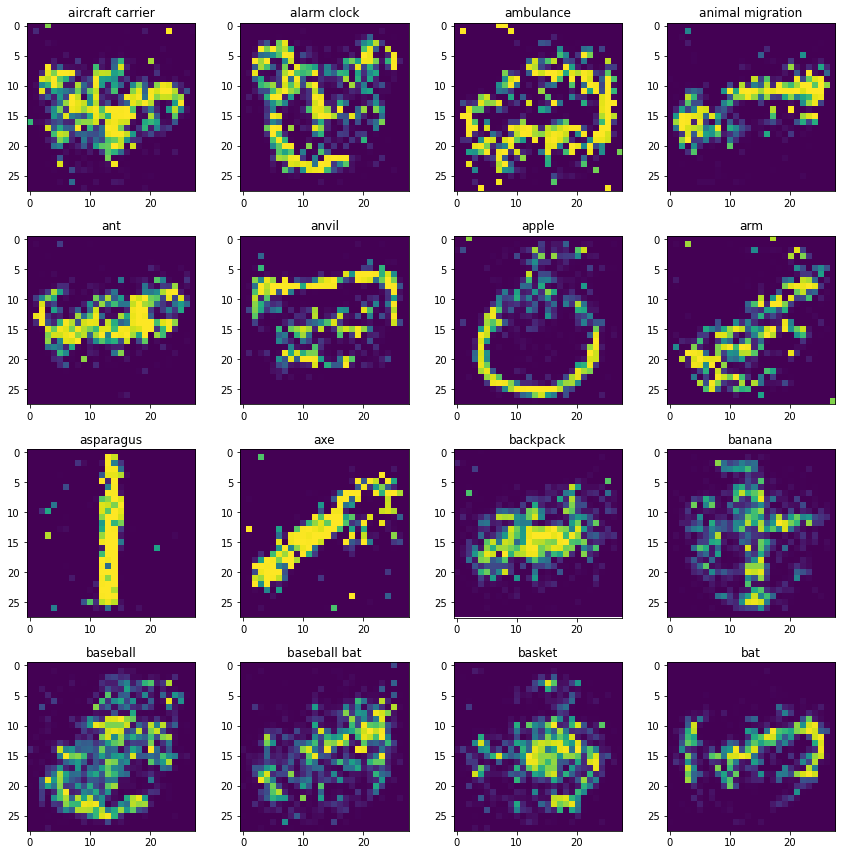

In [134]:
_generator = new_gan.generator

# generate an image for each of the trained categories:
noise = np.random.normal(0, 1, (16, 100))
y_label = np.arange(0,16)
imgs = _generator.predict([noise, y_label])    
grid_images(imgs)
plt.show()